Here we vary the amount of signaling that covert minority members perform, where signaling increases how much minority members and allies attach to them, but decreases how much majority members attach to them.

In [26]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import time

import os

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
os.chdir(os.path.dirname(os.path.abspath('')))

In [22]:
from paper.DPAH import DPAH
from DPAH2 import DPAH2
from DPAH3 import DPAH3

In [4]:
def compute_inequity(g, k):
    """Compute the proportion of allies and minorities in the top k ranks of g"""
    node_pageranks = nx.pagerank(g)
    node_pageranks_sorted = sorted(node_pageranks.items(), key=lambda x: x[1], reverse=True)
    top_k = node_pageranks_sorted[:k]
    
    num_top_k_allies = 0
    num_top_k_minority = 0
    
    for (node_id, _) in top_k:
        if g.nodes[node_id]['m'] == 1: # is an ally:
            num_top_k_allies += 1
        elif g.nodes[node_id]['m'] == 2: # is minority
            num_top_k_minority += 1
    
    return num_top_k_allies / k, num_top_k_minority / k

In [5]:
# Number of nodes
N = 1000

# Top beta% of rankings to consider for inequity
beta = 0.05

# Top k nodes to consider for inequity. k = N * beta
k = int(N * beta)

# Fraction minority
fm = 0.2

# Fraction allies
fa = 0

# homophily within majority group
h_MM = 0.8

# homophily within minority group
h_mm = 0.8

print(k)

50


With strong homophily (h_MM=h_mm=0.8), in all five runs minorities are underrepresented in the top 5% (50) of ranks. In particular, with equity, we'd expect an average representation of 20% in the top ranks.

Parameter sweep over the proportion of minorities who are "covert".

In [13]:
results_covert = []
beta_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4,
            0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 
            0.85, 0.9, 0.95, 1]

for h_cm in np.linspace(0, 1, 10)[7:10]:
    for fraction_covert in np.linspace(0, fm, 10):
        for i in range(50):
            g = DPAH3(
                N=N,
                fm=fm - fraction_covert,
                fa=fraction_covert, # "Allies" and "covert" are functionally the same
                d=0.0015,
                plo_M=3,
                plo_m=3,
                h_MM=h_MM,
                h_mm=h_mm,
                h_cm = h_cm,
                verbose=False,
                seed=i)
            
            for beta in beta_list:
            # Top k nodes to consider for inequity. k = N * beta
                k = int(N * beta)
                prop_top_k_covert, prop_top_k_minority = compute_inequity(g, k)
                results_covert.append((h_cm, beta, fraction_covert, prop_top_k_covert, prop_top_k_minority))
                print((h_cm, beta, fraction_covert, prop_top_k_covert, prop_top_k_minority))

(0.7777777777777777, 0.05, 0.0, 0.0, 0.06)
(0.7777777777777777, 0.1, 0.0, 0.0, 0.14)
(0.7777777777777777, 0.15, 0.0, 0.0, 0.16666666666666666)
(0.7777777777777777, 0.2, 0.0, 0.0, 0.165)
(0.7777777777777777, 0.25, 0.0, 0.0, 0.172)
(0.7777777777777777, 0.3, 0.0, 0.0, 0.18333333333333332)
(0.7777777777777777, 0.35, 0.0, 0.0, 0.2)
(0.7777777777777777, 0.4, 0.0, 0.0, 0.175)
(0.7777777777777777, 0.45, 0.0, 0.0, 0.15555555555555556)
(0.7777777777777777, 0.5, 0.0, 0.0, 0.14)
(0.7777777777777777, 0.55, 0.0, 0.0, 0.12727272727272726)
(0.7777777777777777, 0.6, 0.0, 0.0, 0.11666666666666667)
(0.7777777777777777, 0.65, 0.0, 0.0, 0.1076923076923077)
(0.7777777777777777, 0.7, 0.0, 0.0, 0.1)
(0.7777777777777777, 0.75, 0.0, 0.0, 0.09333333333333334)
(0.7777777777777777, 0.8, 0.0, 0.0, 0.0875)
(0.7777777777777777, 0.85, 0.0, 0.0, 0.08235294117647059)
(0.7777777777777777, 0.9, 0.0, 0.0, 0.1111111111111111)
(0.7777777777777777, 0.95, 0.0, 0.0, 0.15789473684210525)
(0.7777777777777777, 1, 0.0, 0.0, 0.2)
(0

(0.7777777777777777, 0.7, 0.0, 0.0, 0.08714285714285715)
(0.7777777777777777, 0.75, 0.0, 0.0, 0.08133333333333333)
(0.7777777777777777, 0.8, 0.0, 0.0, 0.07625)
(0.7777777777777777, 0.85, 0.0, 0.0, 0.07176470588235294)
(0.7777777777777777, 0.9, 0.0, 0.0, 0.1111111111111111)
(0.7777777777777777, 0.95, 0.0, 0.0, 0.15789473684210525)
(0.7777777777777777, 1, 0.0, 0.0, 0.2)
(0.7777777777777777, 0.05, 0.0, 0.0, 0.08)
(0.7777777777777777, 0.1, 0.0, 0.0, 0.13)
(0.7777777777777777, 0.15, 0.0, 0.0, 0.15333333333333332)
(0.7777777777777777, 0.2, 0.0, 0.0, 0.19)
(0.7777777777777777, 0.25, 0.0, 0.0, 0.212)
(0.7777777777777777, 0.3, 0.0, 0.0, 0.22666666666666666)
(0.7777777777777777, 0.35, 0.0, 0.0, 0.22857142857142856)
(0.7777777777777777, 0.4, 0.0, 0.0, 0.205)
(0.7777777777777777, 0.45, 0.0, 0.0, 0.18222222222222223)
(0.7777777777777777, 0.5, 0.0, 0.0, 0.164)
(0.7777777777777777, 0.55, 0.0, 0.0, 0.14909090909090908)
(0.7777777777777777, 0.6, 0.0, 0.0, 0.13666666666666666)
(0.7777777777777777, 0.65,

(0.7777777777777777, 0.05, 0.0, 0.0, 0.06)
(0.7777777777777777, 0.1, 0.0, 0.0, 0.06)
(0.7777777777777777, 0.15, 0.0, 0.0, 0.1)
(0.7777777777777777, 0.2, 0.0, 0.0, 0.115)
(0.7777777777777777, 0.25, 0.0, 0.0, 0.12)
(0.7777777777777777, 0.3, 0.0, 0.0, 0.14333333333333334)
(0.7777777777777777, 0.35, 0.0, 0.0, 0.17142857142857143)
(0.7777777777777777, 0.4, 0.0, 0.0, 0.1525)
(0.7777777777777777, 0.45, 0.0, 0.0, 0.13555555555555557)
(0.7777777777777777, 0.5, 0.0, 0.0, 0.122)
(0.7777777777777777, 0.55, 0.0, 0.0, 0.11090909090909092)
(0.7777777777777777, 0.6, 0.0, 0.0, 0.10166666666666667)
(0.7777777777777777, 0.65, 0.0, 0.0, 0.09384615384615384)
(0.7777777777777777, 0.7, 0.0, 0.0, 0.08714285714285715)
(0.7777777777777777, 0.75, 0.0, 0.0, 0.08133333333333333)
(0.7777777777777777, 0.8, 0.0, 0.0, 0.07625)
(0.7777777777777777, 0.85, 0.0, 0.0, 0.07176470588235294)
(0.7777777777777777, 0.9, 0.0, 0.0, 0.1111111111111111)
(0.7777777777777777, 0.95, 0.0, 0.0, 0.15789473684210525)
(0.7777777777777777, 1

(0.7777777777777777, 0.05, 0.0, 0.0, 0.08)
(0.7777777777777777, 0.1, 0.0, 0.0, 0.06)
(0.7777777777777777, 0.15, 0.0, 0.0, 0.10666666666666667)
(0.7777777777777777, 0.2, 0.0, 0.0, 0.115)
(0.7777777777777777, 0.25, 0.0, 0.0, 0.148)
(0.7777777777777777, 0.3, 0.0, 0.0, 0.15666666666666668)
(0.7777777777777777, 0.35, 0.0, 0.0, 0.1657142857142857)
(0.7777777777777777, 0.4, 0.0, 0.0, 0.1575)
(0.7777777777777777, 0.45, 0.0, 0.0, 0.14)
(0.7777777777777777, 0.5, 0.0, 0.0, 0.126)
(0.7777777777777777, 0.55, 0.0, 0.0, 0.11454545454545455)
(0.7777777777777777, 0.6, 0.0, 0.0, 0.105)
(0.7777777777777777, 0.65, 0.0, 0.0, 0.09692307692307692)
(0.7777777777777777, 0.7, 0.0, 0.0, 0.09)
(0.7777777777777777, 0.75, 0.0, 0.0, 0.084)
(0.7777777777777777, 0.8, 0.0, 0.0, 0.07875)
(0.7777777777777777, 0.85, 0.0, 0.0, 0.07411764705882352)
(0.7777777777777777, 0.9, 0.0, 0.0, 0.1111111111111111)
(0.7777777777777777, 0.95, 0.0, 0.0, 0.15789473684210525)
(0.7777777777777777, 1, 0.0, 0.0, 0.2)
(0.7777777777777777, 0.05

(0.7777777777777777, 0.05, 0.0, 0.0, 0.12)
(0.7777777777777777, 0.1, 0.0, 0.0, 0.1)
(0.7777777777777777, 0.15, 0.0, 0.0, 0.12)
(0.7777777777777777, 0.2, 0.0, 0.0, 0.16)
(0.7777777777777777, 0.25, 0.0, 0.0, 0.152)
(0.7777777777777777, 0.3, 0.0, 0.0, 0.17)
(0.7777777777777777, 0.35, 0.0, 0.0, 0.18571428571428572)
(0.7777777777777777, 0.4, 0.0, 0.0, 0.165)
(0.7777777777777777, 0.45, 0.0, 0.0, 0.14666666666666667)
(0.7777777777777777, 0.5, 0.0, 0.0, 0.132)
(0.7777777777777777, 0.55, 0.0, 0.0, 0.12)
(0.7777777777777777, 0.6, 0.0, 0.0, 0.11)
(0.7777777777777777, 0.65, 0.0, 0.0, 0.10153846153846154)
(0.7777777777777777, 0.7, 0.0, 0.0, 0.09428571428571429)
(0.7777777777777777, 0.75, 0.0, 0.0, 0.088)
(0.7777777777777777, 0.8, 0.0, 0.0, 0.0825)
(0.7777777777777777, 0.85, 0.0, 0.0, 0.07764705882352942)
(0.7777777777777777, 0.9, 0.0, 0.0, 0.1111111111111111)
(0.7777777777777777, 0.95, 0.0, 0.0, 0.15789473684210525)
(0.7777777777777777, 1, 0.0, 0.0, 0.2)
(0.7777777777777777, 0.05, 0.0, 0.0, 0.08)
(

(0.7777777777777777, 0.05, 0.0, 0.0, 0.06)
(0.7777777777777777, 0.1, 0.0, 0.0, 0.12)
(0.7777777777777777, 0.15, 0.0, 0.0, 0.14666666666666667)
(0.7777777777777777, 0.2, 0.0, 0.0, 0.14)
(0.7777777777777777, 0.25, 0.0, 0.0, 0.14)
(0.7777777777777777, 0.3, 0.0, 0.0, 0.16666666666666666)
(0.7777777777777777, 0.35, 0.0, 0.0, 0.16857142857142857)
(0.7777777777777777, 0.4, 0.0, 0.0, 0.1525)
(0.7777777777777777, 0.45, 0.0, 0.0, 0.13555555555555557)
(0.7777777777777777, 0.5, 0.0, 0.0, 0.122)
(0.7777777777777777, 0.55, 0.0, 0.0, 0.11090909090909092)
(0.7777777777777777, 0.6, 0.0, 0.0, 0.10166666666666667)
(0.7777777777777777, 0.65, 0.0, 0.0, 0.09384615384615384)
(0.7777777777777777, 0.7, 0.0, 0.0, 0.08714285714285715)
(0.7777777777777777, 0.75, 0.0, 0.0, 0.08133333333333333)
(0.7777777777777777, 0.8, 0.0, 0.0, 0.07625)
(0.7777777777777777, 0.85, 0.0, 0.0, 0.07176470588235294)
(0.7777777777777777, 0.9, 0.0, 0.0, 0.1111111111111111)
(0.7777777777777777, 0.95, 0.0, 0.0, 0.15789473684210525)
(0.7777

(0.7777777777777777, 0.95, 0.022222222222222223, 0.023157894736842106, 0.13473684210526315)
(0.7777777777777777, 1, 0.022222222222222223, 0.022, 0.178)
(0.7777777777777777, 0.05, 0.022222222222222223, 0.04, 0.12)
(0.7777777777777777, 0.1, 0.022222222222222223, 0.02, 0.13)
(0.7777777777777777, 0.15, 0.022222222222222223, 0.03333333333333333, 0.14)
(0.7777777777777777, 0.2, 0.022222222222222223, 0.025, 0.135)
(0.7777777777777777, 0.25, 0.022222222222222223, 0.028, 0.14)
(0.7777777777777777, 0.3, 0.022222222222222223, 0.03333333333333333, 0.14)
(0.7777777777777777, 0.35, 0.022222222222222223, 0.03142857142857143, 0.1457142857142857)
(0.7777777777777777, 0.4, 0.022222222222222223, 0.0275, 0.1275)
(0.7777777777777777, 0.45, 0.022222222222222223, 0.024444444444444446, 0.11333333333333333)
(0.7777777777777777, 0.5, 0.022222222222222223, 0.022, 0.102)
(0.7777777777777777, 0.55, 0.022222222222222223, 0.02, 0.09272727272727273)
(0.7777777777777777, 0.6, 0.022222222222222223, 0.018333333333333333

(0.7777777777777777, 0.05, 0.022222222222222223, 0.0, 0.08)
(0.7777777777777777, 0.1, 0.022222222222222223, 0.0, 0.1)
(0.7777777777777777, 0.15, 0.022222222222222223, 0.013333333333333334, 0.12)
(0.7777777777777777, 0.2, 0.022222222222222223, 0.015, 0.14)
(0.7777777777777777, 0.25, 0.022222222222222223, 0.024, 0.132)
(0.7777777777777777, 0.3, 0.022222222222222223, 0.03333333333333333, 0.15)
(0.7777777777777777, 0.35, 0.022222222222222223, 0.02857142857142857, 0.14)
(0.7777777777777777, 0.4, 0.022222222222222223, 0.025, 0.1225)
(0.7777777777777777, 0.45, 0.022222222222222223, 0.022222222222222223, 0.10888888888888888)
(0.7777777777777777, 0.5, 0.022222222222222223, 0.02, 0.098)
(0.7777777777777777, 0.55, 0.022222222222222223, 0.01818181818181818, 0.0890909090909091)
(0.7777777777777777, 0.6, 0.022222222222222223, 0.016666666666666666, 0.08166666666666667)
(0.7777777777777777, 0.65, 0.022222222222222223, 0.015384615384615385, 0.07538461538461538)
(0.7777777777777777, 0.7, 0.0222222222222

(0.7777777777777777, 0.05, 0.022222222222222223, 0.02, 0.08)
(0.7777777777777777, 0.1, 0.022222222222222223, 0.02, 0.08)
(0.7777777777777777, 0.15, 0.022222222222222223, 0.02, 0.09333333333333334)
(0.7777777777777777, 0.2, 0.022222222222222223, 0.025, 0.1)
(0.7777777777777777, 0.25, 0.022222222222222223, 0.02, 0.108)
(0.7777777777777777, 0.3, 0.022222222222222223, 0.02, 0.11666666666666667)
(0.7777777777777777, 0.35, 0.022222222222222223, 0.025714285714285714, 0.12857142857142856)
(0.7777777777777777, 0.4, 0.022222222222222223, 0.0225, 0.125)
(0.7777777777777777, 0.45, 0.022222222222222223, 0.02, 0.1111111111111111)
(0.7777777777777777, 0.5, 0.022222222222222223, 0.018, 0.1)
(0.7777777777777777, 0.55, 0.022222222222222223, 0.016363636363636365, 0.09090909090909091)
(0.7777777777777777, 0.6, 0.022222222222222223, 0.015, 0.08333333333333333)
(0.7777777777777777, 0.65, 0.022222222222222223, 0.013846153846153847, 0.07692307692307693)
(0.7777777777777777, 0.7, 0.022222222222222223, 0.012857

(0.7777777777777777, 0.05, 0.022222222222222223, 0.02, 0.06)
(0.7777777777777777, 0.1, 0.022222222222222223, 0.01, 0.13)
(0.7777777777777777, 0.15, 0.022222222222222223, 0.02, 0.18)
(0.7777777777777777, 0.2, 0.022222222222222223, 0.02, 0.18)
(0.7777777777777777, 0.25, 0.022222222222222223, 0.024, 0.188)
(0.7777777777777777, 0.3, 0.022222222222222223, 0.03333333333333333, 0.18666666666666668)
(0.7777777777777777, 0.35, 0.022222222222222223, 0.03142857142857143, 0.18285714285714286)
(0.7777777777777777, 0.4, 0.022222222222222223, 0.0275, 0.165)
(0.7777777777777777, 0.45, 0.022222222222222223, 0.024444444444444446, 0.14666666666666667)
(0.7777777777777777, 0.5, 0.022222222222222223, 0.022, 0.132)
(0.7777777777777777, 0.55, 0.022222222222222223, 0.02, 0.12)
(0.7777777777777777, 0.6, 0.022222222222222223, 0.018333333333333333, 0.11)
(0.7777777777777777, 0.65, 0.022222222222222223, 0.016923076923076923, 0.10153846153846154)
(0.7777777777777777, 0.7, 0.022222222222222223, 0.015714285714285715

(0.7777777777777777, 0.8, 0.022222222222222223, 0.01375, 0.0675)
(0.7777777777777777, 0.85, 0.022222222222222223, 0.012941176470588235, 0.06352941176470588)
(0.7777777777777777, 0.9, 0.022222222222222223, 0.024444444444444446, 0.08666666666666667)
(0.7777777777777777, 0.95, 0.022222222222222223, 0.023157894736842106, 0.13473684210526315)
(0.7777777777777777, 1, 0.022222222222222223, 0.022, 0.178)
(0.7777777777777777, 0.05, 0.022222222222222223, 0.0, 0.08)
(0.7777777777777777, 0.1, 0.022222222222222223, 0.02, 0.07)
(0.7777777777777777, 0.15, 0.022222222222222223, 0.02, 0.10666666666666667)
(0.7777777777777777, 0.2, 0.022222222222222223, 0.02, 0.105)
(0.7777777777777777, 0.25, 0.022222222222222223, 0.028, 0.124)
(0.7777777777777777, 0.3, 0.022222222222222223, 0.03, 0.13333333333333333)
(0.7777777777777777, 0.35, 0.022222222222222223, 0.03142857142857143, 0.1457142857142857)
(0.7777777777777777, 0.4, 0.022222222222222223, 0.0325, 0.14)
(0.7777777777777777, 0.45, 0.022222222222222223, 0.02

(0.7777777777777777, 0.05, 0.022222222222222223, 0.04, 0.06)
(0.7777777777777777, 0.1, 0.022222222222222223, 0.04, 0.06)
(0.7777777777777777, 0.15, 0.022222222222222223, 0.03333333333333333, 0.1)
(0.7777777777777777, 0.2, 0.022222222222222223, 0.025, 0.115)
(0.7777777777777777, 0.25, 0.022222222222222223, 0.024, 0.12)
(0.7777777777777777, 0.3, 0.022222222222222223, 0.02666666666666667, 0.11666666666666667)
(0.7777777777777777, 0.35, 0.022222222222222223, 0.02857142857142857, 0.12571428571428572)
(0.7777777777777777, 0.4, 0.022222222222222223, 0.025, 0.11)
(0.7777777777777777, 0.45, 0.022222222222222223, 0.022222222222222223, 0.09777777777777778)
(0.7777777777777777, 0.5, 0.022222222222222223, 0.02, 0.088)
(0.7777777777777777, 0.55, 0.022222222222222223, 0.01818181818181818, 0.08)
(0.7777777777777777, 0.6, 0.022222222222222223, 0.016666666666666666, 0.07333333333333333)
(0.7777777777777777, 0.65, 0.022222222222222223, 0.015384615384615385, 0.06769230769230769)
(0.7777777777777777, 0.7, 

(0.7777777777777777, 0.05, 0.022222222222222223, 0.02, 0.08)
(0.7777777777777777, 0.1, 0.022222222222222223, 0.02, 0.13)
(0.7777777777777777, 0.15, 0.022222222222222223, 0.03333333333333333, 0.12)
(0.7777777777777777, 0.2, 0.022222222222222223, 0.03, 0.13)
(0.7777777777777777, 0.25, 0.022222222222222223, 0.032, 0.156)
(0.7777777777777777, 0.3, 0.022222222222222223, 0.02666666666666667, 0.15)
(0.7777777777777777, 0.35, 0.022222222222222223, 0.022857142857142857, 0.14857142857142858)
(0.7777777777777777, 0.4, 0.022222222222222223, 0.02, 0.13)
(0.7777777777777777, 0.45, 0.022222222222222223, 0.017777777777777778, 0.11555555555555555)
(0.7777777777777777, 0.5, 0.022222222222222223, 0.016, 0.104)
(0.7777777777777777, 0.55, 0.022222222222222223, 0.014545454545454545, 0.09454545454545454)
(0.7777777777777777, 0.6, 0.022222222222222223, 0.013333333333333334, 0.08666666666666667)
(0.7777777777777777, 0.65, 0.022222222222222223, 0.012307692307692308, 0.08)
(0.7777777777777777, 0.7, 0.02222222222

(0.7777777777777777, 1, 0.022222222222222223, 0.022, 0.178)
(0.7777777777777777, 0.05, 0.022222222222222223, 0.0, 0.08)
(0.7777777777777777, 0.1, 0.022222222222222223, 0.01, 0.09)
(0.7777777777777777, 0.15, 0.022222222222222223, 0.006666666666666667, 0.1)
(0.7777777777777777, 0.2, 0.022222222222222223, 0.015, 0.12)
(0.7777777777777777, 0.25, 0.022222222222222223, 0.012, 0.128)
(0.7777777777777777, 0.3, 0.022222222222222223, 0.013333333333333334, 0.15)
(0.7777777777777777, 0.35, 0.022222222222222223, 0.02, 0.15428571428571428)
(0.7777777777777777, 0.4, 0.022222222222222223, 0.0175, 0.14)
(0.7777777777777777, 0.45, 0.022222222222222223, 0.015555555555555555, 0.12444444444444444)
(0.7777777777777777, 0.5, 0.022222222222222223, 0.014, 0.112)
(0.7777777777777777, 0.55, 0.022222222222222223, 0.012727272727272728, 0.10181818181818182)
(0.7777777777777777, 0.6, 0.022222222222222223, 0.011666666666666667, 0.09333333333333334)
(0.7777777777777777, 0.65, 0.022222222222222223, 0.010769230769230769

(0.7777777777777777, 0.9, 0.022222222222222223, 0.024444444444444446, 0.08666666666666667)
(0.7777777777777777, 0.95, 0.022222222222222223, 0.023157894736842106, 0.13473684210526315)
(0.7777777777777777, 1, 0.022222222222222223, 0.022, 0.178)
(0.7777777777777777, 0.05, 0.044444444444444446, 0.08, 0.12)
(0.7777777777777777, 0.1, 0.044444444444444446, 0.06, 0.12)
(0.7777777777777777, 0.15, 0.044444444444444446, 0.05333333333333334, 0.09333333333333334)
(0.7777777777777777, 0.2, 0.044444444444444446, 0.04, 0.12)
(0.7777777777777777, 0.25, 0.044444444444444446, 0.04, 0.12)
(0.7777777777777777, 0.3, 0.044444444444444446, 0.04666666666666667, 0.12333333333333334)
(0.7777777777777777, 0.35, 0.044444444444444446, 0.045714285714285714, 0.13428571428571429)
(0.7777777777777777, 0.4, 0.044444444444444446, 0.04, 0.1325)
(0.7777777777777777, 0.45, 0.044444444444444446, 0.035555555555555556, 0.11777777777777777)
(0.7777777777777777, 0.5, 0.044444444444444446, 0.032, 0.106)
(0.7777777777777777, 0.55,

(0.7777777777777777, 0.05, 0.044444444444444446, 0.08, 0.14)
(0.7777777777777777, 0.1, 0.044444444444444446, 0.06, 0.13)
(0.7777777777777777, 0.15, 0.044444444444444446, 0.07333333333333333, 0.13333333333333333)
(0.7777777777777777, 0.2, 0.044444444444444446, 0.075, 0.125)
(0.7777777777777777, 0.25, 0.044444444444444446, 0.068, 0.136)
(0.7777777777777777, 0.3, 0.044444444444444446, 0.07, 0.14333333333333334)
(0.7777777777777777, 0.35, 0.044444444444444446, 0.06857142857142857, 0.14)
(0.7777777777777777, 0.4, 0.044444444444444446, 0.0625, 0.1275)
(0.7777777777777777, 0.45, 0.044444444444444446, 0.05555555555555555, 0.11333333333333333)
(0.7777777777777777, 0.5, 0.044444444444444446, 0.05, 0.102)
(0.7777777777777777, 0.55, 0.044444444444444446, 0.045454545454545456, 0.09272727272727273)
(0.7777777777777777, 0.6, 0.044444444444444446, 0.041666666666666664, 0.085)
(0.7777777777777777, 0.65, 0.044444444444444446, 0.038461538461538464, 0.07846153846153846)
(0.7777777777777777, 0.7, 0.0444444

(0.7777777777777777, 0.05, 0.044444444444444446, 0.04, 0.1)
(0.7777777777777777, 0.1, 0.044444444444444446, 0.04, 0.07)
(0.7777777777777777, 0.15, 0.044444444444444446, 0.02666666666666667, 0.11333333333333333)
(0.7777777777777777, 0.2, 0.044444444444444446, 0.04, 0.11)
(0.7777777777777777, 0.25, 0.044444444444444446, 0.04, 0.116)
(0.7777777777777777, 0.3, 0.044444444444444446, 0.04, 0.13)
(0.7777777777777777, 0.35, 0.044444444444444446, 0.037142857142857144, 0.14285714285714285)
(0.7777777777777777, 0.4, 0.044444444444444446, 0.0325, 0.125)
(0.7777777777777777, 0.45, 0.044444444444444446, 0.028888888888888888, 0.1111111111111111)
(0.7777777777777777, 0.5, 0.044444444444444446, 0.026, 0.1)
(0.7777777777777777, 0.55, 0.044444444444444446, 0.023636363636363636, 0.09090909090909091)
(0.7777777777777777, 0.6, 0.044444444444444446, 0.021666666666666667, 0.08333333333333333)
(0.7777777777777777, 0.65, 0.044444444444444446, 0.02, 0.07692307692307693)
(0.7777777777777777, 0.7, 0.04444444444444

(0.7777777777777777, 0.05, 0.044444444444444446, 0.02, 0.12)
(0.7777777777777777, 0.1, 0.044444444444444446, 0.01, 0.09)
(0.7777777777777777, 0.15, 0.044444444444444446, 0.02666666666666667, 0.09333333333333334)
(0.7777777777777777, 0.2, 0.044444444444444446, 0.045, 0.115)
(0.7777777777777777, 0.25, 0.044444444444444446, 0.048, 0.124)
(0.7777777777777777, 0.3, 0.044444444444444446, 0.05, 0.12666666666666668)
(0.7777777777777777, 0.35, 0.044444444444444446, 0.04285714285714286, 0.1457142857142857)
(0.7777777777777777, 0.4, 0.044444444444444446, 0.04, 0.135)
(0.7777777777777777, 0.45, 0.044444444444444446, 0.035555555555555556, 0.12)
(0.7777777777777777, 0.5, 0.044444444444444446, 0.032, 0.108)
(0.7777777777777777, 0.55, 0.044444444444444446, 0.02909090909090909, 0.09818181818181818)
(0.7777777777777777, 0.6, 0.044444444444444446, 0.02666666666666667, 0.09)
(0.7777777777777777, 0.65, 0.044444444444444446, 0.024615384615384615, 0.08307692307692308)
(0.7777777777777777, 0.7, 0.044444444444

(0.7777777777777777, 0.05, 0.044444444444444446, 0.04, 0.14)
(0.7777777777777777, 0.1, 0.044444444444444446, 0.03, 0.16)
(0.7777777777777777, 0.15, 0.044444444444444446, 0.03333333333333333, 0.14666666666666667)
(0.7777777777777777, 0.2, 0.044444444444444446, 0.045, 0.135)
(0.7777777777777777, 0.25, 0.044444444444444446, 0.052, 0.124)
(0.7777777777777777, 0.3, 0.044444444444444446, 0.04666666666666667, 0.11666666666666667)
(0.7777777777777777, 0.35, 0.044444444444444446, 0.05142857142857143, 0.11714285714285715)
(0.7777777777777777, 0.4, 0.044444444444444446, 0.0475, 0.115)
(0.7777777777777777, 0.45, 0.044444444444444446, 0.042222222222222223, 0.10222222222222223)
(0.7777777777777777, 0.5, 0.044444444444444446, 0.038, 0.092)
(0.7777777777777777, 0.55, 0.044444444444444446, 0.034545454545454546, 0.08363636363636363)
(0.7777777777777777, 0.6, 0.044444444444444446, 0.03166666666666667, 0.07666666666666666)
(0.7777777777777777, 0.65, 0.044444444444444446, 0.02923076923076923, 0.07076923076

(0.7777777777777777, 0.05, 0.044444444444444446, 0.02, 0.08)
(0.7777777777777777, 0.1, 0.044444444444444446, 0.06, 0.11)
(0.7777777777777777, 0.15, 0.044444444444444446, 0.05333333333333334, 0.12666666666666668)
(0.7777777777777777, 0.2, 0.044444444444444446, 0.04, 0.115)
(0.7777777777777777, 0.25, 0.044444444444444446, 0.044, 0.12)
(0.7777777777777777, 0.3, 0.044444444444444446, 0.05333333333333334, 0.13666666666666666)
(0.7777777777777777, 0.35, 0.044444444444444446, 0.05142857142857143, 0.13428571428571429)
(0.7777777777777777, 0.4, 0.044444444444444446, 0.0475, 0.125)
(0.7777777777777777, 0.45, 0.044444444444444446, 0.042222222222222223, 0.1111111111111111)
(0.7777777777777777, 0.5, 0.044444444444444446, 0.038, 0.1)
(0.7777777777777777, 0.55, 0.044444444444444446, 0.034545454545454546, 0.09090909090909091)
(0.7777777777777777, 0.6, 0.044444444444444446, 0.03166666666666667, 0.08333333333333333)
(0.7777777777777777, 0.65, 0.044444444444444446, 0.02923076923076923, 0.0769230769230769

(0.7777777777777777, 0.65, 0.044444444444444446, 0.024615384615384615, 0.07384615384615385)
(0.7777777777777777, 0.7, 0.044444444444444446, 0.022857142857142857, 0.06857142857142857)
(0.7777777777777777, 0.75, 0.044444444444444446, 0.021333333333333333, 0.064)
(0.7777777777777777, 0.8, 0.044444444444444446, 0.02, 0.06)
(0.7777777777777777, 0.85, 0.044444444444444446, 0.018823529411764704, 0.05647058823529412)
(0.7777777777777777, 0.9, 0.044444444444444446, 0.04888888888888889, 0.06222222222222222)
(0.7777777777777777, 0.95, 0.044444444444444446, 0.04631578947368421, 0.11157894736842106)
(0.7777777777777777, 1, 0.044444444444444446, 0.044, 0.156)
(0.7777777777777777, 0.05, 0.044444444444444446, 0.06, 0.08)
(0.7777777777777777, 0.1, 0.044444444444444446, 0.04, 0.15)
(0.7777777777777777, 0.15, 0.044444444444444446, 0.04, 0.16)
(0.7777777777777777, 0.2, 0.044444444444444446, 0.045, 0.155)
(0.7777777777777777, 0.25, 0.044444444444444446, 0.048, 0.152)
(0.7777777777777777, 0.3, 0.04444444444

(0.7777777777777777, 0.05, 0.044444444444444446, 0.04, 0.08)
(0.7777777777777777, 0.1, 0.044444444444444446, 0.06, 0.1)
(0.7777777777777777, 0.15, 0.044444444444444446, 0.06666666666666667, 0.10666666666666667)
(0.7777777777777777, 0.2, 0.044444444444444446, 0.065, 0.13)
(0.7777777777777777, 0.25, 0.044444444444444446, 0.068, 0.112)
(0.7777777777777777, 0.3, 0.044444444444444446, 0.06333333333333334, 0.14)
(0.7777777777777777, 0.35, 0.044444444444444446, 0.06285714285714286, 0.14857142857142858)
(0.7777777777777777, 0.4, 0.044444444444444446, 0.0575, 0.1375)
(0.7777777777777777, 0.45, 0.044444444444444446, 0.051111111111111114, 0.12222222222222222)
(0.7777777777777777, 0.5, 0.044444444444444446, 0.046, 0.11)
(0.7777777777777777, 0.55, 0.044444444444444446, 0.04181818181818182, 0.1)
(0.7777777777777777, 0.6, 0.044444444444444446, 0.03833333333333333, 0.09166666666666666)
(0.7777777777777777, 0.65, 0.044444444444444446, 0.03538461538461538, 0.08461538461538462)
(0.7777777777777777, 0.7, 

(0.7777777777777777, 0.9, 0.044444444444444446, 0.04555555555555556, 0.06555555555555556)
(0.7777777777777777, 0.95, 0.044444444444444446, 0.04631578947368421, 0.11157894736842106)
(0.7777777777777777, 1, 0.044444444444444446, 0.044, 0.156)
(0.7777777777777777, 0.05, 0.044444444444444446, 0.08, 0.12)
(0.7777777777777777, 0.1, 0.044444444444444446, 0.07, 0.1)
(0.7777777777777777, 0.15, 0.044444444444444446, 0.05333333333333334, 0.14)
(0.7777777777777777, 0.2, 0.044444444444444446, 0.055, 0.14)
(0.7777777777777777, 0.25, 0.044444444444444446, 0.048, 0.136)
(0.7777777777777777, 0.3, 0.044444444444444446, 0.04666666666666667, 0.13333333333333333)
(0.7777777777777777, 0.35, 0.044444444444444446, 0.04285714285714286, 0.13714285714285715)
(0.7777777777777777, 0.4, 0.044444444444444446, 0.0375, 0.13)
(0.7777777777777777, 0.45, 0.044444444444444446, 0.03333333333333333, 0.11555555555555555)
(0.7777777777777777, 0.5, 0.044444444444444446, 0.03, 0.104)
(0.7777777777777777, 0.55, 0.044444444444444

(0.7777777777777777, 0.05, 0.06666666666666667, 0.12, 0.08)
(0.7777777777777777, 0.1, 0.06666666666666667, 0.1, 0.14)
(0.7777777777777777, 0.15, 0.06666666666666667, 0.11333333333333333, 0.14666666666666667)
(0.7777777777777777, 0.2, 0.06666666666666667, 0.115, 0.125)
(0.7777777777777777, 0.25, 0.06666666666666667, 0.1, 0.128)
(0.7777777777777777, 0.3, 0.06666666666666667, 0.10333333333333333, 0.12)
(0.7777777777777777, 0.35, 0.06666666666666667, 0.09714285714285714, 0.11714285714285715)
(0.7777777777777777, 0.4, 0.06666666666666667, 0.085, 0.105)
(0.7777777777777777, 0.45, 0.06666666666666667, 0.07555555555555556, 0.09333333333333334)
(0.7777777777777777, 0.5, 0.06666666666666667, 0.068, 0.084)
(0.7777777777777777, 0.55, 0.06666666666666667, 0.06181818181818182, 0.07636363636363637)
(0.7777777777777777, 0.6, 0.06666666666666667, 0.056666666666666664, 0.07)
(0.7777777777777777, 0.65, 0.06666666666666667, 0.052307692307692305, 0.06461538461538462)
(0.7777777777777777, 0.7, 0.06666666666

(0.7777777777777777, 0.95, 0.06666666666666667, 0.07052631578947369, 0.08736842105263158)
(0.7777777777777777, 1, 0.06666666666666667, 0.067, 0.133)
(0.7777777777777777, 0.05, 0.06666666666666667, 0.08, 0.06)
(0.7777777777777777, 0.1, 0.06666666666666667, 0.08, 0.11)
(0.7777777777777777, 0.15, 0.06666666666666667, 0.07333333333333333, 0.12)
(0.7777777777777777, 0.2, 0.06666666666666667, 0.065, 0.125)
(0.7777777777777777, 0.25, 0.06666666666666667, 0.064, 0.164)
(0.7777777777777777, 0.3, 0.06666666666666667, 0.06333333333333334, 0.15333333333333332)
(0.7777777777777777, 0.35, 0.06666666666666667, 0.07428571428571429, 0.16285714285714287)
(0.7777777777777777, 0.4, 0.06666666666666667, 0.065, 0.1425)
(0.7777777777777777, 0.45, 0.06666666666666667, 0.057777777777777775, 0.12666666666666668)
(0.7777777777777777, 0.5, 0.06666666666666667, 0.052, 0.114)
(0.7777777777777777, 0.55, 0.06666666666666667, 0.04727272727272727, 0.10363636363636364)
(0.7777777777777777, 0.6, 0.06666666666666667, 0.04

(0.7777777777777777, 0.05, 0.06666666666666667, 0.08, 0.1)
(0.7777777777777777, 0.1, 0.06666666666666667, 0.07, 0.1)
(0.7777777777777777, 0.15, 0.06666666666666667, 0.07333333333333333, 0.08)
(0.7777777777777777, 0.2, 0.06666666666666667, 0.065, 0.085)
(0.7777777777777777, 0.25, 0.06666666666666667, 0.056, 0.112)
(0.7777777777777777, 0.3, 0.06666666666666667, 0.06666666666666667, 0.10333333333333333)
(0.7777777777777777, 0.35, 0.06666666666666667, 0.05714285714285714, 0.12)
(0.7777777777777777, 0.4, 0.06666666666666667, 0.0525, 0.11)
(0.7777777777777777, 0.45, 0.06666666666666667, 0.04666666666666667, 0.09777777777777778)
(0.7777777777777777, 0.5, 0.06666666666666667, 0.042, 0.088)
(0.7777777777777777, 0.55, 0.06666666666666667, 0.038181818181818185, 0.08)
(0.7777777777777777, 0.6, 0.06666666666666667, 0.035, 0.07333333333333333)
(0.7777777777777777, 0.65, 0.06666666666666667, 0.03230769230769231, 0.06769230769230769)
(0.7777777777777777, 0.7, 0.06666666666666667, 0.03, 0.0628571428571

(0.7777777777777777, 0.8, 0.06666666666666667, 0.0375, 0.06)
(0.7777777777777777, 0.85, 0.06666666666666667, 0.03529411764705882, 0.05647058823529412)
(0.7777777777777777, 0.9, 0.06666666666666667, 0.057777777777777775, 0.05333333333333334)
(0.7777777777777777, 0.95, 0.06666666666666667, 0.07052631578947369, 0.08736842105263158)
(0.7777777777777777, 1, 0.06666666666666667, 0.067, 0.133)
(0.7777777777777777, 0.05, 0.06666666666666667, 0.06, 0.04)
(0.7777777777777777, 0.1, 0.06666666666666667, 0.09, 0.06)
(0.7777777777777777, 0.15, 0.06666666666666667, 0.07333333333333333, 0.1)
(0.7777777777777777, 0.2, 0.06666666666666667, 0.08, 0.085)
(0.7777777777777777, 0.25, 0.06666666666666667, 0.092, 0.096)
(0.7777777777777777, 0.3, 0.06666666666666667, 0.08, 0.09)
(0.7777777777777777, 0.35, 0.06666666666666667, 0.07428571428571429, 0.09428571428571429)
(0.7777777777777777, 0.4, 0.06666666666666667, 0.065, 0.0875)
(0.7777777777777777, 0.45, 0.06666666666666667, 0.057777777777777775, 0.077777777777

(0.7777777777777777, 0.8, 0.06666666666666667, 0.03375, 0.05375)
(0.7777777777777777, 0.85, 0.06666666666666667, 0.03176470588235294, 0.05058823529411765)
(0.7777777777777777, 0.9, 0.06666666666666667, 0.06333333333333334, 0.04777777777777778)
(0.7777777777777777, 0.95, 0.06666666666666667, 0.07052631578947369, 0.08736842105263158)
(0.7777777777777777, 1, 0.06666666666666667, 0.067, 0.133)
(0.7777777777777777, 0.05, 0.06666666666666667, 0.06, 0.06)
(0.7777777777777777, 0.1, 0.06666666666666667, 0.08, 0.12)
(0.7777777777777777, 0.15, 0.06666666666666667, 0.07333333333333333, 0.13333333333333333)
(0.7777777777777777, 0.2, 0.06666666666666667, 0.07, 0.125)
(0.7777777777777777, 0.25, 0.06666666666666667, 0.072, 0.12)
(0.7777777777777777, 0.3, 0.06666666666666667, 0.06666666666666667, 0.13333333333333333)
(0.7777777777777777, 0.35, 0.06666666666666667, 0.06285714285714286, 0.13142857142857142)
(0.7777777777777777, 0.4, 0.06666666666666667, 0.0575, 0.125)
(0.7777777777777777, 0.45, 0.0666666

(0.7777777777777777, 0.6, 0.06666666666666667, 0.04833333333333333, 0.075)
(0.7777777777777777, 0.65, 0.06666666666666667, 0.04461538461538461, 0.06923076923076923)
(0.7777777777777777, 0.7, 0.06666666666666667, 0.041428571428571426, 0.06428571428571428)
(0.7777777777777777, 0.75, 0.06666666666666667, 0.03866666666666667, 0.06)
(0.7777777777777777, 0.8, 0.06666666666666667, 0.03625, 0.05625)
(0.7777777777777777, 0.85, 0.06666666666666667, 0.03411764705882353, 0.052941176470588235)
(0.7777777777777777, 0.9, 0.06666666666666667, 0.06111111111111111, 0.05)
(0.7777777777777777, 0.95, 0.06666666666666667, 0.07052631578947369, 0.08736842105263158)
(0.7777777777777777, 1, 0.06666666666666667, 0.067, 0.133)
(0.7777777777777777, 0.05, 0.06666666666666667, 0.02, 0.14)
(0.7777777777777777, 0.1, 0.06666666666666667, 0.02, 0.08)
(0.7777777777777777, 0.15, 0.06666666666666667, 0.03333333333333333, 0.08)
(0.7777777777777777, 0.2, 0.06666666666666667, 0.045, 0.075)
(0.7777777777777777, 0.25, 0.0666666

(0.7777777777777777, 0.05, 0.06666666666666667, 0.02, 0.08)
(0.7777777777777777, 0.1, 0.06666666666666667, 0.03, 0.11)
(0.7777777777777777, 0.15, 0.06666666666666667, 0.05333333333333334, 0.08666666666666667)
(0.7777777777777777, 0.2, 0.06666666666666667, 0.045, 0.08)
(0.7777777777777777, 0.25, 0.06666666666666667, 0.052, 0.084)
(0.7777777777777777, 0.3, 0.06666666666666667, 0.056666666666666664, 0.12)
(0.7777777777777777, 0.35, 0.06666666666666667, 0.06, 0.11714285714285715)
(0.7777777777777777, 0.4, 0.06666666666666667, 0.0525, 0.1025)
(0.7777777777777777, 0.45, 0.06666666666666667, 0.04666666666666667, 0.09111111111111111)
(0.7777777777777777, 0.5, 0.06666666666666667, 0.042, 0.082)
(0.7777777777777777, 0.55, 0.06666666666666667, 0.038181818181818185, 0.07454545454545454)
(0.7777777777777777, 0.6, 0.06666666666666667, 0.035, 0.06833333333333333)
(0.7777777777777777, 0.65, 0.06666666666666667, 0.03230769230769231, 0.06307692307692307)
(0.7777777777777777, 0.7, 0.06666666666666667, 0.

(0.7777777777777777, 0.95, 0.06666666666666667, 0.07052631578947369, 0.08736842105263158)
(0.7777777777777777, 1, 0.06666666666666667, 0.067, 0.133)
(0.7777777777777777, 0.05, 0.06666666666666667, 0.06, 0.02)
(0.7777777777777777, 0.1, 0.06666666666666667, 0.1, 0.09)
(0.7777777777777777, 0.15, 0.06666666666666667, 0.09333333333333334, 0.08)
(0.7777777777777777, 0.2, 0.06666666666666667, 0.085, 0.095)
(0.7777777777777777, 0.25, 0.06666666666666667, 0.076, 0.092)
(0.7777777777777777, 0.3, 0.06666666666666667, 0.08, 0.08666666666666667)
(0.7777777777777777, 0.35, 0.06666666666666667, 0.07714285714285714, 0.09714285714285714)
(0.7777777777777777, 0.4, 0.06666666666666667, 0.07, 0.1025)
(0.7777777777777777, 0.45, 0.06666666666666667, 0.06222222222222222, 0.09111111111111111)
(0.7777777777777777, 0.5, 0.06666666666666667, 0.056, 0.082)
(0.7777777777777777, 0.55, 0.06666666666666667, 0.05090909090909091, 0.07454545454545454)
(0.7777777777777777, 0.6, 0.06666666666666667, 0.04666666666666667, 0

(0.7777777777777777, 0.85, 0.06666666666666667, 0.02588235294117647, 0.047058823529411764)
(0.7777777777777777, 0.9, 0.06666666666666667, 0.06666666666666667, 0.044444444444444446)
(0.7777777777777777, 0.95, 0.06666666666666667, 0.07052631578947369, 0.08736842105263158)
(0.7777777777777777, 1, 0.06666666666666667, 0.067, 0.133)
(0.7777777777777777, 0.05, 0.08888888888888889, 0.12, 0.1)
(0.7777777777777777, 0.1, 0.08888888888888889, 0.13, 0.11)
(0.7777777777777777, 0.15, 0.08888888888888889, 0.1, 0.12)
(0.7777777777777777, 0.2, 0.08888888888888889, 0.105, 0.105)
(0.7777777777777777, 0.25, 0.08888888888888889, 0.096, 0.092)
(0.7777777777777777, 0.3, 0.08888888888888889, 0.09, 0.09666666666666666)
(0.7777777777777777, 0.35, 0.08888888888888889, 0.1, 0.10285714285714286)
(0.7777777777777777, 0.4, 0.08888888888888889, 0.09, 0.0925)
(0.7777777777777777, 0.45, 0.08888888888888889, 0.08, 0.08222222222222222)
(0.7777777777777777, 0.5, 0.08888888888888889, 0.072, 0.074)
(0.7777777777777777, 0.55

(0.7777777777777777, 0.85, 0.08888888888888889, 0.03764705882352941, 0.036470588235294116)
(0.7777777777777777, 0.9, 0.08888888888888889, 0.07666666666666666, 0.034444444444444444)
(0.7777777777777777, 0.95, 0.08888888888888889, 0.09368421052631579, 0.06421052631578947)
(0.7777777777777777, 1, 0.08888888888888889, 0.089, 0.111)
(0.7777777777777777, 0.05, 0.08888888888888889, 0.12, 0.1)
(0.7777777777777777, 0.1, 0.08888888888888889, 0.09, 0.1)
(0.7777777777777777, 0.15, 0.08888888888888889, 0.09333333333333334, 0.09333333333333334)
(0.7777777777777777, 0.2, 0.08888888888888889, 0.095, 0.085)
(0.7777777777777777, 0.25, 0.08888888888888889, 0.092, 0.1)
(0.7777777777777777, 0.3, 0.08888888888888889, 0.10333333333333333, 0.09666666666666666)
(0.7777777777777777, 0.35, 0.08888888888888889, 0.11428571428571428, 0.09428571428571429)
(0.7777777777777777, 0.4, 0.08888888888888889, 0.1, 0.0875)
(0.7777777777777777, 0.45, 0.08888888888888889, 0.08888888888888889, 0.07777777777777778)
(0.7777777777

(0.7777777777777777, 0.7, 0.08888888888888889, 0.045714285714285714, 0.06428571428571428)
(0.7777777777777777, 0.75, 0.08888888888888889, 0.042666666666666665, 0.06)
(0.7777777777777777, 0.8, 0.08888888888888889, 0.04, 0.05625)
(0.7777777777777777, 0.85, 0.08888888888888889, 0.03764705882352941, 0.052941176470588235)
(0.7777777777777777, 0.9, 0.08888888888888889, 0.06111111111111111, 0.05)
(0.7777777777777777, 0.95, 0.08888888888888889, 0.09368421052631579, 0.06421052631578947)
(0.7777777777777777, 1, 0.08888888888888889, 0.089, 0.111)
(0.7777777777777777, 0.05, 0.08888888888888889, 0.04, 0.1)
(0.7777777777777777, 0.1, 0.08888888888888889, 0.05, 0.11)
(0.7777777777777777, 0.15, 0.08888888888888889, 0.06, 0.1)
(0.7777777777777777, 0.2, 0.08888888888888889, 0.065, 0.105)
(0.7777777777777777, 0.25, 0.08888888888888889, 0.076, 0.096)
(0.7777777777777777, 0.3, 0.08888888888888889, 0.07, 0.09666666666666666)
(0.7777777777777777, 0.35, 0.08888888888888889, 0.07428571428571429, 0.0914285714285

(0.7777777777777777, 1, 0.08888888888888889, 0.089, 0.111)
(0.7777777777777777, 0.05, 0.08888888888888889, 0.06, 0.06)
(0.7777777777777777, 0.1, 0.08888888888888889, 0.06, 0.05)
(0.7777777777777777, 0.15, 0.08888888888888889, 0.08, 0.06)
(0.7777777777777777, 0.2, 0.08888888888888889, 0.095, 0.07)
(0.7777777777777777, 0.25, 0.08888888888888889, 0.088, 0.08)
(0.7777777777777777, 0.3, 0.08888888888888889, 0.09, 0.08)
(0.7777777777777777, 0.35, 0.08888888888888889, 0.1, 0.08571428571428572)
(0.7777777777777777, 0.4, 0.08888888888888889, 0.0875, 0.0775)
(0.7777777777777777, 0.45, 0.08888888888888889, 0.07777777777777778, 0.06888888888888889)
(0.7777777777777777, 0.5, 0.08888888888888889, 0.07, 0.062)
(0.7777777777777777, 0.55, 0.08888888888888889, 0.06363636363636363, 0.056363636363636366)
(0.7777777777777777, 0.6, 0.08888888888888889, 0.058333333333333334, 0.051666666666666666)
(0.7777777777777777, 0.65, 0.08888888888888889, 0.05384615384615385, 0.047692307692307694)
(0.7777777777777777, 0

(0.7777777777777777, 0.7, 0.08888888888888889, 0.04, 0.041428571428571426)
(0.7777777777777777, 0.75, 0.08888888888888889, 0.037333333333333336, 0.03866666666666667)
(0.7777777777777777, 0.8, 0.08888888888888889, 0.035, 0.03625)
(0.7777777777777777, 0.85, 0.08888888888888889, 0.03294117647058824, 0.03411764705882353)
(0.7777777777777777, 0.9, 0.08888888888888889, 0.07888888888888888, 0.03222222222222222)
(0.7777777777777777, 0.95, 0.08888888888888889, 0.09368421052631579, 0.06421052631578947)
(0.7777777777777777, 1, 0.08888888888888889, 0.089, 0.111)
(0.7777777777777777, 0.05, 0.08888888888888889, 0.12, 0.12)
(0.7777777777777777, 0.1, 0.08888888888888889, 0.11, 0.13)
(0.7777777777777777, 0.15, 0.08888888888888889, 0.07333333333333333, 0.1)
(0.7777777777777777, 0.2, 0.08888888888888889, 0.075, 0.11)
(0.7777777777777777, 0.25, 0.08888888888888889, 0.076, 0.104)
(0.7777777777777777, 0.3, 0.08888888888888889, 0.07666666666666666, 0.10666666666666667)
(0.7777777777777777, 0.35, 0.0888888888

(0.7777777777777777, 0.9, 0.08888888888888889, 0.07555555555555556, 0.035555555555555556)
(0.7777777777777777, 0.95, 0.08888888888888889, 0.09368421052631579, 0.06421052631578947)
(0.7777777777777777, 1, 0.08888888888888889, 0.089, 0.111)
(0.7777777777777777, 0.05, 0.08888888888888889, 0.14, 0.04)
(0.7777777777777777, 0.1, 0.08888888888888889, 0.11, 0.09)
(0.7777777777777777, 0.15, 0.08888888888888889, 0.08, 0.1)
(0.7777777777777777, 0.2, 0.08888888888888889, 0.085, 0.095)
(0.7777777777777777, 0.25, 0.08888888888888889, 0.088, 0.1)
(0.7777777777777777, 0.3, 0.08888888888888889, 0.09333333333333334, 0.10333333333333333)
(0.7777777777777777, 0.35, 0.08888888888888889, 0.08571428571428572, 0.09428571428571429)
(0.7777777777777777, 0.4, 0.08888888888888889, 0.09, 0.085)
(0.7777777777777777, 0.45, 0.08888888888888889, 0.08, 0.07555555555555556)
(0.7777777777777777, 0.5, 0.08888888888888889, 0.072, 0.068)
(0.7777777777777777, 0.55, 0.08888888888888889, 0.06545454545454546, 0.0618181818181818

(0.7777777777777777, 0.75, 0.08888888888888889, 0.042666666666666665, 0.04533333333333334)
(0.7777777777777777, 0.8, 0.08888888888888889, 0.04, 0.0425)
(0.7777777777777777, 0.85, 0.08888888888888889, 0.03764705882352941, 0.04)
(0.7777777777777777, 0.9, 0.08888888888888889, 0.07333333333333333, 0.03777777777777778)
(0.7777777777777777, 0.95, 0.08888888888888889, 0.09368421052631579, 0.06421052631578947)
(0.7777777777777777, 1, 0.08888888888888889, 0.089, 0.111)
(0.7777777777777777, 0.05, 0.08888888888888889, 0.08, 0.08)
(0.7777777777777777, 0.1, 0.08888888888888889, 0.07, 0.11)
(0.7777777777777777, 0.15, 0.08888888888888889, 0.1, 0.11333333333333333)
(0.7777777777777777, 0.2, 0.08888888888888889, 0.095, 0.12)
(0.7777777777777777, 0.25, 0.08888888888888889, 0.104, 0.124)
(0.7777777777777777, 0.3, 0.08888888888888889, 0.10666666666666667, 0.11333333333333333)
(0.7777777777777777, 0.35, 0.08888888888888889, 0.11142857142857143, 0.11428571428571428)
(0.7777777777777777, 0.4, 0.0888888888888

(0.7777777777777777, 0.85, 0.08888888888888889, 0.042352941176470586, 0.041176470588235294)
(0.7777777777777777, 0.9, 0.08888888888888889, 0.07222222222222222, 0.03888888888888889)
(0.7777777777777777, 0.95, 0.08888888888888889, 0.09368421052631579, 0.06421052631578947)
(0.7777777777777777, 1, 0.08888888888888889, 0.089, 0.111)
(0.7777777777777777, 0.05, 0.08888888888888889, 0.04, 0.1)
(0.7777777777777777, 0.1, 0.08888888888888889, 0.05, 0.08)
(0.7777777777777777, 0.15, 0.08888888888888889, 0.06, 0.08)
(0.7777777777777777, 0.2, 0.08888888888888889, 0.08, 0.085)
(0.7777777777777777, 0.25, 0.08888888888888889, 0.088, 0.088)
(0.7777777777777777, 0.3, 0.08888888888888889, 0.08, 0.08666666666666667)
(0.7777777777777777, 0.35, 0.08888888888888889, 0.08857142857142856, 0.09142857142857143)
(0.7777777777777777, 0.4, 0.08888888888888889, 0.0775, 0.08)
(0.7777777777777777, 0.45, 0.08888888888888889, 0.06888888888888889, 0.07111111111111111)
(0.7777777777777777, 0.5, 0.08888888888888889, 0.062, 0

(0.7777777777777777, 0.9, 0.08888888888888889, 0.07444444444444444, 0.03666666666666667)
(0.7777777777777777, 0.95, 0.08888888888888889, 0.09368421052631579, 0.06421052631578947)
(0.7777777777777777, 1, 0.08888888888888889, 0.089, 0.111)
(0.7777777777777777, 0.05, 0.08888888888888889, 0.04, 0.0)
(0.7777777777777777, 0.1, 0.08888888888888889, 0.08, 0.06)
(0.7777777777777777, 0.15, 0.08888888888888889, 0.10666666666666667, 0.07333333333333333)
(0.7777777777777777, 0.2, 0.08888888888888889, 0.1, 0.08)
(0.7777777777777777, 0.25, 0.08888888888888889, 0.1, 0.092)
(0.7777777777777777, 0.3, 0.08888888888888889, 0.09, 0.09333333333333334)
(0.7777777777777777, 0.35, 0.08888888888888889, 0.09142857142857143, 0.09428571428571429)
(0.7777777777777777, 0.4, 0.08888888888888889, 0.08, 0.085)
(0.7777777777777777, 0.45, 0.08888888888888889, 0.07111111111111111, 0.07555555555555556)
(0.7777777777777777, 0.5, 0.08888888888888889, 0.064, 0.068)
(0.7777777777777777, 0.55, 0.08888888888888889, 0.05818181818

(0.7777777777777777, 1, 0.11111111111111112, 0.111, 0.089)
(0.7777777777777777, 0.05, 0.11111111111111112, 0.14, 0.1)
(0.7777777777777777, 0.1, 0.11111111111111112, 0.1, 0.09)
(0.7777777777777777, 0.15, 0.11111111111111112, 0.09333333333333334, 0.08666666666666667)
(0.7777777777777777, 0.2, 0.11111111111111112, 0.1, 0.085)
(0.7777777777777777, 0.25, 0.11111111111111112, 0.096, 0.08)
(0.7777777777777777, 0.3, 0.11111111111111112, 0.11, 0.07333333333333333)
(0.7777777777777777, 0.35, 0.11111111111111112, 0.11142857142857143, 0.07142857142857142)
(0.7777777777777777, 0.4, 0.11111111111111112, 0.1, 0.075)
(0.7777777777777777, 0.45, 0.11111111111111112, 0.08888888888888889, 0.06666666666666667)
(0.7777777777777777, 0.5, 0.11111111111111112, 0.08, 0.06)
(0.7777777777777777, 0.55, 0.11111111111111112, 0.07272727272727272, 0.05454545454545454)
(0.7777777777777777, 0.6, 0.11111111111111112, 0.06666666666666667, 0.05)
(0.7777777777777777, 0.65, 0.11111111111111112, 0.06153846153846154, 0.0461538

(0.7777777777777777, 0.7, 0.11111111111111112, 0.05857142857142857, 0.054285714285714284)
(0.7777777777777777, 0.75, 0.11111111111111112, 0.05466666666666667, 0.050666666666666665)
(0.7777777777777777, 0.8, 0.11111111111111112, 0.05125, 0.0475)
(0.7777777777777777, 0.85, 0.11111111111111112, 0.04823529411764706, 0.04470588235294118)
(0.7777777777777777, 0.9, 0.11111111111111112, 0.06888888888888889, 0.042222222222222223)
(0.7777777777777777, 0.95, 0.11111111111111112, 0.1168421052631579, 0.04105263157894737)
(0.7777777777777777, 1, 0.11111111111111112, 0.111, 0.089)
(0.7777777777777777, 0.05, 0.11111111111111112, 0.1, 0.0)
(0.7777777777777777, 0.1, 0.11111111111111112, 0.07, 0.02)
(0.7777777777777777, 0.15, 0.11111111111111112, 0.1, 0.06)
(0.7777777777777777, 0.2, 0.11111111111111112, 0.09, 0.065)
(0.7777777777777777, 0.25, 0.11111111111111112, 0.084, 0.072)
(0.7777777777777777, 0.3, 0.11111111111111112, 0.09333333333333334, 0.06666666666666667)
(0.7777777777777777, 0.35, 0.11111111111

(0.7777777777777777, 0.6, 0.11111111111111112, 0.06, 0.04833333333333333)
(0.7777777777777777, 0.65, 0.11111111111111112, 0.055384615384615386, 0.04461538461538461)
(0.7777777777777777, 0.7, 0.11111111111111112, 0.05142857142857143, 0.041428571428571426)
(0.7777777777777777, 0.75, 0.11111111111111112, 0.048, 0.03866666666666667)
(0.7777777777777777, 0.8, 0.11111111111111112, 0.045, 0.03625)
(0.7777777777777777, 0.85, 0.11111111111111112, 0.042352941176470586, 0.03411764705882353)
(0.7777777777777777, 0.9, 0.11111111111111112, 0.07888888888888888, 0.03222222222222222)
(0.7777777777777777, 0.95, 0.11111111111111112, 0.1168421052631579, 0.04105263157894737)
(0.7777777777777777, 1, 0.11111111111111112, 0.111, 0.089)
(0.7777777777777777, 0.05, 0.11111111111111112, 0.16, 0.0)
(0.7777777777777777, 0.1, 0.11111111111111112, 0.12, 0.05)
(0.7777777777777777, 0.15, 0.11111111111111112, 0.1, 0.05333333333333334)
(0.7777777777777777, 0.2, 0.11111111111111112, 0.1, 0.065)
(0.7777777777777777, 0.25, 

(0.7777777777777777, 0.7, 0.11111111111111112, 0.05857142857142857, 0.02857142857142857)
(0.7777777777777777, 0.75, 0.11111111111111112, 0.05466666666666667, 0.02666666666666667)
(0.7777777777777777, 0.8, 0.11111111111111112, 0.05125, 0.025)
(0.7777777777777777, 0.85, 0.11111111111111112, 0.04823529411764706, 0.023529411764705882)
(0.7777777777777777, 0.9, 0.11111111111111112, 0.08888888888888889, 0.022222222222222223)
(0.7777777777777777, 0.95, 0.11111111111111112, 0.1168421052631579, 0.04105263157894737)
(0.7777777777777777, 1, 0.11111111111111112, 0.111, 0.089)
(0.7777777777777777, 0.05, 0.11111111111111112, 0.12, 0.08)
(0.7777777777777777, 0.1, 0.11111111111111112, 0.1, 0.16)
(0.7777777777777777, 0.15, 0.11111111111111112, 0.12666666666666668, 0.12666666666666668)
(0.7777777777777777, 0.2, 0.11111111111111112, 0.125, 0.11)
(0.7777777777777777, 0.25, 0.11111111111111112, 0.104, 0.104)
(0.7777777777777777, 0.3, 0.11111111111111112, 0.1, 0.1)
(0.7777777777777777, 0.35, 0.1111111111111

(0.7777777777777777, 0.65, 0.11111111111111112, 0.06769230769230769, 0.06153846153846154)
(0.7777777777777777, 0.7, 0.11111111111111112, 0.06285714285714286, 0.05714285714285714)
(0.7777777777777777, 0.75, 0.11111111111111112, 0.058666666666666666, 0.05333333333333334)
(0.7777777777777777, 0.8, 0.11111111111111112, 0.055, 0.05)
(0.7777777777777777, 0.85, 0.11111111111111112, 0.05176470588235294, 0.047058823529411764)
(0.7777777777777777, 0.9, 0.11111111111111112, 0.06666666666666667, 0.044444444444444446)
(0.7777777777777777, 0.95, 0.11111111111111112, 0.11578947368421053, 0.042105263157894736)
(0.7777777777777777, 1, 0.11111111111111112, 0.111, 0.089)
(0.7777777777777777, 0.05, 0.11111111111111112, 0.08, 0.02)
(0.7777777777777777, 0.1, 0.11111111111111112, 0.13, 0.07)
(0.7777777777777777, 0.15, 0.11111111111111112, 0.14, 0.08666666666666667)
(0.7777777777777777, 0.2, 0.11111111111111112, 0.12, 0.1)
(0.7777777777777777, 0.25, 0.11111111111111112, 0.128, 0.096)
(0.7777777777777777, 0.3,

(0.7777777777777777, 0.05, 0.11111111111111112, 0.04, 0.08)
(0.7777777777777777, 0.1, 0.11111111111111112, 0.06, 0.06)
(0.7777777777777777, 0.15, 0.11111111111111112, 0.07333333333333333, 0.04)
(0.7777777777777777, 0.2, 0.11111111111111112, 0.085, 0.045)
(0.7777777777777777, 0.25, 0.11111111111111112, 0.08, 0.052)
(0.7777777777777777, 0.3, 0.11111111111111112, 0.09, 0.06666666666666667)
(0.7777777777777777, 0.35, 0.11111111111111112, 0.08571428571428572, 0.07428571428571429)
(0.7777777777777777, 0.4, 0.11111111111111112, 0.0775, 0.07)
(0.7777777777777777, 0.45, 0.11111111111111112, 0.06888888888888889, 0.06222222222222222)
(0.7777777777777777, 0.5, 0.11111111111111112, 0.062, 0.056)
(0.7777777777777777, 0.55, 0.11111111111111112, 0.056363636363636366, 0.05090909090909091)
(0.7777777777777777, 0.6, 0.11111111111111112, 0.051666666666666666, 0.04666666666666667)
(0.7777777777777777, 0.65, 0.11111111111111112, 0.047692307692307694, 0.043076923076923075)
(0.7777777777777777, 0.7, 0.1111111

(0.7777777777777777, 0.85, 0.11111111111111112, 0.04, 0.029411764705882353)
(0.7777777777777777, 0.9, 0.11111111111111112, 0.08333333333333333, 0.027777777777777776)
(0.7777777777777777, 0.95, 0.11111111111111112, 0.1168421052631579, 0.04105263157894737)
(0.7777777777777777, 1, 0.11111111111111112, 0.111, 0.089)
(0.7777777777777777, 0.05, 0.11111111111111112, 0.06, 0.08)
(0.7777777777777777, 0.1, 0.11111111111111112, 0.09, 0.12)
(0.7777777777777777, 0.15, 0.11111111111111112, 0.08, 0.12)
(0.7777777777777777, 0.2, 0.11111111111111112, 0.095, 0.095)
(0.7777777777777777, 0.25, 0.11111111111111112, 0.092, 0.084)
(0.7777777777777777, 0.3, 0.11111111111111112, 0.1, 0.09)
(0.7777777777777777, 0.35, 0.11111111111111112, 0.1, 0.09428571428571429)
(0.7777777777777777, 0.4, 0.11111111111111112, 0.105, 0.0925)
(0.7777777777777777, 0.45, 0.11111111111111112, 0.09333333333333334, 0.08222222222222222)
(0.7777777777777777, 0.5, 0.11111111111111112, 0.084, 0.074)
(0.7777777777777777, 0.55, 0.1111111111

(0.7777777777777777, 0.95, 0.11111111111111112, 0.1168421052631579, 0.04105263157894737)
(0.7777777777777777, 1, 0.11111111111111112, 0.111, 0.089)
(0.7777777777777777, 0.05, 0.11111111111111112, 0.16, 0.02)
(0.7777777777777777, 0.1, 0.11111111111111112, 0.12, 0.04)
(0.7777777777777777, 0.15, 0.11111111111111112, 0.12666666666666668, 0.05333333333333334)
(0.7777777777777777, 0.2, 0.11111111111111112, 0.11, 0.07)
(0.7777777777777777, 0.25, 0.11111111111111112, 0.108, 0.068)
(0.7777777777777777, 0.3, 0.11111111111111112, 0.10666666666666667, 0.06666666666666667)
(0.7777777777777777, 0.35, 0.11111111111111112, 0.10857142857142857, 0.07142857142857142)
(0.7777777777777777, 0.4, 0.11111111111111112, 0.1025, 0.0725)
(0.7777777777777777, 0.45, 0.11111111111111112, 0.09111111111111111, 0.06444444444444444)
(0.7777777777777777, 0.5, 0.11111111111111112, 0.082, 0.058)
(0.7777777777777777, 0.55, 0.11111111111111112, 0.07454545454545454, 0.05272727272727273)
(0.7777777777777777, 0.6, 0.11111111111

(0.7777777777777777, 0.95, 0.13333333333333333, 0.13473684210526315, 0.023157894736842106)
(0.7777777777777777, 1, 0.13333333333333333, 0.133, 0.067)
(0.7777777777777777, 0.05, 0.13333333333333333, 0.14, 0.08)
(0.7777777777777777, 0.1, 0.13333333333333333, 0.09, 0.1)
(0.7777777777777777, 0.15, 0.13333333333333333, 0.13333333333333333, 0.08)
(0.7777777777777777, 0.2, 0.13333333333333333, 0.135, 0.095)
(0.7777777777777777, 0.25, 0.13333333333333333, 0.116, 0.084)
(0.7777777777777777, 0.3, 0.13333333333333333, 0.11333333333333333, 0.07)
(0.7777777777777777, 0.35, 0.13333333333333333, 0.11714285714285715, 0.07142857142857142)
(0.7777777777777777, 0.4, 0.13333333333333333, 0.115, 0.065)
(0.7777777777777777, 0.45, 0.13333333333333333, 0.10222222222222223, 0.057777777777777775)
(0.7777777777777777, 0.5, 0.13333333333333333, 0.092, 0.052)
(0.7777777777777777, 0.55, 0.13333333333333333, 0.08363636363636363, 0.04727272727272727)
(0.7777777777777777, 0.6, 0.13333333333333333, 0.07666666666666666,

(0.7777777777777777, 0.05, 0.13333333333333333, 0.16, 0.08)
(0.7777777777777777, 0.1, 0.13333333333333333, 0.19, 0.09)
(0.7777777777777777, 0.15, 0.13333333333333333, 0.15333333333333332, 0.07333333333333333)
(0.7777777777777777, 0.2, 0.13333333333333333, 0.14, 0.085)
(0.7777777777777777, 0.25, 0.13333333333333333, 0.136, 0.08)
(0.7777777777777777, 0.3, 0.13333333333333333, 0.13333333333333333, 0.08333333333333333)
(0.7777777777777777, 0.35, 0.13333333333333333, 0.13428571428571429, 0.07714285714285714)
(0.7777777777777777, 0.4, 0.13333333333333333, 0.12, 0.0725)
(0.7777777777777777, 0.45, 0.13333333333333333, 0.10666666666666667, 0.06444444444444444)
(0.7777777777777777, 0.5, 0.13333333333333333, 0.096, 0.058)
(0.7777777777777777, 0.55, 0.13333333333333333, 0.08727272727272728, 0.05272727272727273)
(0.7777777777777777, 0.6, 0.13333333333333333, 0.08, 0.04833333333333333)
(0.7777777777777777, 0.65, 0.13333333333333333, 0.07384615384615385, 0.04461538461538461)
(0.7777777777777777, 0.7,

(0.7777777777777777, 0.05, 0.13333333333333333, 0.14, 0.12)
(0.7777777777777777, 0.1, 0.13333333333333333, 0.12, 0.06)
(0.7777777777777777, 0.15, 0.13333333333333333, 0.12, 0.06666666666666667)
(0.7777777777777777, 0.2, 0.13333333333333333, 0.13, 0.065)
(0.7777777777777777, 0.25, 0.13333333333333333, 0.136, 0.06)
(0.7777777777777777, 0.3, 0.13333333333333333, 0.13333333333333333, 0.06)
(0.7777777777777777, 0.35, 0.13333333333333333, 0.13714285714285715, 0.06285714285714286)
(0.7777777777777777, 0.4, 0.13333333333333333, 0.125, 0.06)
(0.7777777777777777, 0.45, 0.13333333333333333, 0.1111111111111111, 0.05333333333333334)
(0.7777777777777777, 0.5, 0.13333333333333333, 0.1, 0.048)
(0.7777777777777777, 0.55, 0.13333333333333333, 0.09090909090909091, 0.04363636363636364)
(0.7777777777777777, 0.6, 0.13333333333333333, 0.08333333333333333, 0.04)
(0.7777777777777777, 0.65, 0.13333333333333333, 0.07692307692307693, 0.036923076923076927)
(0.7777777777777777, 0.7, 0.13333333333333333, 0.071428571

(0.7777777777777777, 0.65, 0.13333333333333333, 0.055384615384615386, 0.02)
(0.7777777777777777, 0.7, 0.13333333333333333, 0.05142857142857143, 0.018571428571428572)
(0.7777777777777777, 0.75, 0.13333333333333333, 0.048, 0.017333333333333333)
(0.7777777777777777, 0.8, 0.13333333333333333, 0.045, 0.01625)
(0.7777777777777777, 0.85, 0.13333333333333333, 0.04352941176470588, 0.015294117647058824)
(0.7777777777777777, 0.9, 0.13333333333333333, 0.09666666666666666, 0.014444444444444444)
(0.7777777777777777, 0.95, 0.13333333333333333, 0.14, 0.017894736842105262)
(0.7777777777777777, 1, 0.13333333333333333, 0.133, 0.067)
(0.7777777777777777, 0.05, 0.13333333333333333, 0.14, 0.08)
(0.7777777777777777, 0.1, 0.13333333333333333, 0.13, 0.07)
(0.7777777777777777, 0.15, 0.13333333333333333, 0.12, 0.07333333333333333)
(0.7777777777777777, 0.2, 0.13333333333333333, 0.125, 0.08)
(0.7777777777777777, 0.25, 0.13333333333333333, 0.12, 0.084)
(0.7777777777777777, 0.3, 0.13333333333333333, 0.12, 0.08333333

(0.7777777777777777, 0.95, 0.13333333333333333, 0.1336842105263158, 0.024210526315789474)
(0.7777777777777777, 1, 0.13333333333333333, 0.133, 0.067)
(0.7777777777777777, 0.05, 0.13333333333333333, 0.08, 0.06)
(0.7777777777777777, 0.1, 0.13333333333333333, 0.11, 0.05)
(0.7777777777777777, 0.15, 0.13333333333333333, 0.12666666666666668, 0.07333333333333333)
(0.7777777777777777, 0.2, 0.13333333333333333, 0.14, 0.08)
(0.7777777777777777, 0.25, 0.13333333333333333, 0.148, 0.076)
(0.7777777777777777, 0.3, 0.13333333333333333, 0.15333333333333332, 0.07333333333333333)
(0.7777777777777777, 0.35, 0.13333333333333333, 0.1657142857142857, 0.06857142857142857)
(0.7777777777777777, 0.4, 0.13333333333333333, 0.145, 0.06)
(0.7777777777777777, 0.45, 0.13333333333333333, 0.1288888888888889, 0.05333333333333334)
(0.7777777777777777, 0.5, 0.13333333333333333, 0.116, 0.048)
(0.7777777777777777, 0.55, 0.13333333333333333, 0.10545454545454545, 0.04363636363636364)
(0.7777777777777777, 0.6, 0.133333333333333

(0.7777777777777777, 0.8, 0.13333333333333333, 0.06875, 0.03)
(0.7777777777777777, 0.85, 0.13333333333333333, 0.06470588235294118, 0.02823529411764706)
(0.7777777777777777, 0.9, 0.13333333333333333, 0.08444444444444445, 0.02666666666666667)
(0.7777777777777777, 0.95, 0.13333333333333333, 0.13263157894736843, 0.02526315789473684)
(0.7777777777777777, 1, 0.13333333333333333, 0.133, 0.067)
(0.7777777777777777, 0.05, 0.13333333333333333, 0.24, 0.12)
(0.7777777777777777, 0.1, 0.13333333333333333, 0.17, 0.09)
(0.7777777777777777, 0.15, 0.13333333333333333, 0.13333333333333333, 0.08)
(0.7777777777777777, 0.2, 0.13333333333333333, 0.14, 0.085)
(0.7777777777777777, 0.25, 0.13333333333333333, 0.16, 0.076)
(0.7777777777777777, 0.3, 0.13333333333333333, 0.16333333333333333, 0.07)
(0.7777777777777777, 0.35, 0.13333333333333333, 0.16285714285714287, 0.07142857142857142)
(0.7777777777777777, 0.4, 0.13333333333333333, 0.1475, 0.0725)
(0.7777777777777777, 0.45, 0.13333333333333333, 0.13111111111111112,

(0.7777777777777777, 0.85, 0.13333333333333333, 0.05411764705882353, 0.03058823529411765)
(0.7777777777777777, 0.9, 0.13333333333333333, 0.08222222222222222, 0.028888888888888888)
(0.7777777777777777, 0.95, 0.13333333333333333, 0.13052631578947368, 0.02736842105263158)
(0.7777777777777777, 1, 0.13333333333333333, 0.133, 0.067)
(0.7777777777777777, 0.05, 0.13333333333333333, 0.06, 0.02)
(0.7777777777777777, 0.1, 0.13333333333333333, 0.12, 0.04)
(0.7777777777777777, 0.15, 0.13333333333333333, 0.13333333333333333, 0.05333333333333334)
(0.7777777777777777, 0.2, 0.13333333333333333, 0.125, 0.065)
(0.7777777777777777, 0.25, 0.13333333333333333, 0.116, 0.064)
(0.7777777777777777, 0.3, 0.13333333333333333, 0.12, 0.06333333333333334)
(0.7777777777777777, 0.35, 0.13333333333333333, 0.10857142857142857, 0.07428571428571429)
(0.7777777777777777, 0.4, 0.13333333333333333, 0.095, 0.065)
(0.7777777777777777, 0.45, 0.13333333333333333, 0.08444444444444445, 0.057777777777777775)
(0.7777777777777777, 0.

(0.7777777777777777, 0.95, 0.13333333333333333, 0.13263157894736843, 0.02526315789473684)
(0.7777777777777777, 1, 0.13333333333333333, 0.133, 0.067)
(0.7777777777777777, 0.05, 0.13333333333333333, 0.24, 0.02)
(0.7777777777777777, 0.1, 0.13333333333333333, 0.18, 0.03)
(0.7777777777777777, 0.15, 0.13333333333333333, 0.17333333333333334, 0.05333333333333334)
(0.7777777777777777, 0.2, 0.13333333333333333, 0.165, 0.065)
(0.7777777777777777, 0.25, 0.13333333333333333, 0.16, 0.076)
(0.7777777777777777, 0.3, 0.13333333333333333, 0.14333333333333334, 0.07333333333333333)
(0.7777777777777777, 0.35, 0.13333333333333333, 0.1457142857142857, 0.06285714285714286)
(0.7777777777777777, 0.4, 0.13333333333333333, 0.135, 0.06)
(0.7777777777777777, 0.45, 0.13333333333333333, 0.12, 0.05333333333333334)
(0.7777777777777777, 0.5, 0.13333333333333333, 0.108, 0.048)
(0.7777777777777777, 0.55, 0.13333333333333333, 0.09818181818181818, 0.04363636363636364)
(0.7777777777777777, 0.6, 0.13333333333333333, 0.09, 0.0

(0.7777777777777777, 1, 0.13333333333333333, 0.133, 0.067)
(0.7777777777777777, 0.05, 0.13333333333333333, 0.14, 0.06)
(0.7777777777777777, 0.1, 0.13333333333333333, 0.09, 0.07)
(0.7777777777777777, 0.15, 0.13333333333333333, 0.12666666666666668, 0.1)
(0.7777777777777777, 0.2, 0.13333333333333333, 0.13, 0.085)
(0.7777777777777777, 0.25, 0.13333333333333333, 0.14, 0.076)
(0.7777777777777777, 0.3, 0.13333333333333333, 0.13666666666666666, 0.07666666666666666)
(0.7777777777777777, 0.35, 0.13333333333333333, 0.13428571428571429, 0.07714285714285714)
(0.7777777777777777, 0.4, 0.13333333333333333, 0.1275, 0.0725)
(0.7777777777777777, 0.45, 0.13333333333333333, 0.11333333333333333, 0.06444444444444444)
(0.7777777777777777, 0.5, 0.13333333333333333, 0.102, 0.058)
(0.7777777777777777, 0.55, 0.13333333333333333, 0.09272727272727273, 0.05272727272727273)
(0.7777777777777777, 0.6, 0.13333333333333333, 0.085, 0.04833333333333333)
(0.7777777777777777, 0.65, 0.13333333333333333, 0.07846153846153846, 

(0.7777777777777777, 0.8, 0.15555555555555556, 0.06125, 0.01875)
(0.7777777777777777, 0.85, 0.15555555555555556, 0.05764705882352941, 0.01764705882352941)
(0.7777777777777777, 0.9, 0.15555555555555556, 0.09444444444444444, 0.016666666666666666)
(0.7777777777777777, 0.95, 0.15555555555555556, 0.14210526315789473, 0.015789473684210527)
(0.7777777777777777, 1, 0.15555555555555556, 0.156, 0.044)
(0.7777777777777777, 0.05, 0.15555555555555556, 0.16, 0.04)
(0.7777777777777777, 0.1, 0.15555555555555556, 0.16, 0.02)
(0.7777777777777777, 0.15, 0.15555555555555556, 0.17333333333333334, 0.03333333333333333)
(0.7777777777777777, 0.2, 0.15555555555555556, 0.155, 0.03)
(0.7777777777777777, 0.25, 0.15555555555555556, 0.176, 0.032)
(0.7777777777777777, 0.3, 0.15555555555555556, 0.16, 0.03)
(0.7777777777777777, 0.35, 0.15555555555555556, 0.1457142857142857, 0.04)
(0.7777777777777777, 0.4, 0.15555555555555556, 0.14, 0.0375)
(0.7777777777777777, 0.45, 0.15555555555555556, 0.12444444444444444, 0.033333333

(0.7777777777777777, 0.85, 0.15555555555555556, 0.0611764705882353, 0.01647058823529412)
(0.7777777777777777, 0.9, 0.15555555555555556, 0.09555555555555556, 0.015555555555555555)
(0.7777777777777777, 0.95, 0.15555555555555556, 0.1431578947368421, 0.014736842105263158)
(0.7777777777777777, 1, 0.15555555555555556, 0.156, 0.044)
(0.7777777777777777, 0.05, 0.15555555555555556, 0.2, 0.02)
(0.7777777777777777, 0.1, 0.15555555555555556, 0.17, 0.03)
(0.7777777777777777, 0.15, 0.15555555555555556, 0.18666666666666668, 0.04666666666666667)
(0.7777777777777777, 0.2, 0.15555555555555556, 0.185, 0.04)
(0.7777777777777777, 0.25, 0.15555555555555556, 0.184, 0.036)
(0.7777777777777777, 0.3, 0.15555555555555556, 0.17666666666666667, 0.043333333333333335)
(0.7777777777777777, 0.35, 0.15555555555555556, 0.17142857142857143, 0.04857142857142857)
(0.7777777777777777, 0.4, 0.15555555555555556, 0.155, 0.0425)
(0.7777777777777777, 0.45, 0.15555555555555556, 0.13777777777777778, 0.03777777777777778)
(0.7777777

(0.7777777777777777, 0.9, 0.15555555555555556, 0.08555555555555555, 0.025555555555555557)
(0.7777777777777777, 0.95, 0.15555555555555556, 0.1336842105263158, 0.024210526315789474)
(0.7777777777777777, 1, 0.15555555555555556, 0.156, 0.044)
(0.7777777777777777, 0.05, 0.15555555555555556, 0.2, 0.0)
(0.7777777777777777, 0.1, 0.15555555555555556, 0.13, 0.01)
(0.7777777777777777, 0.15, 0.15555555555555556, 0.14666666666666667, 0.013333333333333334)
(0.7777777777777777, 0.2, 0.15555555555555556, 0.145, 0.015)
(0.7777777777777777, 0.25, 0.15555555555555556, 0.148, 0.016)
(0.7777777777777777, 0.3, 0.15555555555555556, 0.13666666666666666, 0.023333333333333334)
(0.7777777777777777, 0.35, 0.15555555555555556, 0.1457142857142857, 0.022857142857142857)
(0.7777777777777777, 0.4, 0.15555555555555556, 0.1275, 0.0275)
(0.7777777777777777, 0.45, 0.15555555555555556, 0.11333333333333333, 0.024444444444444446)
(0.7777777777777777, 0.5, 0.15555555555555556, 0.102, 0.022)
(0.7777777777777777, 0.55, 0.155555

(0.7777777777777777, 0.75, 0.15555555555555556, 0.08, 0.024)
(0.7777777777777777, 0.8, 0.15555555555555556, 0.075, 0.0225)
(0.7777777777777777, 0.85, 0.15555555555555556, 0.07058823529411765, 0.021176470588235293)
(0.7777777777777777, 0.9, 0.15555555555555556, 0.09111111111111111, 0.02)
(0.7777777777777777, 0.95, 0.15555555555555556, 0.13894736842105262, 0.018947368421052633)
(0.7777777777777777, 1, 0.15555555555555556, 0.156, 0.044)
(0.7777777777777777, 0.05, 0.15555555555555556, 0.12, 0.0)
(0.7777777777777777, 0.1, 0.15555555555555556, 0.11, 0.01)
(0.7777777777777777, 0.15, 0.15555555555555556, 0.14, 0.02666666666666667)
(0.7777777777777777, 0.2, 0.15555555555555556, 0.145, 0.02)
(0.7777777777777777, 0.25, 0.15555555555555556, 0.144, 0.032)
(0.7777777777777777, 0.3, 0.15555555555555556, 0.16333333333333333, 0.02666666666666667)
(0.7777777777777777, 0.35, 0.15555555555555556, 0.1657142857142857, 0.025714285714285714)
(0.7777777777777777, 0.4, 0.15555555555555556, 0.145, 0.0225)
(0.777

(0.7777777777777777, 0.7, 0.15555555555555556, 0.07285714285714286, 0.02142857142857143)
(0.7777777777777777, 0.75, 0.15555555555555556, 0.068, 0.02)
(0.7777777777777777, 0.8, 0.15555555555555556, 0.06375, 0.01875)
(0.7777777777777777, 0.85, 0.15555555555555556, 0.06, 0.01764705882352941)
(0.7777777777777777, 0.9, 0.15555555555555556, 0.09444444444444444, 0.016666666666666666)
(0.7777777777777777, 0.95, 0.15555555555555556, 0.14210526315789473, 0.015789473684210527)
(0.7777777777777777, 1, 0.15555555555555556, 0.156, 0.044)
(0.7777777777777777, 0.05, 0.15555555555555556, 0.2, 0.02)
(0.7777777777777777, 0.1, 0.15555555555555556, 0.19, 0.01)
(0.7777777777777777, 0.15, 0.15555555555555556, 0.17333333333333334, 0.02666666666666667)
(0.7777777777777777, 0.2, 0.15555555555555556, 0.155, 0.03)
(0.7777777777777777, 0.25, 0.15555555555555556, 0.148, 0.032)
(0.7777777777777777, 0.3, 0.15555555555555556, 0.15666666666666668, 0.03333333333333333)
(0.7777777777777777, 0.35, 0.15555555555555556, 0.1

(0.7777777777777777, 0.75, 0.15555555555555556, 0.07466666666666667, 0.02)
(0.7777777777777777, 0.8, 0.15555555555555556, 0.07, 0.01875)
(0.7777777777777777, 0.85, 0.15555555555555556, 0.06588235294117648, 0.01764705882352941)
(0.7777777777777777, 0.9, 0.15555555555555556, 0.09444444444444444, 0.016666666666666666)
(0.7777777777777777, 0.95, 0.15555555555555556, 0.14210526315789473, 0.015789473684210527)
(0.7777777777777777, 1, 0.15555555555555556, 0.156, 0.044)
(0.7777777777777777, 0.05, 0.15555555555555556, 0.06, 0.06)
(0.7777777777777777, 0.1, 0.15555555555555556, 0.11, 0.05)
(0.7777777777777777, 0.15, 0.15555555555555556, 0.13333333333333333, 0.04666666666666667)
(0.7777777777777777, 0.2, 0.15555555555555556, 0.135, 0.05)
(0.7777777777777777, 0.25, 0.15555555555555556, 0.148, 0.048)
(0.7777777777777777, 0.3, 0.15555555555555556, 0.14666666666666667, 0.04)
(0.7777777777777777, 0.35, 0.15555555555555556, 0.15142857142857144, 0.037142857142857144)
(0.7777777777777777, 0.4, 0.155555555

(0.7777777777777777, 0.95, 0.15555555555555556, 0.1463157894736842, 0.011578947368421053)
(0.7777777777777777, 1, 0.15555555555555556, 0.156, 0.044)
(0.7777777777777777, 0.05, 0.15555555555555556, 0.18, 0.04)
(0.7777777777777777, 0.1, 0.15555555555555556, 0.15, 0.06)
(0.7777777777777777, 0.15, 0.15555555555555556, 0.16, 0.04666666666666667)
(0.7777777777777777, 0.2, 0.15555555555555556, 0.16, 0.055)
(0.7777777777777777, 0.25, 0.15555555555555556, 0.148, 0.048)
(0.7777777777777777, 0.3, 0.15555555555555556, 0.15666666666666668, 0.043333333333333335)
(0.7777777777777777, 0.35, 0.15555555555555556, 0.1657142857142857, 0.045714285714285714)
(0.7777777777777777, 0.4, 0.15555555555555556, 0.145, 0.0425)
(0.7777777777777777, 0.45, 0.15555555555555556, 0.1288888888888889, 0.03777777777777778)
(0.7777777777777777, 0.5, 0.15555555555555556, 0.116, 0.034)
(0.7777777777777777, 0.55, 0.15555555555555556, 0.10545454545454545, 0.03090909090909091)
(0.7777777777777777, 0.6, 0.15555555555555556, 0.0966

(0.7777777777777777, 0.8, 0.15555555555555556, 0.08, 0.02375)
(0.7777777777777777, 0.85, 0.15555555555555556, 0.07529411764705882, 0.02235294117647059)
(0.7777777777777777, 0.9, 0.15555555555555556, 0.09, 0.021111111111111112)
(0.7777777777777777, 0.95, 0.15555555555555556, 0.13789473684210526, 0.02)
(0.7777777777777777, 1, 0.15555555555555556, 0.156, 0.044)
(0.7777777777777777, 0.05, 0.15555555555555556, 0.28, 0.06)
(0.7777777777777777, 0.1, 0.15555555555555556, 0.24, 0.04)
(0.7777777777777777, 0.15, 0.15555555555555556, 0.20666666666666667, 0.03333333333333333)
(0.7777777777777777, 0.2, 0.15555555555555556, 0.17, 0.025)
(0.7777777777777777, 0.25, 0.15555555555555556, 0.18, 0.028)
(0.7777777777777777, 0.3, 0.15555555555555556, 0.16333333333333333, 0.02666666666666667)
(0.7777777777777777, 0.35, 0.15555555555555556, 0.15714285714285714, 0.03142857142857143)
(0.7777777777777777, 0.4, 0.15555555555555556, 0.155, 0.0325)
(0.7777777777777777, 0.45, 0.15555555555555556, 0.13777777777777778,

(0.7777777777777777, 0.9, 0.17777777777777778, 0.10555555555555556, 0.005555555555555556)
(0.7777777777777777, 0.95, 0.17777777777777778, 0.15263157894736842, 0.005263157894736842)
(0.7777777777777777, 1, 0.17777777777777778, 0.178, 0.022)
(0.7777777777777777, 0.05, 0.17777777777777778, 0.18, 0.02)
(0.7777777777777777, 0.1, 0.17777777777777778, 0.24, 0.01)
(0.7777777777777777, 0.15, 0.17777777777777778, 0.22666666666666666, 0.006666666666666667)
(0.7777777777777777, 0.2, 0.17777777777777778, 0.21, 0.015)
(0.7777777777777777, 0.25, 0.17777777777777778, 0.2, 0.016)
(0.7777777777777777, 0.3, 0.17777777777777778, 0.20333333333333334, 0.013333333333333334)
(0.7777777777777777, 0.35, 0.17777777777777778, 0.18571428571428572, 0.014285714285714285)
(0.7777777777777777, 0.4, 0.17777777777777778, 0.1725, 0.015)
(0.7777777777777777, 0.45, 0.17777777777777778, 0.15333333333333332, 0.013333333333333334)
(0.7777777777777777, 0.5, 0.17777777777777778, 0.138, 0.012)
(0.7777777777777777, 0.55, 0.177777

(0.7777777777777777, 0.95, 0.17777777777777778, 0.14736842105263157, 0.010526315789473684)
(0.7777777777777777, 1, 0.17777777777777778, 0.178, 0.022)
(0.7777777777777777, 0.05, 0.17777777777777778, 0.2, 0.0)
(0.7777777777777777, 0.1, 0.17777777777777778, 0.19, 0.01)
(0.7777777777777777, 0.15, 0.17777777777777778, 0.18666666666666668, 0.013333333333333334)
(0.7777777777777777, 0.2, 0.17777777777777778, 0.18, 0.015)
(0.7777777777777777, 0.25, 0.17777777777777778, 0.18, 0.016)
(0.7777777777777777, 0.3, 0.17777777777777778, 0.19666666666666666, 0.013333333333333334)
(0.7777777777777777, 0.35, 0.17777777777777778, 0.19714285714285715, 0.022857142857142857)
(0.7777777777777777, 0.4, 0.17777777777777778, 0.1725, 0.02)
(0.7777777777777777, 0.45, 0.17777777777777778, 0.15333333333333332, 0.017777777777777778)
(0.7777777777777777, 0.5, 0.17777777777777778, 0.138, 0.016)
(0.7777777777777777, 0.55, 0.17777777777777778, 0.12545454545454546, 0.014545454545454545)
(0.7777777777777777, 0.6, 0.17777777

(0.7777777777777777, 1, 0.17777777777777778, 0.178, 0.022)
(0.7777777777777777, 0.05, 0.17777777777777778, 0.2, 0.02)
(0.7777777777777777, 0.1, 0.17777777777777778, 0.17, 0.03)
(0.7777777777777777, 0.15, 0.17777777777777778, 0.18666666666666668, 0.02666666666666667)
(0.7777777777777777, 0.2, 0.17777777777777778, 0.195, 0.03)
(0.7777777777777777, 0.25, 0.17777777777777778, 0.184, 0.028)
(0.7777777777777777, 0.3, 0.17777777777777778, 0.16666666666666666, 0.02666666666666667)
(0.7777777777777777, 0.35, 0.17777777777777778, 0.1742857142857143, 0.025714285714285714)
(0.7777777777777777, 0.4, 0.17777777777777778, 0.1575, 0.0225)
(0.7777777777777777, 0.45, 0.17777777777777778, 0.14, 0.02)
(0.7777777777777777, 0.5, 0.17777777777777778, 0.126, 0.018)
(0.7777777777777777, 0.55, 0.17777777777777778, 0.11454545454545455, 0.016363636363636365)
(0.7777777777777777, 0.6, 0.17777777777777778, 0.105, 0.015)
(0.7777777777777777, 0.65, 0.17777777777777778, 0.09692307692307692, 0.013846153846153847)
(0.77

(0.7777777777777777, 0.9, 0.17777777777777778, 0.10222222222222223, 0.008888888888888889)
(0.7777777777777777, 0.95, 0.17777777777777778, 0.14947368421052631, 0.008421052631578947)
(0.7777777777777777, 1, 0.17777777777777778, 0.178, 0.022)
(0.7777777777777777, 0.05, 0.17777777777777778, 0.18, 0.02)
(0.7777777777777777, 0.1, 0.17777777777777778, 0.17, 0.02)
(0.7777777777777777, 0.15, 0.17777777777777778, 0.17333333333333334, 0.013333333333333334)
(0.7777777777777777, 0.2, 0.17777777777777778, 0.18, 0.015)
(0.7777777777777777, 0.25, 0.17777777777777778, 0.188, 0.016)
(0.7777777777777777, 0.3, 0.17777777777777778, 0.18, 0.013333333333333334)
(0.7777777777777777, 0.35, 0.17777777777777778, 0.1657142857142857, 0.014285714285714285)
(0.7777777777777777, 0.4, 0.17777777777777778, 0.15, 0.0125)
(0.7777777777777777, 0.45, 0.17777777777777778, 0.13333333333333333, 0.011111111111111112)
(0.7777777777777777, 0.5, 0.17777777777777778, 0.12, 0.01)
(0.7777777777777777, 0.55, 0.17777777777777778, 0.10

(0.7777777777777777, 0.05, 0.17777777777777778, 0.24, 0.04)
(0.7777777777777777, 0.1, 0.17777777777777778, 0.27, 0.02)
(0.7777777777777777, 0.15, 0.17777777777777778, 0.20666666666666667, 0.02666666666666667)
(0.7777777777777777, 0.2, 0.17777777777777778, 0.19, 0.03)
(0.7777777777777777, 0.25, 0.17777777777777778, 0.2, 0.024)
(0.7777777777777777, 0.3, 0.17777777777777778, 0.19, 0.023333333333333334)
(0.7777777777777777, 0.35, 0.17777777777777778, 0.18571428571428572, 0.022857142857142857)
(0.7777777777777777, 0.4, 0.17777777777777778, 0.175, 0.0225)
(0.7777777777777777, 0.45, 0.17777777777777778, 0.15555555555555556, 0.02)
(0.7777777777777777, 0.5, 0.17777777777777778, 0.14, 0.018)
(0.7777777777777777, 0.55, 0.17777777777777778, 0.12727272727272726, 0.016363636363636365)
(0.7777777777777777, 0.6, 0.17777777777777778, 0.11666666666666667, 0.015)
(0.7777777777777777, 0.65, 0.17777777777777778, 0.1076923076923077, 0.013846153846153847)
(0.7777777777777777, 0.7, 0.17777777777777778, 0.1, 0

(0.7777777777777777, 0.75, 0.17777777777777778, 0.09466666666666666, 0.012)
(0.7777777777777777, 0.8, 0.17777777777777778, 0.08875, 0.01125)
(0.7777777777777777, 0.85, 0.17777777777777778, 0.08352941176470588, 0.010588235294117647)
(0.7777777777777777, 0.9, 0.17777777777777778, 0.10111111111111111, 0.01)
(0.7777777777777777, 0.95, 0.17777777777777778, 0.14842105263157895, 0.009473684210526316)
(0.7777777777777777, 1, 0.17777777777777778, 0.178, 0.022)
(0.7777777777777777, 0.05, 0.17777777777777778, 0.18, 0.02)
(0.7777777777777777, 0.1, 0.17777777777777778, 0.17, 0.01)
(0.7777777777777777, 0.15, 0.17777777777777778, 0.15333333333333332, 0.02)
(0.7777777777777777, 0.2, 0.17777777777777778, 0.15, 0.015)
(0.7777777777777777, 0.25, 0.17777777777777778, 0.152, 0.024)
(0.7777777777777777, 0.3, 0.17777777777777778, 0.15, 0.02666666666666667)
(0.7777777777777777, 0.35, 0.17777777777777778, 0.14857142857142858, 0.025714285714285714)
(0.7777777777777777, 0.4, 0.17777777777777778, 0.13, 0.0225)
(0

(0.7777777777777777, 0.95, 0.17777777777777778, 0.14736842105263157, 0.010526315789473684)
(0.7777777777777777, 1, 0.17777777777777778, 0.178, 0.022)
(0.7777777777777777, 0.05, 0.17777777777777778, 0.22, 0.04)
(0.7777777777777777, 0.1, 0.17777777777777778, 0.22, 0.02)
(0.7777777777777777, 0.15, 0.17777777777777778, 0.18, 0.013333333333333334)
(0.7777777777777777, 0.2, 0.17777777777777778, 0.2, 0.025)
(0.7777777777777777, 0.25, 0.17777777777777778, 0.192, 0.028)
(0.7777777777777777, 0.3, 0.17777777777777778, 0.17333333333333334, 0.02666666666666667)
(0.7777777777777777, 0.35, 0.17777777777777778, 0.17714285714285713, 0.025714285714285714)
(0.7777777777777777, 0.4, 0.17777777777777778, 0.155, 0.0225)
(0.7777777777777777, 0.45, 0.17777777777777778, 0.13777777777777778, 0.02)
(0.7777777777777777, 0.5, 0.17777777777777778, 0.124, 0.018)
(0.7777777777777777, 0.55, 0.17777777777777778, 0.11272727272727273, 0.016363636363636365)
(0.7777777777777777, 0.6, 0.17777777777777778, 0.1033333333333333

(0.7777777777777777, 0.9, 0.17777777777777778, 0.10222222222222223, 0.008888888888888889)
(0.7777777777777777, 0.95, 0.17777777777777778, 0.14947368421052631, 0.008421052631578947)
(0.7777777777777777, 1, 0.17777777777777778, 0.178, 0.022)
(0.7777777777777777, 0.05, 0.17777777777777778, 0.24, 0.0)
(0.7777777777777777, 0.1, 0.17777777777777778, 0.19, 0.01)
(0.7777777777777777, 0.15, 0.17777777777777778, 0.20666666666666667, 0.02666666666666667)
(0.7777777777777777, 0.2, 0.17777777777777778, 0.19, 0.02)
(0.7777777777777777, 0.25, 0.17777777777777778, 0.196, 0.016)
(0.7777777777777777, 0.3, 0.17777777777777778, 0.18333333333333332, 0.016666666666666666)
(0.7777777777777777, 0.35, 0.17777777777777778, 0.18, 0.014285714285714285)
(0.7777777777777777, 0.4, 0.17777777777777778, 0.165, 0.02)
(0.7777777777777777, 0.45, 0.17777777777777778, 0.14666666666666667, 0.017777777777777778)
(0.7777777777777777, 0.5, 0.17777777777777778, 0.132, 0.016)
(0.7777777777777777, 0.55, 0.17777777777777778, 0.12,

(0.7777777777777777, 0.95, 0.2, 0.15789473684210525, 0.0)
(0.7777777777777777, 1, 0.2, 0.2, 0.0)
(0.7777777777777777, 0.05, 0.2, 0.22, 0.0)
(0.7777777777777777, 0.1, 0.2, 0.18, 0.0)
(0.7777777777777777, 0.15, 0.2, 0.20666666666666667, 0.0)
(0.7777777777777777, 0.2, 0.2, 0.215, 0.0)
(0.7777777777777777, 0.25, 0.2, 0.228, 0.0)
(0.7777777777777777, 0.3, 0.2, 0.22333333333333333, 0.0)
(0.7777777777777777, 0.35, 0.2, 0.21142857142857144, 0.0)
(0.7777777777777777, 0.4, 0.2, 0.1975, 0.0)
(0.7777777777777777, 0.45, 0.2, 0.17555555555555555, 0.0)
(0.7777777777777777, 0.5, 0.2, 0.158, 0.0)
(0.7777777777777777, 0.55, 0.2, 0.14363636363636365, 0.0)
(0.7777777777777777, 0.6, 0.2, 0.13166666666666665, 0.0)
(0.7777777777777777, 0.65, 0.2, 0.12153846153846154, 0.0)
(0.7777777777777777, 0.7, 0.2, 0.11285714285714285, 0.0)
(0.7777777777777777, 0.75, 0.2, 0.10533333333333333, 0.0)
(0.7777777777777777, 0.8, 0.2, 0.09875, 0.0)
(0.7777777777777777, 0.85, 0.2, 0.09294117647058824, 0.0)
(0.7777777777777777, 0

(0.7777777777777777, 0.7, 0.2, 0.10571428571428572, 0.0)
(0.7777777777777777, 0.75, 0.2, 0.09866666666666667, 0.0)
(0.7777777777777777, 0.8, 0.2, 0.0925, 0.0)
(0.7777777777777777, 0.85, 0.2, 0.08705882352941176, 0.0)
(0.7777777777777777, 0.9, 0.2, 0.1111111111111111, 0.0)
(0.7777777777777777, 0.95, 0.2, 0.15789473684210525, 0.0)
(0.7777777777777777, 1, 0.2, 0.2, 0.0)
(0.7777777777777777, 0.05, 0.2, 0.18, 0.0)
(0.7777777777777777, 0.1, 0.2, 0.23, 0.0)
(0.7777777777777777, 0.15, 0.2, 0.22, 0.0)
(0.7777777777777777, 0.2, 0.2, 0.2, 0.0)
(0.7777777777777777, 0.25, 0.2, 0.2, 0.0)
(0.7777777777777777, 0.3, 0.2, 0.18, 0.0)
(0.7777777777777777, 0.35, 0.2, 0.1742857142857143, 0.0)
(0.7777777777777777, 0.4, 0.2, 0.1725, 0.0)
(0.7777777777777777, 0.45, 0.2, 0.15333333333333332, 0.0)
(0.7777777777777777, 0.5, 0.2, 0.138, 0.0)
(0.7777777777777777, 0.55, 0.2, 0.12545454545454546, 0.0)
(0.7777777777777777, 0.6, 0.2, 0.115, 0.0)
(0.7777777777777777, 0.65, 0.2, 0.10615384615384615, 0.0)
(0.7777777777777

(0.7777777777777777, 1, 0.2, 0.2, 0.0)
(0.7777777777777777, 0.05, 0.2, 0.22, 0.0)
(0.7777777777777777, 0.1, 0.2, 0.2, 0.0)
(0.7777777777777777, 0.15, 0.2, 0.18, 0.0)
(0.7777777777777777, 0.2, 0.2, 0.175, 0.0)
(0.7777777777777777, 0.25, 0.2, 0.152, 0.0)
(0.7777777777777777, 0.3, 0.2, 0.16, 0.0)
(0.7777777777777777, 0.35, 0.2, 0.16285714285714287, 0.0)
(0.7777777777777777, 0.4, 0.2, 0.1425, 0.0)
(0.7777777777777777, 0.45, 0.2, 0.12666666666666668, 0.0)
(0.7777777777777777, 0.5, 0.2, 0.114, 0.0)
(0.7777777777777777, 0.55, 0.2, 0.10363636363636364, 0.0)
(0.7777777777777777, 0.6, 0.2, 0.095, 0.0)
(0.7777777777777777, 0.65, 0.2, 0.0876923076923077, 0.0)
(0.7777777777777777, 0.7, 0.2, 0.08142857142857143, 0.0)
(0.7777777777777777, 0.75, 0.2, 0.076, 0.0)
(0.7777777777777777, 0.8, 0.2, 0.07125, 0.0)
(0.7777777777777777, 0.85, 0.2, 0.06705882352941177, 0.0)
(0.7777777777777777, 0.9, 0.2, 0.1111111111111111, 0.0)
(0.7777777777777777, 0.95, 0.2, 0.15789473684210525, 0.0)
(0.7777777777777777, 1, 0.

(0.7777777777777777, 0.85, 0.2, 0.0976470588235294, 0.0)
(0.7777777777777777, 0.9, 0.2, 0.1111111111111111, 0.0)
(0.7777777777777777, 0.95, 0.2, 0.15789473684210525, 0.0)
(0.7777777777777777, 1, 0.2, 0.2, 0.0)
(0.7777777777777777, 0.05, 0.2, 0.26, 0.0)
(0.7777777777777777, 0.1, 0.2, 0.25, 0.0)
(0.7777777777777777, 0.15, 0.2, 0.22, 0.0)
(0.7777777777777777, 0.2, 0.2, 0.22, 0.0)
(0.7777777777777777, 0.25, 0.2, 0.232, 0.0)
(0.7777777777777777, 0.3, 0.2, 0.22333333333333333, 0.0)
(0.7777777777777777, 0.35, 0.2, 0.21714285714285714, 0.0)
(0.7777777777777777, 0.4, 0.2, 0.1925, 0.0)
(0.7777777777777777, 0.45, 0.2, 0.1711111111111111, 0.0)
(0.7777777777777777, 0.5, 0.2, 0.154, 0.0)
(0.7777777777777777, 0.55, 0.2, 0.14, 0.0)
(0.7777777777777777, 0.6, 0.2, 0.12833333333333333, 0.0)
(0.7777777777777777, 0.65, 0.2, 0.11846153846153847, 0.0)
(0.7777777777777777, 0.7, 0.2, 0.11, 0.0)
(0.7777777777777777, 0.75, 0.2, 0.10266666666666667, 0.0)
(0.7777777777777777, 0.8, 0.2, 0.09625, 0.0)
(0.77777777777

(0.7777777777777777, 0.05, 0.2, 0.12, 0.0)
(0.7777777777777777, 0.1, 0.2, 0.17, 0.0)
(0.7777777777777777, 0.15, 0.2, 0.18666666666666668, 0.0)
(0.7777777777777777, 0.2, 0.2, 0.18, 0.0)
(0.7777777777777777, 0.25, 0.2, 0.172, 0.0)
(0.7777777777777777, 0.3, 0.2, 0.19, 0.0)
(0.7777777777777777, 0.35, 0.2, 0.19428571428571428, 0.0)
(0.7777777777777777, 0.4, 0.2, 0.1925, 0.0)
(0.7777777777777777, 0.45, 0.2, 0.1711111111111111, 0.0)
(0.7777777777777777, 0.5, 0.2, 0.154, 0.0)
(0.7777777777777777, 0.55, 0.2, 0.14, 0.0)
(0.7777777777777777, 0.6, 0.2, 0.12833333333333333, 0.0)
(0.7777777777777777, 0.65, 0.2, 0.11846153846153847, 0.0)
(0.7777777777777777, 0.7, 0.2, 0.11, 0.0)
(0.7777777777777777, 0.75, 0.2, 0.10266666666666667, 0.0)
(0.7777777777777777, 0.8, 0.2, 0.09625, 0.0)
(0.7777777777777777, 0.85, 0.2, 0.09058823529411765, 0.0)
(0.7777777777777777, 0.9, 0.2, 0.1111111111111111, 0.0)
(0.7777777777777777, 0.95, 0.2, 0.15789473684210525, 0.0)
(0.7777777777777777, 1, 0.2, 0.2, 0.0)
(0.7777777777

(0.7777777777777777, 0.05, 0.2, 0.24, 0.0)
(0.7777777777777777, 0.1, 0.2, 0.19, 0.0)
(0.7777777777777777, 0.15, 0.2, 0.2, 0.0)
(0.7777777777777777, 0.2, 0.2, 0.235, 0.0)
(0.7777777777777777, 0.25, 0.2, 0.236, 0.0)
(0.7777777777777777, 0.3, 0.2, 0.21, 0.0)
(0.7777777777777777, 0.35, 0.2, 0.21142857142857144, 0.0)
(0.7777777777777777, 0.4, 0.2, 0.2025, 0.0)
(0.7777777777777777, 0.45, 0.2, 0.18, 0.0)
(0.7777777777777777, 0.5, 0.2, 0.162, 0.0)
(0.7777777777777777, 0.55, 0.2, 0.14727272727272728, 0.0)
(0.7777777777777777, 0.6, 0.2, 0.135, 0.0)
(0.7777777777777777, 0.65, 0.2, 0.12461538461538461, 0.0)
(0.7777777777777777, 0.7, 0.2, 0.11571428571428571, 0.0)
(0.7777777777777777, 0.75, 0.2, 0.108, 0.0)
(0.7777777777777777, 0.8, 0.2, 0.10125, 0.0)
(0.7777777777777777, 0.85, 0.2, 0.09529411764705882, 0.0)
(0.7777777777777777, 0.9, 0.2, 0.1111111111111111, 0.0)
(0.7777777777777777, 0.95, 0.2, 0.15789473684210525, 0.0)
(0.7777777777777777, 1, 0.2, 0.2, 0.0)
(0.7777777777777777, 0.05, 0.2, 0.14, 0.

(0.8888888888888888, 0.9, 0.0, 0.0, 0.1111111111111111)
(0.8888888888888888, 0.95, 0.0, 0.0, 0.15789473684210525)
(0.8888888888888888, 1, 0.0, 0.0, 0.2)
(0.8888888888888888, 0.05, 0.0, 0.0, 0.14)
(0.8888888888888888, 0.1, 0.0, 0.0, 0.17)
(0.8888888888888888, 0.15, 0.0, 0.0, 0.15333333333333332)
(0.8888888888888888, 0.2, 0.0, 0.0, 0.145)
(0.8888888888888888, 0.25, 0.0, 0.0, 0.156)
(0.8888888888888888, 0.3, 0.0, 0.0, 0.18333333333333332)
(0.8888888888888888, 0.35, 0.0, 0.0, 0.18)
(0.8888888888888888, 0.4, 0.0, 0.0, 0.165)
(0.8888888888888888, 0.45, 0.0, 0.0, 0.14666666666666667)
(0.8888888888888888, 0.5, 0.0, 0.0, 0.132)
(0.8888888888888888, 0.55, 0.0, 0.0, 0.12)
(0.8888888888888888, 0.6, 0.0, 0.0, 0.11)
(0.8888888888888888, 0.65, 0.0, 0.0, 0.10153846153846154)
(0.8888888888888888, 0.7, 0.0, 0.0, 0.09428571428571429)
(0.8888888888888888, 0.75, 0.0, 0.0, 0.088)
(0.8888888888888888, 0.8, 0.0, 0.0, 0.0825)
(0.8888888888888888, 0.85, 0.0, 0.0, 0.07764705882352942)
(0.8888888888888888, 0.9, 0

(0.8888888888888888, 0.05, 0.0, 0.0, 0.08)
(0.8888888888888888, 0.1, 0.0, 0.0, 0.12)
(0.8888888888888888, 0.15, 0.0, 0.0, 0.14666666666666667)
(0.8888888888888888, 0.2, 0.0, 0.0, 0.14)
(0.8888888888888888, 0.25, 0.0, 0.0, 0.144)
(0.8888888888888888, 0.3, 0.0, 0.0, 0.18333333333333332)
(0.8888888888888888, 0.35, 0.0, 0.0, 0.18)
(0.8888888888888888, 0.4, 0.0, 0.0, 0.165)
(0.8888888888888888, 0.45, 0.0, 0.0, 0.14666666666666667)
(0.8888888888888888, 0.5, 0.0, 0.0, 0.132)
(0.8888888888888888, 0.55, 0.0, 0.0, 0.12)
(0.8888888888888888, 0.6, 0.0, 0.0, 0.11)
(0.8888888888888888, 0.65, 0.0, 0.0, 0.10153846153846154)
(0.8888888888888888, 0.7, 0.0, 0.0, 0.09428571428571429)
(0.8888888888888888, 0.75, 0.0, 0.0, 0.088)
(0.8888888888888888, 0.8, 0.0, 0.0, 0.0825)
(0.8888888888888888, 0.85, 0.0, 0.0, 0.07764705882352942)
(0.8888888888888888, 0.9, 0.0, 0.0, 0.1111111111111111)
(0.8888888888888888, 0.95, 0.0, 0.0, 0.15789473684210525)
(0.8888888888888888, 1, 0.0, 0.0, 0.2)
(0.8888888888888888, 0.05, 0

(0.8888888888888888, 0.9, 0.0, 0.0, 0.1111111111111111)
(0.8888888888888888, 0.95, 0.0, 0.0, 0.15789473684210525)
(0.8888888888888888, 1, 0.0, 0.0, 0.2)
(0.8888888888888888, 0.05, 0.0, 0.0, 0.12)
(0.8888888888888888, 0.1, 0.0, 0.0, 0.14)
(0.8888888888888888, 0.15, 0.0, 0.0, 0.16666666666666666)
(0.8888888888888888, 0.2, 0.0, 0.0, 0.16)
(0.8888888888888888, 0.25, 0.0, 0.0, 0.152)
(0.8888888888888888, 0.3, 0.0, 0.0, 0.16666666666666666)
(0.8888888888888888, 0.35, 0.0, 0.0, 0.19142857142857142)
(0.8888888888888888, 0.4, 0.0, 0.0, 0.1675)
(0.8888888888888888, 0.45, 0.0, 0.0, 0.14888888888888888)
(0.8888888888888888, 0.5, 0.0, 0.0, 0.134)
(0.8888888888888888, 0.55, 0.0, 0.0, 0.12181818181818181)
(0.8888888888888888, 0.6, 0.0, 0.0, 0.11166666666666666)
(0.8888888888888888, 0.65, 0.0, 0.0, 0.10307692307692308)
(0.8888888888888888, 0.7, 0.0, 0.0, 0.09571428571428571)
(0.8888888888888888, 0.75, 0.0, 0.0, 0.08933333333333333)
(0.8888888888888888, 0.8, 0.0, 0.0, 0.08375)
(0.8888888888888888, 0.85

(0.8888888888888888, 1, 0.0, 0.0, 0.2)
(0.8888888888888888, 0.05, 0.0, 0.0, 0.1)
(0.8888888888888888, 0.1, 0.0, 0.0, 0.14)
(0.8888888888888888, 0.15, 0.0, 0.0, 0.15333333333333332)
(0.8888888888888888, 0.2, 0.0, 0.0, 0.14)
(0.8888888888888888, 0.25, 0.0, 0.0, 0.16)
(0.8888888888888888, 0.3, 0.0, 0.0, 0.16666666666666666)
(0.8888888888888888, 0.35, 0.0, 0.0, 0.16857142857142857)
(0.8888888888888888, 0.4, 0.0, 0.0, 0.1525)
(0.8888888888888888, 0.45, 0.0, 0.0, 0.13555555555555557)
(0.8888888888888888, 0.5, 0.0, 0.0, 0.122)
(0.8888888888888888, 0.55, 0.0, 0.0, 0.11090909090909092)
(0.8888888888888888, 0.6, 0.0, 0.0, 0.10166666666666667)
(0.8888888888888888, 0.65, 0.0, 0.0, 0.09384615384615384)
(0.8888888888888888, 0.7, 0.0, 0.0, 0.08714285714285715)
(0.8888888888888888, 0.75, 0.0, 0.0, 0.08133333333333333)
(0.8888888888888888, 0.8, 0.0, 0.0, 0.07625)
(0.8888888888888888, 0.85, 0.0, 0.0, 0.07176470588235294)
(0.8888888888888888, 0.9, 0.0, 0.0, 0.1111111111111111)
(0.8888888888888888, 0.95, 

(0.8888888888888888, 0.9, 0.0, 0.0, 0.1111111111111111)
(0.8888888888888888, 0.95, 0.0, 0.0, 0.15789473684210525)
(0.8888888888888888, 1, 0.0, 0.0, 0.2)
(0.8888888888888888, 0.05, 0.0, 0.0, 0.2)
(0.8888888888888888, 0.1, 0.0, 0.0, 0.16)
(0.8888888888888888, 0.15, 0.0, 0.0, 0.16666666666666666)
(0.8888888888888888, 0.2, 0.0, 0.0, 0.16)
(0.8888888888888888, 0.25, 0.0, 0.0, 0.164)
(0.8888888888888888, 0.3, 0.0, 0.0, 0.16)
(0.8888888888888888, 0.35, 0.0, 0.0, 0.15142857142857144)
(0.8888888888888888, 0.4, 0.0, 0.0, 0.14)
(0.8888888888888888, 0.45, 0.0, 0.0, 0.12444444444444444)
(0.8888888888888888, 0.5, 0.0, 0.0, 0.112)
(0.8888888888888888, 0.55, 0.0, 0.0, 0.10181818181818182)
(0.8888888888888888, 0.6, 0.0, 0.0, 0.09333333333333334)
(0.8888888888888888, 0.65, 0.0, 0.0, 0.08615384615384615)
(0.8888888888888888, 0.7, 0.0, 0.0, 0.08)
(0.8888888888888888, 0.75, 0.0, 0.0, 0.07466666666666667)
(0.8888888888888888, 0.8, 0.0, 0.0, 0.07)
(0.8888888888888888, 0.85, 0.0, 0.0, 0.06588235294117648)
(0.

(0.8888888888888888, 0.9, 0.0, 0.0, 0.1111111111111111)
(0.8888888888888888, 0.95, 0.0, 0.0, 0.15789473684210525)
(0.8888888888888888, 1, 0.0, 0.0, 0.2)
(0.8888888888888888, 0.05, 0.0, 0.0, 0.12)
(0.8888888888888888, 0.1, 0.0, 0.0, 0.17)
(0.8888888888888888, 0.15, 0.0, 0.0, 0.21333333333333335)
(0.8888888888888888, 0.2, 0.0, 0.0, 0.18)
(0.8888888888888888, 0.25, 0.0, 0.0, 0.176)
(0.8888888888888888, 0.3, 0.0, 0.0, 0.17)
(0.8888888888888888, 0.35, 0.0, 0.0, 0.16285714285714287)
(0.8888888888888888, 0.4, 0.0, 0.0, 0.1575)
(0.8888888888888888, 0.45, 0.0, 0.0, 0.14)
(0.8888888888888888, 0.5, 0.0, 0.0, 0.126)
(0.8888888888888888, 0.55, 0.0, 0.0, 0.11454545454545455)
(0.8888888888888888, 0.6, 0.0, 0.0, 0.105)
(0.8888888888888888, 0.65, 0.0, 0.0, 0.09692307692307692)
(0.8888888888888888, 0.7, 0.0, 0.0, 0.09)
(0.8888888888888888, 0.75, 0.0, 0.0, 0.084)
(0.8888888888888888, 0.8, 0.0, 0.0, 0.07875)
(0.8888888888888888, 0.85, 0.0, 0.0, 0.07411764705882352)
(0.8888888888888888, 0.9, 0.0, 0.0, 0.11

(0.8888888888888888, 0.95, 0.022222222222222223, 0.023157894736842106, 0.13473684210526315)
(0.8888888888888888, 1, 0.022222222222222223, 0.022, 0.178)
(0.8888888888888888, 0.05, 0.022222222222222223, 0.06, 0.16)
(0.8888888888888888, 0.1, 0.022222222222222223, 0.03, 0.13)
(0.8888888888888888, 0.15, 0.022222222222222223, 0.02, 0.13333333333333333)
(0.8888888888888888, 0.2, 0.022222222222222223, 0.02, 0.125)
(0.8888888888888888, 0.25, 0.022222222222222223, 0.024, 0.136)
(0.8888888888888888, 0.3, 0.022222222222222223, 0.02666666666666667, 0.13666666666666666)
(0.8888888888888888, 0.35, 0.022222222222222223, 0.022857142857142857, 0.13428571428571429)
(0.8888888888888888, 0.4, 0.022222222222222223, 0.02, 0.1375)
(0.8888888888888888, 0.45, 0.022222222222222223, 0.017777777777777778, 0.12222222222222222)
(0.8888888888888888, 0.5, 0.022222222222222223, 0.016, 0.11)
(0.8888888888888888, 0.55, 0.022222222222222223, 0.014545454545454545, 0.1)
(0.8888888888888888, 0.6, 0.022222222222222223, 0.0133

(0.8888888888888888, 0.9, 0.022222222222222223, 0.024444444444444446, 0.08666666666666667)
(0.8888888888888888, 0.95, 0.022222222222222223, 0.023157894736842106, 0.13473684210526315)
(0.8888888888888888, 1, 0.022222222222222223, 0.022, 0.178)
(0.8888888888888888, 0.05, 0.022222222222222223, 0.1, 0.02)
(0.8888888888888888, 0.1, 0.022222222222222223, 0.06, 0.11)
(0.8888888888888888, 0.15, 0.022222222222222223, 0.04666666666666667, 0.12666666666666668)
(0.8888888888888888, 0.2, 0.022222222222222223, 0.04, 0.13)
(0.8888888888888888, 0.25, 0.022222222222222223, 0.032, 0.14)
(0.8888888888888888, 0.3, 0.022222222222222223, 0.03333333333333333, 0.14333333333333334)
(0.8888888888888888, 0.35, 0.022222222222222223, 0.03142857142857143, 0.13714285714285715)
(0.8888888888888888, 0.4, 0.022222222222222223, 0.0275, 0.125)
(0.8888888888888888, 0.45, 0.022222222222222223, 0.024444444444444446, 0.1111111111111111)
(0.8888888888888888, 0.5, 0.022222222222222223, 0.022, 0.1)
(0.8888888888888888, 0.55, 0.

(0.8888888888888888, 0.95, 0.022222222222222223, 0.023157894736842106, 0.13473684210526315)
(0.8888888888888888, 1, 0.022222222222222223, 0.022, 0.178)
(0.8888888888888888, 0.05, 0.022222222222222223, 0.04, 0.12)
(0.8888888888888888, 0.1, 0.022222222222222223, 0.03, 0.08)
(0.8888888888888888, 0.15, 0.022222222222222223, 0.04, 0.08666666666666667)
(0.8888888888888888, 0.2, 0.022222222222222223, 0.035, 0.105)
(0.8888888888888888, 0.25, 0.022222222222222223, 0.036, 0.14)
(0.8888888888888888, 0.3, 0.022222222222222223, 0.03666666666666667, 0.16)
(0.8888888888888888, 0.35, 0.022222222222222223, 0.03142857142857143, 0.17142857142857143)
(0.8888888888888888, 0.4, 0.022222222222222223, 0.0275, 0.15)
(0.8888888888888888, 0.45, 0.022222222222222223, 0.024444444444444446, 0.13333333333333333)
(0.8888888888888888, 0.5, 0.022222222222222223, 0.022, 0.12)
(0.8888888888888888, 0.55, 0.022222222222222223, 0.02, 0.10909090909090909)
(0.8888888888888888, 0.6, 0.022222222222222223, 0.018333333333333333, 

(0.8888888888888888, 0.9, 0.022222222222222223, 0.024444444444444446, 0.08666666666666667)
(0.8888888888888888, 0.95, 0.022222222222222223, 0.023157894736842106, 0.13473684210526315)
(0.8888888888888888, 1, 0.022222222222222223, 0.022, 0.178)
(0.8888888888888888, 0.05, 0.022222222222222223, 0.02, 0.12)
(0.8888888888888888, 0.1, 0.022222222222222223, 0.01, 0.17)
(0.8888888888888888, 0.15, 0.022222222222222223, 0.006666666666666667, 0.17333333333333334)
(0.8888888888888888, 0.2, 0.022222222222222223, 0.005, 0.175)
(0.8888888888888888, 0.25, 0.022222222222222223, 0.012, 0.176)
(0.8888888888888888, 0.3, 0.022222222222222223, 0.01, 0.17)
(0.8888888888888888, 0.35, 0.022222222222222223, 0.011428571428571429, 0.1657142857142857)
(0.8888888888888888, 0.4, 0.022222222222222223, 0.01, 0.145)
(0.8888888888888888, 0.45, 0.022222222222222223, 0.008888888888888889, 0.1288888888888889)
(0.8888888888888888, 0.5, 0.022222222222222223, 0.008, 0.116)
(0.8888888888888888, 0.55, 0.022222222222222223, 0.007

(0.8888888888888888, 0.85, 0.022222222222222223, 0.012941176470588235, 0.07176470588235294)
(0.8888888888888888, 0.9, 0.022222222222222223, 0.024444444444444446, 0.08666666666666667)
(0.8888888888888888, 0.95, 0.022222222222222223, 0.023157894736842106, 0.13473684210526315)
(0.8888888888888888, 1, 0.022222222222222223, 0.022, 0.178)
(0.8888888888888888, 0.05, 0.022222222222222223, 0.06, 0.06)
(0.8888888888888888, 0.1, 0.022222222222222223, 0.03, 0.12)
(0.8888888888888888, 0.15, 0.022222222222222223, 0.02, 0.11333333333333333)
(0.8888888888888888, 0.2, 0.022222222222222223, 0.02, 0.14)
(0.8888888888888888, 0.25, 0.022222222222222223, 0.028, 0.144)
(0.8888888888888888, 0.3, 0.022222222222222223, 0.02666666666666667, 0.16)
(0.8888888888888888, 0.35, 0.022222222222222223, 0.025714285714285714, 0.16)
(0.8888888888888888, 0.4, 0.022222222222222223, 0.025, 0.16)
(0.8888888888888888, 0.45, 0.022222222222222223, 0.022222222222222223, 0.14222222222222222)
(0.8888888888888888, 0.5, 0.022222222222

(0.8888888888888888, 0.85, 0.022222222222222223, 0.00823529411764706, 0.05647058823529412)
(0.8888888888888888, 0.9, 0.022222222222222223, 0.024444444444444446, 0.08666666666666667)
(0.8888888888888888, 0.95, 0.022222222222222223, 0.023157894736842106, 0.13473684210526315)
(0.8888888888888888, 1, 0.022222222222222223, 0.022, 0.178)
(0.8888888888888888, 0.05, 0.022222222222222223, 0.0, 0.04)
(0.8888888888888888, 0.1, 0.022222222222222223, 0.01, 0.07)
(0.8888888888888888, 0.15, 0.022222222222222223, 0.006666666666666667, 0.09333333333333334)
(0.8888888888888888, 0.2, 0.022222222222222223, 0.015, 0.125)
(0.8888888888888888, 0.25, 0.022222222222222223, 0.016, 0.144)
(0.8888888888888888, 0.3, 0.022222222222222223, 0.016666666666666666, 0.13666666666666666)
(0.8888888888888888, 0.35, 0.022222222222222223, 0.014285714285714285, 0.13142857142857142)
(0.8888888888888888, 0.4, 0.022222222222222223, 0.0125, 0.115)
(0.8888888888888888, 0.45, 0.022222222222222223, 0.011111111111111112, 0.1022222222

(0.8888888888888888, 0.8, 0.022222222222222223, 0.01375, 0.07125)
(0.8888888888888888, 0.85, 0.022222222222222223, 0.012941176470588235, 0.06705882352941177)
(0.8888888888888888, 0.9, 0.022222222222222223, 0.024444444444444446, 0.08666666666666667)
(0.8888888888888888, 0.95, 0.022222222222222223, 0.023157894736842106, 0.13473684210526315)
(0.8888888888888888, 1, 0.022222222222222223, 0.022, 0.178)
(0.8888888888888888, 0.05, 0.022222222222222223, 0.08, 0.2)
(0.8888888888888888, 0.1, 0.022222222222222223, 0.05, 0.19)
(0.8888888888888888, 0.15, 0.022222222222222223, 0.03333333333333333, 0.15333333333333332)
(0.8888888888888888, 0.2, 0.022222222222222223, 0.025, 0.14)
(0.8888888888888888, 0.25, 0.022222222222222223, 0.024, 0.128)
(0.8888888888888888, 0.3, 0.022222222222222223, 0.02666666666666667, 0.16333333333333333)
(0.8888888888888888, 0.35, 0.022222222222222223, 0.02857142857142857, 0.15714285714285714)
(0.8888888888888888, 0.4, 0.022222222222222223, 0.025, 0.1375)
(0.8888888888888888,

(0.8888888888888888, 0.9, 0.022222222222222223, 0.024444444444444446, 0.08666666666666667)
(0.8888888888888888, 0.95, 0.022222222222222223, 0.023157894736842106, 0.13473684210526315)
(0.8888888888888888, 1, 0.022222222222222223, 0.022, 0.178)
(0.8888888888888888, 0.05, 0.022222222222222223, 0.02, 0.06)
(0.8888888888888888, 0.1, 0.022222222222222223, 0.02, 0.06)
(0.8888888888888888, 0.15, 0.022222222222222223, 0.013333333333333334, 0.11333333333333333)
(0.8888888888888888, 0.2, 0.022222222222222223, 0.02, 0.115)
(0.8888888888888888, 0.25, 0.022222222222222223, 0.024, 0.136)
(0.8888888888888888, 0.3, 0.022222222222222223, 0.02666666666666667, 0.14)
(0.8888888888888888, 0.35, 0.022222222222222223, 0.025714285714285714, 0.15142857142857144)
(0.8888888888888888, 0.4, 0.022222222222222223, 0.025, 0.1475)
(0.8888888888888888, 0.45, 0.022222222222222223, 0.022222222222222223, 0.13111111111111112)
(0.8888888888888888, 0.5, 0.022222222222222223, 0.02, 0.118)
(0.8888888888888888, 0.55, 0.02222222

(0.8888888888888888, 1, 0.044444444444444446, 0.044, 0.156)
(0.8888888888888888, 0.05, 0.044444444444444446, 0.04, 0.04)
(0.8888888888888888, 0.1, 0.044444444444444446, 0.06, 0.1)
(0.8888888888888888, 0.15, 0.044444444444444446, 0.06, 0.1)
(0.8888888888888888, 0.2, 0.044444444444444446, 0.055, 0.11)
(0.8888888888888888, 0.25, 0.044444444444444446, 0.056, 0.12)
(0.8888888888888888, 0.3, 0.044444444444444446, 0.05333333333333334, 0.13)
(0.8888888888888888, 0.35, 0.044444444444444446, 0.05142857142857143, 0.14)
(0.8888888888888888, 0.4, 0.044444444444444446, 0.05, 0.1225)
(0.8888888888888888, 0.45, 0.044444444444444446, 0.044444444444444446, 0.10888888888888888)
(0.8888888888888888, 0.5, 0.044444444444444446, 0.04, 0.098)
(0.8888888888888888, 0.55, 0.044444444444444446, 0.03636363636363636, 0.0890909090909091)
(0.8888888888888888, 0.6, 0.044444444444444446, 0.03333333333333333, 0.08166666666666667)
(0.8888888888888888, 0.65, 0.044444444444444446, 0.03076923076923077, 0.07538461538461538)


(0.8888888888888888, 0.95, 0.044444444444444446, 0.04631578947368421, 0.11157894736842106)
(0.8888888888888888, 1, 0.044444444444444446, 0.044, 0.156)
(0.8888888888888888, 0.05, 0.044444444444444446, 0.04, 0.14)
(0.8888888888888888, 0.1, 0.044444444444444446, 0.04, 0.1)
(0.8888888888888888, 0.15, 0.044444444444444446, 0.03333333333333333, 0.1)
(0.8888888888888888, 0.2, 0.044444444444444446, 0.035, 0.105)
(0.8888888888888888, 0.25, 0.044444444444444446, 0.04, 0.116)
(0.8888888888888888, 0.3, 0.044444444444444446, 0.04, 0.12333333333333334)
(0.8888888888888888, 0.35, 0.044444444444444446, 0.037142857142857144, 0.11714285714285715)
(0.8888888888888888, 0.4, 0.044444444444444446, 0.035, 0.1125)
(0.8888888888888888, 0.45, 0.044444444444444446, 0.03111111111111111, 0.1)
(0.8888888888888888, 0.5, 0.044444444444444446, 0.028, 0.09)
(0.8888888888888888, 0.55, 0.044444444444444446, 0.025454545454545455, 0.08181818181818182)
(0.8888888888888888, 0.6, 0.044444444444444446, 0.023333333333333334, 0.

(0.8888888888888888, 0.8, 0.044444444444444446, 0.02375, 0.06)
(0.8888888888888888, 0.85, 0.044444444444444446, 0.02235294117647059, 0.05647058823529412)
(0.8888888888888888, 0.9, 0.044444444444444446, 0.04888888888888889, 0.06222222222222222)
(0.8888888888888888, 0.95, 0.044444444444444446, 0.04631578947368421, 0.11157894736842106)
(0.8888888888888888, 1, 0.044444444444444446, 0.044, 0.156)
(0.8888888888888888, 0.05, 0.044444444444444446, 0.06, 0.1)
(0.8888888888888888, 0.1, 0.044444444444444446, 0.04, 0.13)
(0.8888888888888888, 0.15, 0.044444444444444446, 0.04666666666666667, 0.11333333333333333)
(0.8888888888888888, 0.2, 0.044444444444444446, 0.04, 0.125)
(0.8888888888888888, 0.25, 0.044444444444444446, 0.036, 0.136)
(0.8888888888888888, 0.3, 0.044444444444444446, 0.04, 0.13333333333333333)
(0.8888888888888888, 0.35, 0.044444444444444446, 0.04285714285714286, 0.13428571428571429)
(0.8888888888888888, 0.4, 0.044444444444444446, 0.045, 0.12)
(0.8888888888888888, 0.45, 0.04444444444444

(0.8888888888888888, 0.9, 0.044444444444444446, 0.04888888888888889, 0.06222222222222222)
(0.8888888888888888, 0.95, 0.044444444444444446, 0.04631578947368421, 0.11157894736842106)
(0.8888888888888888, 1, 0.044444444444444446, 0.044, 0.156)
(0.8888888888888888, 0.05, 0.044444444444444446, 0.06, 0.12)
(0.8888888888888888, 0.1, 0.044444444444444446, 0.05, 0.12)
(0.8888888888888888, 0.15, 0.044444444444444446, 0.04666666666666667, 0.12666666666666668)
(0.8888888888888888, 0.2, 0.044444444444444446, 0.045, 0.16)
(0.8888888888888888, 0.25, 0.044444444444444446, 0.036, 0.168)
(0.8888888888888888, 0.3, 0.044444444444444446, 0.04, 0.18)
(0.8888888888888888, 0.35, 0.044444444444444446, 0.037142857142857144, 0.18)
(0.8888888888888888, 0.4, 0.044444444444444446, 0.0325, 0.1575)
(0.8888888888888888, 0.45, 0.044444444444444446, 0.028888888888888888, 0.14)
(0.8888888888888888, 0.5, 0.044444444444444446, 0.026, 0.126)
(0.8888888888888888, 0.55, 0.044444444444444446, 0.023636363636363636, 0.1145454545

(0.8888888888888888, 0.95, 0.044444444444444446, 0.04631578947368421, 0.11157894736842106)
(0.8888888888888888, 1, 0.044444444444444446, 0.044, 0.156)
(0.8888888888888888, 0.05, 0.044444444444444446, 0.02, 0.12)
(0.8888888888888888, 0.1, 0.044444444444444446, 0.03, 0.1)
(0.8888888888888888, 0.15, 0.044444444444444446, 0.04, 0.09333333333333334)
(0.8888888888888888, 0.2, 0.044444444444444446, 0.045, 0.105)
(0.8888888888888888, 0.25, 0.044444444444444446, 0.048, 0.112)
(0.8888888888888888, 0.3, 0.044444444444444446, 0.043333333333333335, 0.12333333333333334)
(0.8888888888888888, 0.35, 0.044444444444444446, 0.04857142857142857, 0.12)
(0.8888888888888888, 0.4, 0.044444444444444446, 0.0475, 0.1275)
(0.8888888888888888, 0.45, 0.044444444444444446, 0.042222222222222223, 0.11333333333333333)
(0.8888888888888888, 0.5, 0.044444444444444446, 0.038, 0.102)
(0.8888888888888888, 0.55, 0.044444444444444446, 0.034545454545454546, 0.09272727272727273)
(0.8888888888888888, 0.6, 0.044444444444444446, 0.0

(0.8888888888888888, 0.85, 0.044444444444444446, 0.02823529411764706, 0.06470588235294118)
(0.8888888888888888, 0.9, 0.044444444444444446, 0.04888888888888889, 0.06222222222222222)
(0.8888888888888888, 0.95, 0.044444444444444446, 0.04631578947368421, 0.11157894736842106)
(0.8888888888888888, 1, 0.044444444444444446, 0.044, 0.156)
(0.8888888888888888, 0.05, 0.044444444444444446, 0.1, 0.1)
(0.8888888888888888, 0.1, 0.044444444444444446, 0.07, 0.09)
(0.8888888888888888, 0.15, 0.044444444444444446, 0.06666666666666667, 0.09333333333333334)
(0.8888888888888888, 0.2, 0.044444444444444446, 0.055, 0.12)
(0.8888888888888888, 0.25, 0.044444444444444446, 0.052, 0.104)
(0.8888888888888888, 0.3, 0.044444444444444446, 0.04666666666666667, 0.11333333333333333)
(0.8888888888888888, 0.35, 0.044444444444444446, 0.04285714285714286, 0.12571428571428572)
(0.8888888888888888, 0.4, 0.044444444444444446, 0.04, 0.11)
(0.8888888888888888, 0.45, 0.044444444444444446, 0.035555555555555556, 0.09777777777777778)
(

(0.8888888888888888, 1, 0.044444444444444446, 0.044, 0.156)
(0.8888888888888888, 0.05, 0.044444444444444446, 0.0, 0.08)
(0.8888888888888888, 0.1, 0.044444444444444446, 0.08, 0.1)
(0.8888888888888888, 0.15, 0.044444444444444446, 0.06, 0.11333333333333333)
(0.8888888888888888, 0.2, 0.044444444444444446, 0.06, 0.115)
(0.8888888888888888, 0.25, 0.044444444444444446, 0.048, 0.116)
(0.8888888888888888, 0.3, 0.044444444444444446, 0.043333333333333335, 0.12333333333333334)
(0.8888888888888888, 0.35, 0.044444444444444446, 0.04857142857142857, 0.12857142857142856)
(0.8888888888888888, 0.4, 0.044444444444444446, 0.0425, 0.1125)
(0.8888888888888888, 0.45, 0.044444444444444446, 0.03777777777777778, 0.1)
(0.8888888888888888, 0.5, 0.044444444444444446, 0.034, 0.09)
(0.8888888888888888, 0.55, 0.044444444444444446, 0.03090909090909091, 0.08181818181818182)
(0.8888888888888888, 0.6, 0.044444444444444446, 0.028333333333333332, 0.075)
(0.8888888888888888, 0.65, 0.044444444444444446, 0.026153846153846153, 

(0.8888888888888888, 0.85, 0.044444444444444446, 0.021176470588235293, 0.05411764705882353)
(0.8888888888888888, 0.9, 0.044444444444444446, 0.04888888888888889, 0.06222222222222222)
(0.8888888888888888, 0.95, 0.044444444444444446, 0.04631578947368421, 0.11157894736842106)
(0.8888888888888888, 1, 0.044444444444444446, 0.044, 0.156)
(0.8888888888888888, 0.05, 0.044444444444444446, 0.06, 0.06)
(0.8888888888888888, 0.1, 0.044444444444444446, 0.04, 0.11)
(0.8888888888888888, 0.15, 0.044444444444444446, 0.04666666666666667, 0.12)
(0.8888888888888888, 0.2, 0.044444444444444446, 0.045, 0.13)
(0.8888888888888888, 0.25, 0.044444444444444446, 0.06, 0.124)
(0.8888888888888888, 0.3, 0.044444444444444446, 0.06333333333333334, 0.12)
(0.8888888888888888, 0.35, 0.044444444444444446, 0.05714285714285714, 0.12857142857142856)
(0.8888888888888888, 0.4, 0.044444444444444446, 0.05, 0.1375)
(0.8888888888888888, 0.45, 0.044444444444444446, 0.044444444444444446, 0.12222222222222222)
(0.8888888888888888, 0.5, 0

(0.8888888888888888, 0.65, 0.044444444444444446, 0.02, 0.07846153846153846)
(0.8888888888888888, 0.7, 0.044444444444444446, 0.018571428571428572, 0.07285714285714286)
(0.8888888888888888, 0.75, 0.044444444444444446, 0.017333333333333333, 0.068)
(0.8888888888888888, 0.8, 0.044444444444444446, 0.01625, 0.06375)
(0.8888888888888888, 0.85, 0.044444444444444446, 0.015294117647058824, 0.06)
(0.8888888888888888, 0.9, 0.044444444444444446, 0.04888888888888889, 0.06222222222222222)
(0.8888888888888888, 0.95, 0.044444444444444446, 0.04631578947368421, 0.11157894736842106)
(0.8888888888888888, 1, 0.044444444444444446, 0.044, 0.156)
(0.8888888888888888, 0.05, 0.06666666666666667, 0.1, 0.12)
(0.8888888888888888, 0.1, 0.06666666666666667, 0.11, 0.11)
(0.8888888888888888, 0.15, 0.06666666666666667, 0.07333333333333333, 0.10666666666666667)
(0.8888888888888888, 0.2, 0.06666666666666667, 0.055, 0.105)
(0.8888888888888888, 0.25, 0.06666666666666667, 0.056, 0.108)
(0.8888888888888888, 0.3, 0.066666666666

(0.8888888888888888, 0.05, 0.06666666666666667, 0.04, 0.08)
(0.8888888888888888, 0.1, 0.06666666666666667, 0.03, 0.05)
(0.8888888888888888, 0.15, 0.06666666666666667, 0.05333333333333334, 0.08)
(0.8888888888888888, 0.2, 0.06666666666666667, 0.05, 0.085)
(0.8888888888888888, 0.25, 0.06666666666666667, 0.068, 0.116)
(0.8888888888888888, 0.3, 0.06666666666666667, 0.07666666666666666, 0.11333333333333333)
(0.8888888888888888, 0.35, 0.06666666666666667, 0.07714285714285714, 0.1)
(0.8888888888888888, 0.4, 0.06666666666666667, 0.0675, 0.0925)
(0.8888888888888888, 0.45, 0.06666666666666667, 0.06, 0.08222222222222222)
(0.8888888888888888, 0.5, 0.06666666666666667, 0.054, 0.074)
(0.8888888888888888, 0.55, 0.06666666666666667, 0.04909090909090909, 0.06727272727272728)
(0.8888888888888888, 0.6, 0.06666666666666667, 0.045, 0.06166666666666667)
(0.8888888888888888, 0.65, 0.06666666666666667, 0.04153846153846154, 0.05692307692307692)
(0.8888888888888888, 0.7, 0.06666666666666667, 0.03857142857142857,

(0.8888888888888888, 0.9, 0.06666666666666667, 0.06111111111111111, 0.05)
(0.8888888888888888, 0.95, 0.06666666666666667, 0.07052631578947369, 0.08736842105263158)
(0.8888888888888888, 1, 0.06666666666666667, 0.067, 0.133)
(0.8888888888888888, 0.05, 0.06666666666666667, 0.04, 0.1)
(0.8888888888888888, 0.1, 0.06666666666666667, 0.06, 0.1)
(0.8888888888888888, 0.15, 0.06666666666666667, 0.08, 0.1)
(0.8888888888888888, 0.2, 0.06666666666666667, 0.08, 0.1)
(0.8888888888888888, 0.25, 0.06666666666666667, 0.068, 0.108)
(0.8888888888888888, 0.3, 0.06666666666666667, 0.06333333333333334, 0.11666666666666667)
(0.8888888888888888, 0.35, 0.06666666666666667, 0.06, 0.1457142857142857)
(0.8888888888888888, 0.4, 0.06666666666666667, 0.0575, 0.1275)
(0.8888888888888888, 0.45, 0.06666666666666667, 0.051111111111111114, 0.11333333333333333)
(0.8888888888888888, 0.5, 0.06666666666666667, 0.046, 0.102)
(0.8888888888888888, 0.55, 0.06666666666666667, 0.04181818181818182, 0.09272727272727273)
(0.8888888888

(0.8888888888888888, 0.05, 0.06666666666666667, 0.02, 0.02)
(0.8888888888888888, 0.1, 0.06666666666666667, 0.09, 0.03)
(0.8888888888888888, 0.15, 0.06666666666666667, 0.07333333333333333, 0.03333333333333333)
(0.8888888888888888, 0.2, 0.06666666666666667, 0.075, 0.055)
(0.8888888888888888, 0.25, 0.06666666666666667, 0.08, 0.084)
(0.8888888888888888, 0.3, 0.06666666666666667, 0.08333333333333333, 0.10333333333333333)
(0.8888888888888888, 0.35, 0.06666666666666667, 0.07142857142857142, 0.10857142857142857)
(0.8888888888888888, 0.4, 0.06666666666666667, 0.0625, 0.095)
(0.8888888888888888, 0.45, 0.06666666666666667, 0.05555555555555555, 0.08444444444444445)
(0.8888888888888888, 0.5, 0.06666666666666667, 0.05, 0.076)
(0.8888888888888888, 0.55, 0.06666666666666667, 0.045454545454545456, 0.06909090909090909)
(0.8888888888888888, 0.6, 0.06666666666666667, 0.041666666666666664, 0.06333333333333334)
(0.8888888888888888, 0.65, 0.06666666666666667, 0.038461538461538464, 0.05846153846153846)
(0.888

(0.8888888888888888, 0.85, 0.06666666666666667, 0.02823529411764706, 0.05058823529411765)
(0.8888888888888888, 0.9, 0.06666666666666667, 0.06333333333333334, 0.04777777777777778)
(0.8888888888888888, 0.95, 0.06666666666666667, 0.07052631578947369, 0.08736842105263158)
(0.8888888888888888, 1, 0.06666666666666667, 0.067, 0.133)
(0.8888888888888888, 0.05, 0.06666666666666667, 0.08, 0.02)
(0.8888888888888888, 0.1, 0.06666666666666667, 0.05, 0.05)
(0.8888888888888888, 0.15, 0.06666666666666667, 0.05333333333333334, 0.05333333333333334)
(0.8888888888888888, 0.2, 0.06666666666666667, 0.05, 0.07)
(0.8888888888888888, 0.25, 0.06666666666666667, 0.06, 0.08)
(0.8888888888888888, 0.3, 0.06666666666666667, 0.06333333333333334, 0.09)
(0.8888888888888888, 0.35, 0.06666666666666667, 0.05714285714285714, 0.09714285714285714)
(0.8888888888888888, 0.4, 0.06666666666666667, 0.05, 0.09)
(0.8888888888888888, 0.45, 0.06666666666666667, 0.044444444444444446, 0.08)
(0.8888888888888888, 0.5, 0.06666666666666667

(0.8888888888888888, 0.7, 0.06666666666666667, 0.03857142857142857, 0.06714285714285714)
(0.8888888888888888, 0.75, 0.06666666666666667, 0.036, 0.06266666666666666)
(0.8888888888888888, 0.8, 0.06666666666666667, 0.03375, 0.05875)
(0.8888888888888888, 0.85, 0.06666666666666667, 0.03176470588235294, 0.05529411764705883)
(0.8888888888888888, 0.9, 0.06666666666666667, 0.058888888888888886, 0.052222222222222225)
(0.8888888888888888, 0.95, 0.06666666666666667, 0.07052631578947369, 0.08736842105263158)
(0.8888888888888888, 1, 0.06666666666666667, 0.067, 0.133)
(0.8888888888888888, 0.05, 0.06666666666666667, 0.06, 0.08)
(0.8888888888888888, 0.1, 0.06666666666666667, 0.07, 0.09)
(0.8888888888888888, 0.15, 0.06666666666666667, 0.07333333333333333, 0.08666666666666667)
(0.8888888888888888, 0.2, 0.06666666666666667, 0.075, 0.095)
(0.8888888888888888, 0.25, 0.06666666666666667, 0.068, 0.096)
(0.8888888888888888, 0.3, 0.06666666666666667, 0.06, 0.09666666666666666)
(0.8888888888888888, 0.35, 0.06666

(0.8888888888888888, 0.95, 0.06666666666666667, 0.07052631578947369, 0.08736842105263158)
(0.8888888888888888, 1, 0.06666666666666667, 0.067, 0.133)
(0.8888888888888888, 0.05, 0.06666666666666667, 0.06, 0.12)
(0.8888888888888888, 0.1, 0.06666666666666667, 0.06, 0.1)
(0.8888888888888888, 0.15, 0.06666666666666667, 0.08666666666666667, 0.1)
(0.8888888888888888, 0.2, 0.06666666666666667, 0.09, 0.11)
(0.8888888888888888, 0.25, 0.06666666666666667, 0.08, 0.124)
(0.8888888888888888, 0.3, 0.06666666666666667, 0.07666666666666666, 0.11333333333333333)
(0.8888888888888888, 0.35, 0.06666666666666667, 0.07142857142857142, 0.10857142857142857)
(0.8888888888888888, 0.4, 0.06666666666666667, 0.065, 0.1025)
(0.8888888888888888, 0.45, 0.06666666666666667, 0.057777777777777775, 0.09111111111111111)
(0.8888888888888888, 0.5, 0.06666666666666667, 0.052, 0.082)
(0.8888888888888888, 0.55, 0.06666666666666667, 0.04727272727272727, 0.07454545454545454)
(0.8888888888888888, 0.6, 0.06666666666666667, 0.0433333

(0.8888888888888888, 0.8, 0.06666666666666667, 0.03625, 0.0525)
(0.8888888888888888, 0.85, 0.06666666666666667, 0.03411764705882353, 0.04941176470588235)
(0.8888888888888888, 0.9, 0.06666666666666667, 0.06444444444444444, 0.04666666666666667)
(0.8888888888888888, 0.95, 0.06666666666666667, 0.07052631578947369, 0.08736842105263158)
(0.8888888888888888, 1, 0.06666666666666667, 0.067, 0.133)
(0.8888888888888888, 0.05, 0.06666666666666667, 0.08, 0.08)
(0.8888888888888888, 0.1, 0.06666666666666667, 0.06, 0.1)
(0.8888888888888888, 0.15, 0.06666666666666667, 0.06666666666666667, 0.08666666666666667)
(0.8888888888888888, 0.2, 0.06666666666666667, 0.075, 0.085)
(0.8888888888888888, 0.25, 0.06666666666666667, 0.068, 0.092)
(0.8888888888888888, 0.3, 0.06666666666666667, 0.06666666666666667, 0.09666666666666666)
(0.8888888888888888, 0.35, 0.06666666666666667, 0.06857142857142857, 0.11428571428571428)
(0.8888888888888888, 0.4, 0.06666666666666667, 0.06, 0.1)
(0.8888888888888888, 0.45, 0.06666666666

(0.8888888888888888, 0.65, 0.06666666666666667, 0.04, 0.06769230769230769)
(0.8888888888888888, 0.7, 0.06666666666666667, 0.037142857142857144, 0.06285714285714286)
(0.8888888888888888, 0.75, 0.06666666666666667, 0.034666666666666665, 0.058666666666666666)
(0.8888888888888888, 0.8, 0.06666666666666667, 0.0325, 0.055)
(0.8888888888888888, 0.85, 0.06666666666666667, 0.03058823529411765, 0.05176470588235294)
(0.8888888888888888, 0.9, 0.06666666666666667, 0.06222222222222222, 0.04888888888888889)
(0.8888888888888888, 0.95, 0.06666666666666667, 0.07052631578947369, 0.08736842105263158)
(0.8888888888888888, 1, 0.06666666666666667, 0.067, 0.133)
(0.8888888888888888, 0.05, 0.06666666666666667, 0.18, 0.1)
(0.8888888888888888, 0.1, 0.06666666666666667, 0.15, 0.14)
(0.8888888888888888, 0.15, 0.06666666666666667, 0.12666666666666668, 0.12)
(0.8888888888888888, 0.2, 0.06666666666666667, 0.115, 0.115)
(0.8888888888888888, 0.25, 0.06666666666666667, 0.1, 0.112)
(0.8888888888888888, 0.3, 0.06666666666

(0.8888888888888888, 0.95, 0.08888888888888889, 0.09368421052631579, 0.06421052631578947)
(0.8888888888888888, 1, 0.08888888888888889, 0.089, 0.111)
(0.8888888888888888, 0.05, 0.08888888888888889, 0.14, 0.04)
(0.8888888888888888, 0.1, 0.08888888888888889, 0.13, 0.08)
(0.8888888888888888, 0.15, 0.08888888888888889, 0.14, 0.1)
(0.8888888888888888, 0.2, 0.08888888888888889, 0.125, 0.125)
(0.8888888888888888, 0.25, 0.08888888888888889, 0.112, 0.14)
(0.8888888888888888, 0.3, 0.08888888888888889, 0.09666666666666666, 0.13)
(0.8888888888888888, 0.35, 0.08888888888888889, 0.09714285714285714, 0.12285714285714286)
(0.8888888888888888, 0.4, 0.08888888888888889, 0.085, 0.115)
(0.8888888888888888, 0.45, 0.08888888888888889, 0.07555555555555556, 0.10222222222222223)
(0.8888888888888888, 0.5, 0.08888888888888889, 0.068, 0.092)
(0.8888888888888888, 0.55, 0.08888888888888889, 0.06181818181818182, 0.08363636363636363)
(0.8888888888888888, 0.6, 0.08888888888888889, 0.056666666666666664, 0.07666666666666

(0.8888888888888888, 0.8, 0.08888888888888889, 0.0375, 0.05375)
(0.8888888888888888, 0.85, 0.08888888888888889, 0.03529411764705882, 0.05058823529411765)
(0.8888888888888888, 0.9, 0.08888888888888889, 0.06333333333333334, 0.04777777777777778)
(0.8888888888888888, 0.95, 0.08888888888888889, 0.09368421052631579, 0.06421052631578947)
(0.8888888888888888, 1, 0.08888888888888889, 0.089, 0.111)
(0.8888888888888888, 0.05, 0.08888888888888889, 0.12, 0.14)
(0.8888888888888888, 0.1, 0.08888888888888889, 0.12, 0.11)
(0.8888888888888888, 0.15, 0.08888888888888889, 0.10666666666666667, 0.10666666666666667)
(0.8888888888888888, 0.2, 0.08888888888888889, 0.09, 0.11)
(0.8888888888888888, 0.25, 0.08888888888888889, 0.096, 0.108)
(0.8888888888888888, 0.3, 0.08888888888888889, 0.08666666666666667, 0.12666666666666668)
(0.8888888888888888, 0.35, 0.08888888888888889, 0.09142857142857143, 0.11714285714285715)
(0.8888888888888888, 0.4, 0.08888888888888889, 0.08, 0.105)
(0.8888888888888888, 0.45, 0.0888888888

(0.8888888888888888, 0.75, 0.08888888888888889, 0.050666666666666665, 0.04666666666666667)
(0.8888888888888888, 0.8, 0.08888888888888889, 0.0475, 0.04375)
(0.8888888888888888, 0.85, 0.08888888888888889, 0.04470588235294118, 0.041176470588235294)
(0.8888888888888888, 0.9, 0.08888888888888889, 0.07222222222222222, 0.03888888888888889)
(0.8888888888888888, 0.95, 0.08888888888888889, 0.09368421052631579, 0.06421052631578947)
(0.8888888888888888, 1, 0.08888888888888889, 0.089, 0.111)
(0.8888888888888888, 0.05, 0.08888888888888889, 0.12, 0.12)
(0.8888888888888888, 0.1, 0.08888888888888889, 0.1, 0.1)
(0.8888888888888888, 0.15, 0.08888888888888889, 0.1, 0.12)
(0.8888888888888888, 0.2, 0.08888888888888889, 0.095, 0.1)
(0.8888888888888888, 0.25, 0.08888888888888889, 0.092, 0.088)
(0.8888888888888888, 0.3, 0.08888888888888889, 0.09333333333333334, 0.08666666666666667)
(0.8888888888888888, 0.35, 0.08888888888888889, 0.08571428571428572, 0.08857142857142856)
(0.8888888888888888, 0.4, 0.088888888888

(0.8888888888888888, 0.85, 0.08888888888888889, 0.042352941176470586, 0.04588235294117647)
(0.8888888888888888, 0.9, 0.08888888888888889, 0.06777777777777778, 0.043333333333333335)
(0.8888888888888888, 0.95, 0.08888888888888889, 0.09368421052631579, 0.06421052631578947)
(0.8888888888888888, 1, 0.08888888888888889, 0.089, 0.111)
(0.8888888888888888, 0.05, 0.08888888888888889, 0.1, 0.06)
(0.8888888888888888, 0.1, 0.08888888888888889, 0.07, 0.09)
(0.8888888888888888, 0.15, 0.08888888888888889, 0.09333333333333334, 0.08666666666666667)
(0.8888888888888888, 0.2, 0.08888888888888889, 0.105, 0.08)
(0.8888888888888888, 0.25, 0.08888888888888889, 0.104, 0.088)
(0.8888888888888888, 0.3, 0.08888888888888889, 0.1, 0.07333333333333333)
(0.8888888888888888, 0.35, 0.08888888888888889, 0.09142857142857143, 0.07714285714285714)
(0.8888888888888888, 0.4, 0.08888888888888889, 0.08, 0.0675)
(0.8888888888888888, 0.45, 0.08888888888888889, 0.07111111111111111, 0.06)
(0.8888888888888888, 0.5, 0.0888888888888

(0.8888888888888888, 0.9, 0.08888888888888889, 0.06666666666666667, 0.044444444444444446)
(0.8888888888888888, 0.95, 0.08888888888888889, 0.09368421052631579, 0.06421052631578947)
(0.8888888888888888, 1, 0.08888888888888889, 0.089, 0.111)
(0.8888888888888888, 0.05, 0.08888888888888889, 0.06, 0.12)
(0.8888888888888888, 0.1, 0.08888888888888889, 0.07, 0.11)
(0.8888888888888888, 0.15, 0.08888888888888889, 0.09333333333333334, 0.10666666666666667)
(0.8888888888888888, 0.2, 0.08888888888888889, 0.08, 0.13)
(0.8888888888888888, 0.25, 0.08888888888888889, 0.08, 0.128)
(0.8888888888888888, 0.3, 0.08888888888888889, 0.08, 0.12666666666666668)
(0.8888888888888888, 0.35, 0.08888888888888889, 0.08285714285714285, 0.12)
(0.8888888888888888, 0.4, 0.08888888888888889, 0.075, 0.11)
(0.8888888888888888, 0.45, 0.08888888888888889, 0.06666666666666667, 0.09777777777777778)
(0.8888888888888888, 0.5, 0.08888888888888889, 0.06, 0.088)
(0.8888888888888888, 0.55, 0.08888888888888889, 0.05454545454545454, 0.08

(0.8888888888888888, 0.95, 0.08888888888888889, 0.09368421052631579, 0.06421052631578947)
(0.8888888888888888, 1, 0.08888888888888889, 0.089, 0.111)
(0.8888888888888888, 0.05, 0.08888888888888889, 0.04, 0.12)
(0.8888888888888888, 0.1, 0.08888888888888889, 0.04, 0.07)
(0.8888888888888888, 0.15, 0.08888888888888889, 0.05333333333333334, 0.07333333333333333)
(0.8888888888888888, 0.2, 0.08888888888888889, 0.06, 0.095)
(0.8888888888888888, 0.25, 0.08888888888888889, 0.06, 0.084)
(0.8888888888888888, 0.3, 0.08888888888888889, 0.07, 0.08333333333333333)
(0.8888888888888888, 0.35, 0.08888888888888889, 0.08, 0.09428571428571429)
(0.8888888888888888, 0.4, 0.08888888888888889, 0.07, 0.085)
(0.8888888888888888, 0.45, 0.08888888888888889, 0.06222222222222222, 0.07555555555555556)
(0.8888888888888888, 0.5, 0.08888888888888889, 0.056, 0.068)
(0.8888888888888888, 0.55, 0.08888888888888889, 0.05090909090909091, 0.06181818181818182)
(0.8888888888888888, 0.6, 0.08888888888888889, 0.04666666666666667, 0.0

(0.8888888888888888, 0.85, 0.08888888888888889, 0.03176470588235294, 0.047058823529411764)
(0.8888888888888888, 0.9, 0.08888888888888889, 0.06666666666666667, 0.044444444444444446)
(0.8888888888888888, 0.95, 0.08888888888888889, 0.09368421052631579, 0.06421052631578947)
(0.8888888888888888, 1, 0.08888888888888889, 0.089, 0.111)
(0.8888888888888888, 0.05, 0.08888888888888889, 0.06, 0.1)
(0.8888888888888888, 0.1, 0.08888888888888889, 0.07, 0.13)
(0.8888888888888888, 0.15, 0.08888888888888889, 0.08, 0.10666666666666667)
(0.8888888888888888, 0.2, 0.08888888888888889, 0.095, 0.09)
(0.8888888888888888, 0.25, 0.08888888888888889, 0.088, 0.116)
(0.8888888888888888, 0.3, 0.08888888888888889, 0.08333333333333333, 0.11333333333333333)
(0.8888888888888888, 0.35, 0.08888888888888889, 0.08285714285714285, 0.10571428571428572)
(0.8888888888888888, 0.4, 0.08888888888888889, 0.085, 0.105)
(0.8888888888888888, 0.45, 0.08888888888888889, 0.07555555555555556, 0.09333333333333334)
(0.8888888888888888, 0.5,

(0.8888888888888888, 0.9, 0.08888888888888889, 0.06555555555555556, 0.04555555555555556)
(0.8888888888888888, 0.95, 0.08888888888888889, 0.09368421052631579, 0.06421052631578947)
(0.8888888888888888, 1, 0.08888888888888889, 0.089, 0.111)
(0.8888888888888888, 0.05, 0.08888888888888889, 0.14, 0.04)
(0.8888888888888888, 0.1, 0.08888888888888889, 0.09, 0.05)
(0.8888888888888888, 0.15, 0.08888888888888889, 0.1, 0.05333333333333334)
(0.8888888888888888, 0.2, 0.08888888888888889, 0.095, 0.08)
(0.8888888888888888, 0.25, 0.08888888888888889, 0.096, 0.088)
(0.8888888888888888, 0.3, 0.08888888888888889, 0.09333333333333334, 0.09)
(0.8888888888888888, 0.35, 0.08888888888888889, 0.1, 0.09428571428571429)
(0.8888888888888888, 0.4, 0.08888888888888889, 0.0925, 0.0975)
(0.8888888888888888, 0.45, 0.08888888888888889, 0.08222222222222222, 0.08666666666666667)
(0.8888888888888888, 0.5, 0.08888888888888889, 0.074, 0.078)
(0.8888888888888888, 0.55, 0.08888888888888889, 0.06727272727272728, 0.07090909090909

(0.8888888888888888, 0.85, 0.11111111111111112, 0.05058823529411765, 0.03529411764705882)
(0.8888888888888888, 0.9, 0.11111111111111112, 0.07777777777777778, 0.03333333333333333)
(0.8888888888888888, 0.95, 0.11111111111111112, 0.1168421052631579, 0.04105263157894737)
(0.8888888888888888, 1, 0.11111111111111112, 0.111, 0.089)
(0.8888888888888888, 0.05, 0.11111111111111112, 0.12, 0.12)
(0.8888888888888888, 0.1, 0.11111111111111112, 0.12, 0.11)
(0.8888888888888888, 0.15, 0.11111111111111112, 0.10666666666666667, 0.1)
(0.8888888888888888, 0.2, 0.11111111111111112, 0.11, 0.09)
(0.8888888888888888, 0.25, 0.11111111111111112, 0.104, 0.104)
(0.8888888888888888, 0.3, 0.11111111111111112, 0.11, 0.09)
(0.8888888888888888, 0.35, 0.11111111111111112, 0.11428571428571428, 0.08571428571428572)
(0.8888888888888888, 0.4, 0.11111111111111112, 0.1, 0.075)
(0.8888888888888888, 0.45, 0.11111111111111112, 0.08888888888888889, 0.06666666666666667)
(0.8888888888888888, 0.5, 0.11111111111111112, 0.08, 0.06)
(0

(0.8888888888888888, 1, 0.11111111111111112, 0.111, 0.089)
(0.8888888888888888, 0.05, 0.11111111111111112, 0.12, 0.08)
(0.8888888888888888, 0.1, 0.11111111111111112, 0.14, 0.1)
(0.8888888888888888, 0.15, 0.11111111111111112, 0.13333333333333333, 0.1)
(0.8888888888888888, 0.2, 0.11111111111111112, 0.11, 0.11)
(0.8888888888888888, 0.25, 0.11111111111111112, 0.108, 0.104)
(0.8888888888888888, 0.3, 0.11111111111111112, 0.11333333333333333, 0.10666666666666667)
(0.8888888888888888, 0.35, 0.11111111111111112, 0.11142857142857143, 0.09714285714285714)
(0.8888888888888888, 0.4, 0.11111111111111112, 0.1025, 0.0925)
(0.8888888888888888, 0.45, 0.11111111111111112, 0.09111111111111111, 0.08222222222222222)
(0.8888888888888888, 0.5, 0.11111111111111112, 0.082, 0.074)
(0.8888888888888888, 0.55, 0.11111111111111112, 0.07454545454545454, 0.06727272727272728)
(0.8888888888888888, 0.6, 0.11111111111111112, 0.06833333333333333, 0.06166666666666667)
(0.8888888888888888, 0.65, 0.11111111111111112, 0.063076

(0.8888888888888888, 0.9, 0.11111111111111112, 0.07555555555555556, 0.035555555555555556)
(0.8888888888888888, 0.95, 0.11111111111111112, 0.1168421052631579, 0.04105263157894737)
(0.8888888888888888, 1, 0.11111111111111112, 0.111, 0.089)
(0.8888888888888888, 0.05, 0.11111111111111112, 0.12, 0.1)
(0.8888888888888888, 0.1, 0.11111111111111112, 0.1, 0.09)
(0.8888888888888888, 0.15, 0.11111111111111112, 0.10666666666666667, 0.1)
(0.8888888888888888, 0.2, 0.11111111111111112, 0.1, 0.105)
(0.8888888888888888, 0.25, 0.11111111111111112, 0.104, 0.088)
(0.8888888888888888, 0.3, 0.11111111111111112, 0.11, 0.09333333333333334)
(0.8888888888888888, 0.35, 0.11111111111111112, 0.11714285714285715, 0.09142857142857143)
(0.8888888888888888, 0.4, 0.11111111111111112, 0.105, 0.0825)
(0.8888888888888888, 0.45, 0.11111111111111112, 0.09333333333333334, 0.07333333333333333)
(0.8888888888888888, 0.5, 0.11111111111111112, 0.084, 0.066)
(0.8888888888888888, 0.55, 0.11111111111111112, 0.07636363636363637, 0.06

(0.8888888888888888, 0.9, 0.11111111111111112, 0.08777777777777777, 0.023333333333333334)
(0.8888888888888888, 0.95, 0.11111111111111112, 0.1168421052631579, 0.04105263157894737)
(0.8888888888888888, 1, 0.11111111111111112, 0.111, 0.089)
(0.8888888888888888, 0.05, 0.11111111111111112, 0.08, 0.06)
(0.8888888888888888, 0.1, 0.11111111111111112, 0.1, 0.07)
(0.8888888888888888, 0.15, 0.11111111111111112, 0.1, 0.06666666666666667)
(0.8888888888888888, 0.2, 0.11111111111111112, 0.095, 0.07)
(0.8888888888888888, 0.25, 0.11111111111111112, 0.1, 0.08)
(0.8888888888888888, 0.3, 0.11111111111111112, 0.10666666666666667, 0.09333333333333334)
(0.8888888888888888, 0.35, 0.11111111111111112, 0.10571428571428572, 0.09714285714285714)
(0.8888888888888888, 0.4, 0.11111111111111112, 0.1075, 0.085)
(0.8888888888888888, 0.45, 0.11111111111111112, 0.09555555555555556, 0.07555555555555556)
(0.8888888888888888, 0.5, 0.11111111111111112, 0.086, 0.068)
(0.8888888888888888, 0.55, 0.11111111111111112, 0.078181818

(0.8888888888888888, 0.95, 0.11111111111111112, 0.1168421052631579, 0.04105263157894737)
(0.8888888888888888, 1, 0.11111111111111112, 0.111, 0.089)
(0.8888888888888888, 0.05, 0.11111111111111112, 0.12, 0.1)
(0.8888888888888888, 0.1, 0.11111111111111112, 0.11, 0.11)
(0.8888888888888888, 0.15, 0.11111111111111112, 0.11333333333333333, 0.09333333333333334)
(0.8888888888888888, 0.2, 0.11111111111111112, 0.135, 0.08)
(0.8888888888888888, 0.25, 0.11111111111111112, 0.128, 0.088)
(0.8888888888888888, 0.3, 0.11111111111111112, 0.12333333333333334, 0.08333333333333333)
(0.8888888888888888, 0.35, 0.11111111111111112, 0.12, 0.08857142857142856)
(0.8888888888888888, 0.4, 0.11111111111111112, 0.1075, 0.0775)
(0.8888888888888888, 0.45, 0.11111111111111112, 0.09555555555555556, 0.06888888888888889)
(0.8888888888888888, 0.5, 0.11111111111111112, 0.086, 0.062)
(0.8888888888888888, 0.55, 0.11111111111111112, 0.07818181818181819, 0.056363636363636366)
(0.8888888888888888, 0.6, 0.11111111111111112, 0.0716

(0.8888888888888888, 0.05, 0.11111111111111112, 0.16, 0.06)
(0.8888888888888888, 0.1, 0.11111111111111112, 0.17, 0.08)
(0.8888888888888888, 0.15, 0.11111111111111112, 0.17333333333333334, 0.08666666666666667)
(0.8888888888888888, 0.2, 0.11111111111111112, 0.17, 0.1)
(0.8888888888888888, 0.25, 0.11111111111111112, 0.172, 0.096)
(0.8888888888888888, 0.3, 0.11111111111111112, 0.17, 0.09666666666666666)
(0.8888888888888888, 0.35, 0.11111111111111112, 0.16857142857142857, 0.09142857142857143)
(0.8888888888888888, 0.4, 0.11111111111111112, 0.1525, 0.0825)
(0.8888888888888888, 0.45, 0.11111111111111112, 0.13555555555555557, 0.07333333333333333)
(0.8888888888888888, 0.5, 0.11111111111111112, 0.122, 0.066)
(0.8888888888888888, 0.55, 0.11111111111111112, 0.11090909090909092, 0.06)
(0.8888888888888888, 0.6, 0.11111111111111112, 0.10166666666666667, 0.055)
(0.8888888888888888, 0.65, 0.11111111111111112, 0.09384615384615384, 0.05076923076923077)
(0.8888888888888888, 0.7, 0.11111111111111112, 0.0871

(0.8888888888888888, 1, 0.11111111111111112, 0.111, 0.089)
(0.8888888888888888, 0.05, 0.11111111111111112, 0.06, 0.04)
(0.8888888888888888, 0.1, 0.11111111111111112, 0.08, 0.06)
(0.8888888888888888, 0.15, 0.11111111111111112, 0.08666666666666667, 0.06)
(0.8888888888888888, 0.2, 0.11111111111111112, 0.105, 0.06)
(0.8888888888888888, 0.25, 0.11111111111111112, 0.104, 0.06)
(0.8888888888888888, 0.3, 0.11111111111111112, 0.09666666666666666, 0.08)
(0.8888888888888888, 0.35, 0.11111111111111112, 0.10571428571428572, 0.07714285714285714)
(0.8888888888888888, 0.4, 0.11111111111111112, 0.0925, 0.0725)
(0.8888888888888888, 0.45, 0.11111111111111112, 0.08222222222222222, 0.06444444444444444)
(0.8888888888888888, 0.5, 0.11111111111111112, 0.074, 0.058)
(0.8888888888888888, 0.55, 0.11111111111111112, 0.06727272727272728, 0.05272727272727273)
(0.8888888888888888, 0.6, 0.11111111111111112, 0.06166666666666667, 0.04833333333333333)
(0.8888888888888888, 0.65, 0.11111111111111112, 0.05692307692307692, 

(0.8888888888888888, 0.95, 0.11111111111111112, 0.1168421052631579, 0.04105263157894737)
(0.8888888888888888, 1, 0.11111111111111112, 0.111, 0.089)
(0.8888888888888888, 0.05, 0.11111111111111112, 0.16, 0.08)
(0.8888888888888888, 0.1, 0.11111111111111112, 0.14, 0.12)
(0.8888888888888888, 0.15, 0.11111111111111112, 0.14, 0.09333333333333334)
(0.8888888888888888, 0.2, 0.11111111111111112, 0.135, 0.1)
(0.8888888888888888, 0.25, 0.11111111111111112, 0.124, 0.104)
(0.8888888888888888, 0.3, 0.11111111111111112, 0.11333333333333333, 0.1)
(0.8888888888888888, 0.35, 0.11111111111111112, 0.10857142857142857, 0.08857142857142856)
(0.8888888888888888, 0.4, 0.11111111111111112, 0.105, 0.0775)
(0.8888888888888888, 0.45, 0.11111111111111112, 0.09333333333333334, 0.06888888888888889)
(0.8888888888888888, 0.5, 0.11111111111111112, 0.084, 0.062)
(0.8888888888888888, 0.55, 0.11111111111111112, 0.07636363636363637, 0.056363636363636366)
(0.8888888888888888, 0.6, 0.11111111111111112, 0.07, 0.051666666666666

(0.8888888888888888, 0.95, 0.11111111111111112, 0.1168421052631579, 0.04105263157894737)
(0.8888888888888888, 1, 0.11111111111111112, 0.111, 0.089)
(0.8888888888888888, 0.05, 0.11111111111111112, 0.06, 0.08)
(0.8888888888888888, 0.1, 0.11111111111111112, 0.09, 0.09)
(0.8888888888888888, 0.15, 0.11111111111111112, 0.09333333333333334, 0.08)
(0.8888888888888888, 0.2, 0.11111111111111112, 0.11, 0.09)
(0.8888888888888888, 0.25, 0.11111111111111112, 0.1, 0.092)
(0.8888888888888888, 0.3, 0.11111111111111112, 0.10666666666666667, 0.08333333333333333)
(0.8888888888888888, 0.35, 0.11111111111111112, 0.11428571428571428, 0.08285714285714285)
(0.8888888888888888, 0.4, 0.11111111111111112, 0.105, 0.0825)
(0.8888888888888888, 0.45, 0.11111111111111112, 0.09333333333333334, 0.07333333333333333)
(0.8888888888888888, 0.5, 0.11111111111111112, 0.084, 0.066)
(0.8888888888888888, 0.55, 0.11111111111111112, 0.07636363636363637, 0.06)
(0.8888888888888888, 0.6, 0.11111111111111112, 0.07, 0.055)
(0.888888888

(0.8888888888888888, 0.95, 0.13333333333333333, 0.1368421052631579, 0.021052631578947368)
(0.8888888888888888, 1, 0.13333333333333333, 0.133, 0.067)
(0.8888888888888888, 0.05, 0.13333333333333333, 0.08, 0.06)
(0.8888888888888888, 0.1, 0.13333333333333333, 0.15, 0.06)
(0.8888888888888888, 0.15, 0.13333333333333333, 0.14, 0.06666666666666667)
(0.8888888888888888, 0.2, 0.13333333333333333, 0.15, 0.06)
(0.8888888888888888, 0.25, 0.13333333333333333, 0.152, 0.064)
(0.8888888888888888, 0.3, 0.13333333333333333, 0.15, 0.06)
(0.8888888888888888, 0.35, 0.13333333333333333, 0.14857142857142858, 0.05714285714285714)
(0.8888888888888888, 0.4, 0.13333333333333333, 0.14, 0.05)
(0.8888888888888888, 0.45, 0.13333333333333333, 0.12444444444444444, 0.044444444444444446)
(0.8888888888888888, 0.5, 0.13333333333333333, 0.112, 0.04)
(0.8888888888888888, 0.55, 0.13333333333333333, 0.10181818181818182, 0.03636363636363636)
(0.8888888888888888, 0.6, 0.13333333333333333, 0.09333333333333334, 0.03333333333333333

(0.8888888888888888, 0.7, 0.13333333333333333, 0.06571428571428571, 0.027142857142857142)
(0.8888888888888888, 0.75, 0.13333333333333333, 0.06133333333333333, 0.025333333333333333)
(0.8888888888888888, 0.8, 0.13333333333333333, 0.0575, 0.02375)
(0.8888888888888888, 0.85, 0.13333333333333333, 0.05411764705882353, 0.02235294117647059)
(0.8888888888888888, 0.9, 0.13333333333333333, 0.09, 0.021111111111111112)
(0.8888888888888888, 0.95, 0.13333333333333333, 0.13789473684210526, 0.02)
(0.8888888888888888, 1, 0.13333333333333333, 0.133, 0.067)
(0.8888888888888888, 0.05, 0.13333333333333333, 0.14, 0.1)
(0.8888888888888888, 0.1, 0.13333333333333333, 0.15, 0.08)
(0.8888888888888888, 0.15, 0.13333333333333333, 0.12666666666666668, 0.08666666666666667)
(0.8888888888888888, 0.2, 0.13333333333333333, 0.13, 0.075)
(0.8888888888888888, 0.25, 0.13333333333333333, 0.132, 0.076)
(0.8888888888888888, 0.3, 0.13333333333333333, 0.12333333333333334, 0.08)
(0.8888888888888888, 0.35, 0.13333333333333333, 0.13

(0.8888888888888888, 0.95, 0.13333333333333333, 0.12736842105263158, 0.030526315789473683)
(0.8888888888888888, 1, 0.13333333333333333, 0.133, 0.067)
(0.8888888888888888, 0.05, 0.13333333333333333, 0.14, 0.02)
(0.8888888888888888, 0.1, 0.13333333333333333, 0.13, 0.01)
(0.8888888888888888, 0.15, 0.13333333333333333, 0.11333333333333333, 0.02)
(0.8888888888888888, 0.2, 0.13333333333333333, 0.11, 0.035)
(0.8888888888888888, 0.25, 0.13333333333333333, 0.128, 0.036)
(0.8888888888888888, 0.3, 0.13333333333333333, 0.14, 0.043333333333333335)
(0.8888888888888888, 0.35, 0.13333333333333333, 0.12571428571428572, 0.05142857142857143)
(0.8888888888888888, 0.4, 0.13333333333333333, 0.115, 0.05)
(0.8888888888888888, 0.45, 0.13333333333333333, 0.10222222222222223, 0.044444444444444446)
(0.8888888888888888, 0.5, 0.13333333333333333, 0.092, 0.04)
(0.8888888888888888, 0.55, 0.13333333333333333, 0.08363636363636363, 0.03636363636363636)
(0.8888888888888888, 0.6, 0.13333333333333333, 0.07666666666666666, 

(0.8888888888888888, 1, 0.13333333333333333, 0.133, 0.067)
(0.8888888888888888, 0.05, 0.13333333333333333, 0.1, 0.06)
(0.8888888888888888, 0.1, 0.13333333333333333, 0.14, 0.04)
(0.8888888888888888, 0.15, 0.13333333333333333, 0.12666666666666668, 0.04)
(0.8888888888888888, 0.2, 0.13333333333333333, 0.13, 0.04)
(0.8888888888888888, 0.25, 0.13333333333333333, 0.136, 0.044)
(0.8888888888888888, 0.3, 0.13333333333333333, 0.13, 0.056666666666666664)
(0.8888888888888888, 0.35, 0.13333333333333333, 0.13714285714285715, 0.054285714285714284)
(0.8888888888888888, 0.4, 0.13333333333333333, 0.12, 0.0475)
(0.8888888888888888, 0.45, 0.13333333333333333, 0.10666666666666667, 0.042222222222222223)
(0.8888888888888888, 0.5, 0.13333333333333333, 0.096, 0.038)
(0.8888888888888888, 0.55, 0.13333333333333333, 0.08727272727272728, 0.034545454545454546)
(0.8888888888888888, 0.6, 0.13333333333333333, 0.08, 0.03166666666666667)
(0.8888888888888888, 0.65, 0.13333333333333333, 0.07384615384615385, 0.029230769230

(0.8888888888888888, 1, 0.13333333333333333, 0.133, 0.067)
(0.8888888888888888, 0.05, 0.13333333333333333, 0.12, 0.06)
(0.8888888888888888, 0.1, 0.13333333333333333, 0.17, 0.05)
(0.8888888888888888, 0.15, 0.13333333333333333, 0.14, 0.04666666666666667)
(0.8888888888888888, 0.2, 0.13333333333333333, 0.135, 0.04)
(0.8888888888888888, 0.25, 0.13333333333333333, 0.124, 0.04)
(0.8888888888888888, 0.3, 0.13333333333333333, 0.14666666666666667, 0.05)
(0.8888888888888888, 0.35, 0.13333333333333333, 0.14285714285714285, 0.05714285714285714)
(0.8888888888888888, 0.4, 0.13333333333333333, 0.135, 0.05)
(0.8888888888888888, 0.45, 0.13333333333333333, 0.12, 0.044444444444444446)
(0.8888888888888888, 0.5, 0.13333333333333333, 0.108, 0.04)
(0.8888888888888888, 0.55, 0.13333333333333333, 0.09818181818181818, 0.03636363636363636)
(0.8888888888888888, 0.6, 0.13333333333333333, 0.09, 0.03333333333333333)
(0.8888888888888888, 0.65, 0.13333333333333333, 0.08307692307692308, 0.03076923076923077)
(0.888888888

(0.8888888888888888, 0.9, 0.13333333333333333, 0.08444444444444445, 0.02666666666666667)
(0.8888888888888888, 0.95, 0.13333333333333333, 0.13263157894736843, 0.02526315789473684)
(0.8888888888888888, 1, 0.13333333333333333, 0.133, 0.067)
(0.8888888888888888, 0.05, 0.13333333333333333, 0.06, 0.06)
(0.8888888888888888, 0.1, 0.13333333333333333, 0.09, 0.07)
(0.8888888888888888, 0.15, 0.13333333333333333, 0.1, 0.06)
(0.8888888888888888, 0.2, 0.13333333333333333, 0.105, 0.06)
(0.8888888888888888, 0.25, 0.13333333333333333, 0.116, 0.056)
(0.8888888888888888, 0.3, 0.13333333333333333, 0.12, 0.05)
(0.8888888888888888, 0.35, 0.13333333333333333, 0.12857142857142856, 0.05142857142857143)
(0.8888888888888888, 0.4, 0.13333333333333333, 0.1125, 0.045)
(0.8888888888888888, 0.45, 0.13333333333333333, 0.1, 0.04)
(0.8888888888888888, 0.5, 0.13333333333333333, 0.09, 0.036)
(0.8888888888888888, 0.55, 0.13333333333333333, 0.08181818181818182, 0.03272727272727273)
(0.8888888888888888, 0.6, 0.13333333333333

(0.8888888888888888, 0.9, 0.13333333333333333, 0.09, 0.021111111111111112)
(0.8888888888888888, 0.95, 0.13333333333333333, 0.13789473684210526, 0.02)
(0.8888888888888888, 1, 0.13333333333333333, 0.133, 0.067)
(0.8888888888888888, 0.05, 0.13333333333333333, 0.14, 0.08)
(0.8888888888888888, 0.1, 0.13333333333333333, 0.13, 0.09)
(0.8888888888888888, 0.15, 0.13333333333333333, 0.12666666666666668, 0.07333333333333333)
(0.8888888888888888, 0.2, 0.13333333333333333, 0.135, 0.075)
(0.8888888888888888, 0.25, 0.13333333333333333, 0.14, 0.08)
(0.8888888888888888, 0.3, 0.13333333333333333, 0.14333333333333334, 0.08666666666666667)
(0.8888888888888888, 0.35, 0.13333333333333333, 0.13714285714285715, 0.08571428571428572)
(0.8888888888888888, 0.4, 0.13333333333333333, 0.125, 0.0775)
(0.8888888888888888, 0.45, 0.13333333333333333, 0.1111111111111111, 0.06888888888888889)
(0.8888888888888888, 0.5, 0.13333333333333333, 0.1, 0.062)
(0.8888888888888888, 0.55, 0.13333333333333333, 0.09090909090909091, 0.0

(0.8888888888888888, 0.7, 0.13333333333333333, 0.08, 0.03571428571428571)
(0.8888888888888888, 0.75, 0.13333333333333333, 0.07466666666666667, 0.03333333333333333)
(0.8888888888888888, 0.8, 0.13333333333333333, 0.07, 0.03125)
(0.8888888888888888, 0.85, 0.13333333333333333, 0.06588235294117648, 0.029411764705882353)
(0.8888888888888888, 0.9, 0.13333333333333333, 0.08333333333333333, 0.027777777777777776)
(0.8888888888888888, 0.95, 0.13333333333333333, 0.13157894736842105, 0.02631578947368421)
(0.8888888888888888, 1, 0.13333333333333333, 0.133, 0.067)
(0.8888888888888888, 0.05, 0.13333333333333333, 0.22, 0.04)
(0.8888888888888888, 0.1, 0.13333333333333333, 0.2, 0.05)
(0.8888888888888888, 0.15, 0.13333333333333333, 0.2, 0.06)
(0.8888888888888888, 0.2, 0.13333333333333333, 0.2, 0.055)
(0.8888888888888888, 0.25, 0.13333333333333333, 0.196, 0.052)
(0.8888888888888888, 0.3, 0.13333333333333333, 0.19, 0.05)
(0.8888888888888888, 0.35, 0.13333333333333333, 0.18, 0.04857142857142857)
(0.888888888

(0.8888888888888888, 0.85, 0.15555555555555556, 0.0611764705882353, 0.01647058823529412)
(0.8888888888888888, 0.9, 0.15555555555555556, 0.09555555555555556, 0.015555555555555555)
(0.8888888888888888, 0.95, 0.15555555555555556, 0.1431578947368421, 0.014736842105263158)
(0.8888888888888888, 1, 0.15555555555555556, 0.156, 0.044)
(0.8888888888888888, 0.05, 0.15555555555555556, 0.14, 0.02)
(0.8888888888888888, 0.1, 0.15555555555555556, 0.17, 0.05)
(0.8888888888888888, 0.15, 0.15555555555555556, 0.16666666666666666, 0.04666666666666667)
(0.8888888888888888, 0.2, 0.15555555555555556, 0.185, 0.05)
(0.8888888888888888, 0.25, 0.15555555555555556, 0.172, 0.044)
(0.8888888888888888, 0.3, 0.15555555555555556, 0.17666666666666667, 0.04)
(0.8888888888888888, 0.35, 0.15555555555555556, 0.1742857142857143, 0.037142857142857144)
(0.8888888888888888, 0.4, 0.15555555555555556, 0.165, 0.0375)
(0.8888888888888888, 0.45, 0.15555555555555556, 0.14666666666666667, 0.03333333333333333)
(0.8888888888888888, 0.5,

(0.8888888888888888, 0.95, 0.15555555555555556, 0.14105263157894737, 0.016842105263157894)
(0.8888888888888888, 1, 0.15555555555555556, 0.156, 0.044)
(0.8888888888888888, 0.05, 0.15555555555555556, 0.22, 0.02)
(0.8888888888888888, 0.1, 0.15555555555555556, 0.15, 0.01)
(0.8888888888888888, 0.15, 0.15555555555555556, 0.16666666666666666, 0.02)
(0.8888888888888888, 0.2, 0.15555555555555556, 0.17, 0.03)
(0.8888888888888888, 0.25, 0.15555555555555556, 0.168, 0.032)
(0.8888888888888888, 0.3, 0.15555555555555556, 0.17, 0.04)
(0.8888888888888888, 0.35, 0.15555555555555556, 0.1742857142857143, 0.037142857142857144)
(0.8888888888888888, 0.4, 0.15555555555555556, 0.1575, 0.0475)
(0.8888888888888888, 0.45, 0.15555555555555556, 0.14, 0.042222222222222223)
(0.8888888888888888, 0.5, 0.15555555555555556, 0.126, 0.038)
(0.8888888888888888, 0.55, 0.15555555555555556, 0.11454545454545455, 0.034545454545454546)
(0.8888888888888888, 0.6, 0.15555555555555556, 0.105, 0.03166666666666667)
(0.8888888888888888,

(0.8888888888888888, 0.95, 0.15555555555555556, 0.1431578947368421, 0.014736842105263158)
(0.8888888888888888, 1, 0.15555555555555556, 0.156, 0.044)
(0.8888888888888888, 0.05, 0.15555555555555556, 0.14, 0.04)
(0.8888888888888888, 0.1, 0.15555555555555556, 0.13, 0.03)
(0.8888888888888888, 0.15, 0.15555555555555556, 0.17333333333333334, 0.04666666666666667)
(0.8888888888888888, 0.2, 0.15555555555555556, 0.17, 0.05)
(0.8888888888888888, 0.25, 0.15555555555555556, 0.164, 0.052)
(0.8888888888888888, 0.3, 0.15555555555555556, 0.15666666666666668, 0.04666666666666667)
(0.8888888888888888, 0.35, 0.15555555555555556, 0.14285714285714285, 0.05142857142857143)
(0.8888888888888888, 0.4, 0.15555555555555556, 0.1425, 0.0475)
(0.8888888888888888, 0.45, 0.15555555555555556, 0.12666666666666668, 0.042222222222222223)
(0.8888888888888888, 0.5, 0.15555555555555556, 0.114, 0.038)
(0.8888888888888888, 0.55, 0.15555555555555556, 0.10363636363636364, 0.034545454545454546)
(0.8888888888888888, 0.6, 0.15555555

(0.8888888888888888, 1, 0.15555555555555556, 0.156, 0.044)
(0.8888888888888888, 0.05, 0.15555555555555556, 0.12, 0.04)
(0.8888888888888888, 0.1, 0.15555555555555556, 0.14, 0.04)
(0.8888888888888888, 0.15, 0.15555555555555556, 0.15333333333333332, 0.04666666666666667)
(0.8888888888888888, 0.2, 0.15555555555555556, 0.16, 0.05)
(0.8888888888888888, 0.25, 0.15555555555555556, 0.16, 0.048)
(0.8888888888888888, 0.3, 0.15555555555555556, 0.16, 0.043333333333333335)
(0.8888888888888888, 0.35, 0.15555555555555556, 0.15714285714285714, 0.045714285714285714)
(0.8888888888888888, 0.4, 0.15555555555555556, 0.145, 0.04)
(0.8888888888888888, 0.45, 0.15555555555555556, 0.1288888888888889, 0.035555555555555556)
(0.8888888888888888, 0.5, 0.15555555555555556, 0.116, 0.032)
(0.8888888888888888, 0.55, 0.15555555555555556, 0.10545454545454545, 0.02909090909090909)
(0.8888888888888888, 0.6, 0.15555555555555556, 0.09666666666666666, 0.02666666666666667)
(0.8888888888888888, 0.65, 0.15555555555555556, 0.089230

(0.8888888888888888, 1, 0.15555555555555556, 0.156, 0.044)
(0.8888888888888888, 0.05, 0.15555555555555556, 0.24, 0.08)
(0.8888888888888888, 0.1, 0.15555555555555556, 0.19, 0.07)
(0.8888888888888888, 0.15, 0.15555555555555556, 0.17333333333333334, 0.06666666666666667)
(0.8888888888888888, 0.2, 0.15555555555555556, 0.165, 0.06)
(0.8888888888888888, 0.25, 0.15555555555555556, 0.168, 0.052)
(0.8888888888888888, 0.3, 0.15555555555555556, 0.18, 0.06)
(0.8888888888888888, 0.35, 0.15555555555555556, 0.18285714285714286, 0.05142857142857143)
(0.8888888888888888, 0.4, 0.15555555555555556, 0.165, 0.05)
(0.8888888888888888, 0.45, 0.15555555555555556, 0.14666666666666667, 0.044444444444444446)
(0.8888888888888888, 0.5, 0.15555555555555556, 0.132, 0.04)
(0.8888888888888888, 0.55, 0.15555555555555556, 0.12, 0.03636363636363636)
(0.8888888888888888, 0.6, 0.15555555555555556, 0.11, 0.03333333333333333)
(0.8888888888888888, 0.65, 0.15555555555555556, 0.10153846153846154, 0.03076923076923077)
(0.88888888

(0.8888888888888888, 0.95, 0.15555555555555556, 0.14105263157894737, 0.016842105263157894)
(0.8888888888888888, 1, 0.15555555555555556, 0.156, 0.044)
(0.8888888888888888, 0.05, 0.15555555555555556, 0.1, 0.08)
(0.8888888888888888, 0.1, 0.15555555555555556, 0.11, 0.05)
(0.8888888888888888, 0.15, 0.15555555555555556, 0.12666666666666668, 0.04)
(0.8888888888888888, 0.2, 0.15555555555555556, 0.135, 0.035)
(0.8888888888888888, 0.25, 0.15555555555555556, 0.128, 0.04)
(0.8888888888888888, 0.3, 0.15555555555555556, 0.13333333333333333, 0.03666666666666667)
(0.8888888888888888, 0.35, 0.15555555555555556, 0.12857142857142856, 0.037142857142857144)
(0.8888888888888888, 0.4, 0.15555555555555556, 0.1225, 0.04)
(0.8888888888888888, 0.45, 0.15555555555555556, 0.10888888888888888, 0.035555555555555556)
(0.8888888888888888, 0.5, 0.15555555555555556, 0.098, 0.032)
(0.8888888888888888, 0.55, 0.15555555555555556, 0.0890909090909091, 0.02909090909090909)
(0.8888888888888888, 0.6, 0.15555555555555556, 0.0816

(0.8888888888888888, 0.95, 0.15555555555555556, 0.14, 0.017894736842105262)
(0.8888888888888888, 1, 0.15555555555555556, 0.156, 0.044)
(0.8888888888888888, 0.05, 0.15555555555555556, 0.18, 0.14)
(0.8888888888888888, 0.1, 0.15555555555555556, 0.17, 0.12)
(0.8888888888888888, 0.15, 0.15555555555555556, 0.16666666666666666, 0.08)
(0.8888888888888888, 0.2, 0.15555555555555556, 0.145, 0.065)
(0.8888888888888888, 0.25, 0.15555555555555556, 0.132, 0.064)
(0.8888888888888888, 0.3, 0.15555555555555556, 0.13333333333333333, 0.056666666666666664)
(0.8888888888888888, 0.35, 0.15555555555555556, 0.14, 0.04857142857142857)
(0.8888888888888888, 0.4, 0.15555555555555556, 0.1225, 0.0425)
(0.8888888888888888, 0.45, 0.15555555555555556, 0.10888888888888888, 0.03777777777777778)
(0.8888888888888888, 0.5, 0.15555555555555556, 0.098, 0.034)
(0.8888888888888888, 0.55, 0.15555555555555556, 0.0890909090909091, 0.03090909090909091)
(0.8888888888888888, 0.6, 0.15555555555555556, 0.08166666666666667, 0.0283333333

(0.8888888888888888, 0.85, 0.15555555555555556, 0.06235294117647059, 0.02)
(0.8888888888888888, 0.9, 0.15555555555555556, 0.09222222222222222, 0.01888888888888889)
(0.8888888888888888, 0.95, 0.15555555555555556, 0.14, 0.017894736842105262)
(0.8888888888888888, 1, 0.15555555555555556, 0.156, 0.044)
(0.8888888888888888, 0.05, 0.15555555555555556, 0.18, 0.0)
(0.8888888888888888, 0.1, 0.15555555555555556, 0.14, 0.02)
(0.8888888888888888, 0.15, 0.15555555555555556, 0.13333333333333333, 0.02666666666666667)
(0.8888888888888888, 0.2, 0.15555555555555556, 0.135, 0.035)
(0.8888888888888888, 0.25, 0.15555555555555556, 0.152, 0.032)
(0.8888888888888888, 0.3, 0.15555555555555556, 0.15333333333333332, 0.03)
(0.8888888888888888, 0.35, 0.15555555555555556, 0.16285714285714287, 0.03142857142857143)
(0.8888888888888888, 0.4, 0.15555555555555556, 0.145, 0.0275)
(0.8888888888888888, 0.45, 0.15555555555555556, 0.1288888888888889, 0.024444444444444446)
(0.8888888888888888, 0.5, 0.15555555555555556, 0.116, 

(0.8888888888888888, 0.05, 0.17777777777777778, 0.12, 0.08)
(0.8888888888888888, 0.1, 0.17777777777777778, 0.19, 0.06)
(0.8888888888888888, 0.15, 0.17777777777777778, 0.20666666666666667, 0.05333333333333334)
(0.8888888888888888, 0.2, 0.17777777777777778, 0.185, 0.04)
(0.8888888888888888, 0.25, 0.17777777777777778, 0.188, 0.032)
(0.8888888888888888, 0.3, 0.17777777777777778, 0.17666666666666667, 0.02666666666666667)
(0.8888888888888888, 0.35, 0.17777777777777778, 0.17714285714285713, 0.025714285714285714)
(0.8888888888888888, 0.4, 0.17777777777777778, 0.1575, 0.0225)
(0.8888888888888888, 0.45, 0.17777777777777778, 0.14, 0.02)
(0.8888888888888888, 0.5, 0.17777777777777778, 0.126, 0.018)
(0.8888888888888888, 0.55, 0.17777777777777778, 0.11454545454545455, 0.016363636363636365)
(0.8888888888888888, 0.6, 0.17777777777777778, 0.105, 0.015)
(0.8888888888888888, 0.65, 0.17777777777777778, 0.09692307692307692, 0.013846153846153847)
(0.8888888888888888, 0.7, 0.17777777777777778, 0.09, 0.0128571

(0.8888888888888888, 1, 0.17777777777777778, 0.178, 0.022)
(0.8888888888888888, 0.05, 0.17777777777777778, 0.22, 0.02)
(0.8888888888888888, 0.1, 0.17777777777777778, 0.2, 0.03)
(0.8888888888888888, 0.15, 0.17777777777777778, 0.2, 0.02666666666666667)
(0.8888888888888888, 0.2, 0.17777777777777778, 0.205, 0.03)
(0.8888888888888888, 0.25, 0.17777777777777778, 0.216, 0.028)
(0.8888888888888888, 0.3, 0.17777777777777778, 0.2, 0.02666666666666667)
(0.8888888888888888, 0.35, 0.17777777777777778, 0.2, 0.022857142857142857)
(0.8888888888888888, 0.4, 0.17777777777777778, 0.1875, 0.025)
(0.8888888888888888, 0.45, 0.17777777777777778, 0.16666666666666666, 0.022222222222222223)
(0.8888888888888888, 0.5, 0.17777777777777778, 0.15, 0.02)
(0.8888888888888888, 0.55, 0.17777777777777778, 0.13636363636363635, 0.01818181818181818)
(0.8888888888888888, 0.6, 0.17777777777777778, 0.125, 0.016666666666666666)
(0.8888888888888888, 0.65, 0.17777777777777778, 0.11538461538461539, 0.015384615384615385)
(0.8888888

(0.8888888888888888, 0.5, 0.17777777777777778, 0.126, 0.024)
(0.8888888888888888, 0.55, 0.17777777777777778, 0.11454545454545455, 0.02181818181818182)
(0.8888888888888888, 0.6, 0.17777777777777778, 0.105, 0.02)
(0.8888888888888888, 0.65, 0.17777777777777778, 0.09692307692307692, 0.018461538461538463)
(0.8888888888888888, 0.7, 0.17777777777777778, 0.09, 0.017142857142857144)
(0.8888888888888888, 0.75, 0.17777777777777778, 0.084, 0.016)
(0.8888888888888888, 0.8, 0.17777777777777778, 0.07875, 0.015)
(0.8888888888888888, 0.85, 0.17777777777777778, 0.07411764705882352, 0.01411764705882353)
(0.8888888888888888, 0.9, 0.17777777777777778, 0.09777777777777778, 0.013333333333333334)
(0.8888888888888888, 0.95, 0.17777777777777778, 0.14526315789473684, 0.01263157894736842)
(0.8888888888888888, 1, 0.17777777777777778, 0.178, 0.022)
(0.8888888888888888, 0.05, 0.17777777777777778, 0.22, 0.02)
(0.8888888888888888, 0.1, 0.17777777777777778, 0.21, 0.01)
(0.8888888888888888, 0.15, 0.17777777777777778, 0.

(0.8888888888888888, 0.95, 0.17777777777777778, 0.15263157894736842, 0.005263157894736842)
(0.8888888888888888, 1, 0.17777777777777778, 0.178, 0.022)
(0.8888888888888888, 0.05, 0.17777777777777778, 0.22, 0.0)
(0.8888888888888888, 0.1, 0.17777777777777778, 0.14, 0.01)
(0.8888888888888888, 0.15, 0.17777777777777778, 0.18, 0.006666666666666667)
(0.8888888888888888, 0.2, 0.17777777777777778, 0.18, 0.005)
(0.8888888888888888, 0.25, 0.17777777777777778, 0.172, 0.004)
(0.8888888888888888, 0.3, 0.17777777777777778, 0.17, 0.006666666666666667)
(0.8888888888888888, 0.35, 0.17777777777777778, 0.17714285714285713, 0.008571428571428572)
(0.8888888888888888, 0.4, 0.17777777777777778, 0.155, 0.01)
(0.8888888888888888, 0.45, 0.17777777777777778, 0.13777777777777778, 0.008888888888888889)
(0.8888888888888888, 0.5, 0.17777777777777778, 0.124, 0.008)
(0.8888888888888888, 0.55, 0.17777777777777778, 0.11272727272727273, 0.007272727272727273)
(0.8888888888888888, 0.6, 0.17777777777777778, 0.1033333333333333

(0.8888888888888888, 0.9, 0.17777777777777778, 0.10111111111111111, 0.01)
(0.8888888888888888, 0.95, 0.17777777777777778, 0.14842105263157895, 0.009473684210526316)
(0.8888888888888888, 1, 0.17777777777777778, 0.178, 0.022)
(0.8888888888888888, 0.05, 0.17777777777777778, 0.14, 0.04)
(0.8888888888888888, 0.1, 0.17777777777777778, 0.15, 0.04)
(0.8888888888888888, 0.15, 0.17777777777777778, 0.14666666666666667, 0.02666666666666667)
(0.8888888888888888, 0.2, 0.17777777777777778, 0.155, 0.025)
(0.8888888888888888, 0.25, 0.17777777777777778, 0.144, 0.02)
(0.8888888888888888, 0.3, 0.17777777777777778, 0.17666666666666667, 0.02)
(0.8888888888888888, 0.35, 0.17777777777777778, 0.17142857142857143, 0.02)
(0.8888888888888888, 0.4, 0.17777777777777778, 0.1525, 0.0175)
(0.8888888888888888, 0.45, 0.17777777777777778, 0.13555555555555557, 0.015555555555555555)
(0.8888888888888888, 0.5, 0.17777777777777778, 0.122, 0.014)
(0.8888888888888888, 0.55, 0.17777777777777778, 0.11090909090909092, 0.0127272727

(0.8888888888888888, 0.05, 0.17777777777777778, 0.26, 0.04)
(0.8888888888888888, 0.1, 0.17777777777777778, 0.2, 0.04)
(0.8888888888888888, 0.15, 0.17777777777777778, 0.2, 0.03333333333333333)
(0.8888888888888888, 0.2, 0.17777777777777778, 0.215, 0.03)
(0.8888888888888888, 0.25, 0.17777777777777778, 0.216, 0.024)
(0.8888888888888888, 0.3, 0.17777777777777778, 0.21333333333333335, 0.023333333333333334)
(0.8888888888888888, 0.35, 0.17777777777777778, 0.2057142857142857, 0.02)
(0.8888888888888888, 0.4, 0.17777777777777778, 0.18, 0.0175)
(0.8888888888888888, 0.45, 0.17777777777777778, 0.16, 0.015555555555555555)
(0.8888888888888888, 0.5, 0.17777777777777778, 0.144, 0.014)
(0.8888888888888888, 0.55, 0.17777777777777778, 0.13090909090909092, 0.012727272727272728)
(0.8888888888888888, 0.6, 0.17777777777777778, 0.12, 0.011666666666666667)
(0.8888888888888888, 0.65, 0.17777777777777778, 0.11076923076923077, 0.010769230769230769)
(0.8888888888888888, 0.7, 0.17777777777777778, 0.10285714285714286,

(0.8888888888888888, 0.9, 0.17777777777777778, 0.1, 0.011111111111111112)
(0.8888888888888888, 0.95, 0.17777777777777778, 0.14736842105263157, 0.010526315789473684)
(0.8888888888888888, 1, 0.17777777777777778, 0.178, 0.022)
(0.8888888888888888, 0.05, 0.17777777777777778, 0.24, 0.02)
(0.8888888888888888, 0.1, 0.17777777777777778, 0.22, 0.03)
(0.8888888888888888, 0.15, 0.17777777777777778, 0.19333333333333333, 0.02)
(0.8888888888888888, 0.2, 0.17777777777777778, 0.195, 0.025)
(0.8888888888888888, 0.25, 0.17777777777777778, 0.212, 0.024)
(0.8888888888888888, 0.3, 0.17777777777777778, 0.21, 0.023333333333333334)
(0.8888888888888888, 0.35, 0.17777777777777778, 0.19428571428571428, 0.022857142857142857)
(0.8888888888888888, 0.4, 0.17777777777777778, 0.18, 0.0225)
(0.8888888888888888, 0.45, 0.17777777777777778, 0.16, 0.02)
(0.8888888888888888, 0.5, 0.17777777777777778, 0.144, 0.018)
(0.8888888888888888, 0.55, 0.17777777777777778, 0.13090909090909092, 0.016363636363636365)
(0.8888888888888888,

(0.8888888888888888, 0.7, 0.17777777777777778, 0.08571428571428572, 0.018571428571428572)
(0.8888888888888888, 0.75, 0.17777777777777778, 0.08, 0.017333333333333333)
(0.8888888888888888, 0.8, 0.17777777777777778, 0.075, 0.01625)
(0.8888888888888888, 0.85, 0.17777777777777778, 0.07058823529411765, 0.015294117647058824)
(0.8888888888888888, 0.9, 0.17777777777777778, 0.09666666666666666, 0.014444444444444444)
(0.8888888888888888, 0.95, 0.17777777777777778, 0.14421052631578948, 0.01368421052631579)
(0.8888888888888888, 1, 0.17777777777777778, 0.178, 0.022)
(0.8888888888888888, 0.05, 0.17777777777777778, 0.14, 0.02)
(0.8888888888888888, 0.1, 0.17777777777777778, 0.17, 0.02)
(0.8888888888888888, 0.15, 0.17777777777777778, 0.16, 0.03333333333333333)
(0.8888888888888888, 0.2, 0.17777777777777778, 0.15, 0.03)
(0.8888888888888888, 0.25, 0.17777777777777778, 0.148, 0.028)
(0.8888888888888888, 0.3, 0.17777777777777778, 0.14333333333333334, 0.023333333333333334)
(0.8888888888888888, 0.35, 0.1777777

(0.8888888888888888, 1, 0.17777777777777778, 0.178, 0.022)
(0.8888888888888888, 0.05, 0.17777777777777778, 0.1, 0.0)
(0.8888888888888888, 0.1, 0.17777777777777778, 0.13, 0.03)
(0.8888888888888888, 0.15, 0.17777777777777778, 0.16666666666666666, 0.03333333333333333)
(0.8888888888888888, 0.2, 0.17777777777777778, 0.155, 0.04)
(0.8888888888888888, 0.25, 0.17777777777777778, 0.148, 0.032)
(0.8888888888888888, 0.3, 0.17777777777777778, 0.14666666666666667, 0.03333333333333333)
(0.8888888888888888, 0.35, 0.17777777777777778, 0.14857142857142858, 0.02857142857142857)
(0.8888888888888888, 0.4, 0.17777777777777778, 0.1375, 0.025)
(0.8888888888888888, 0.45, 0.17777777777777778, 0.12222222222222222, 0.022222222222222223)
(0.8888888888888888, 0.5, 0.17777777777777778, 0.11, 0.02)
(0.8888888888888888, 0.55, 0.17777777777777778, 0.1, 0.01818181818181818)
(0.8888888888888888, 0.6, 0.17777777777777778, 0.09166666666666666, 0.016666666666666666)
(0.8888888888888888, 0.65, 0.17777777777777778, 0.0846153

(0.8888888888888888, 0.95, 0.2, 0.15789473684210525, 0.0)
(0.8888888888888888, 1, 0.2, 0.2, 0.0)
(0.8888888888888888, 0.05, 0.2, 0.26, 0.0)
(0.8888888888888888, 0.1, 0.2, 0.24, 0.0)
(0.8888888888888888, 0.15, 0.2, 0.22, 0.0)
(0.8888888888888888, 0.2, 0.2, 0.235, 0.0)
(0.8888888888888888, 0.25, 0.2, 0.22, 0.0)
(0.8888888888888888, 0.3, 0.2, 0.21, 0.0)
(0.8888888888888888, 0.35, 0.2, 0.22, 0.0)
(0.8888888888888888, 0.4, 0.2, 0.2, 0.0)
(0.8888888888888888, 0.45, 0.2, 0.17777777777777778, 0.0)
(0.8888888888888888, 0.5, 0.2, 0.16, 0.0)
(0.8888888888888888, 0.55, 0.2, 0.14545454545454545, 0.0)
(0.8888888888888888, 0.6, 0.2, 0.13333333333333333, 0.0)
(0.8888888888888888, 0.65, 0.2, 0.12307692307692308, 0.0)
(0.8888888888888888, 0.7, 0.2, 0.11428571428571428, 0.0)
(0.8888888888888888, 0.75, 0.2, 0.10666666666666667, 0.0)
(0.8888888888888888, 0.8, 0.2, 0.1, 0.0)
(0.8888888888888888, 0.85, 0.2, 0.09411764705882353, 0.0)
(0.8888888888888888, 0.9, 0.2, 0.1111111111111111, 0.0)
(0.8888888888888888,

(0.8888888888888888, 0.95, 0.2, 0.15789473684210525, 0.0)
(0.8888888888888888, 1, 0.2, 0.2, 0.0)
(0.8888888888888888, 0.05, 0.2, 0.18, 0.0)
(0.8888888888888888, 0.1, 0.2, 0.22, 0.0)
(0.8888888888888888, 0.15, 0.2, 0.20666666666666667, 0.0)
(0.8888888888888888, 0.2, 0.2, 0.18, 0.0)
(0.8888888888888888, 0.25, 0.2, 0.188, 0.0)
(0.8888888888888888, 0.3, 0.2, 0.19333333333333333, 0.0)
(0.8888888888888888, 0.35, 0.2, 0.20285714285714285, 0.0)
(0.8888888888888888, 0.4, 0.2, 0.185, 0.0)
(0.8888888888888888, 0.45, 0.2, 0.16444444444444445, 0.0)
(0.8888888888888888, 0.5, 0.2, 0.148, 0.0)
(0.8888888888888888, 0.55, 0.2, 0.13454545454545455, 0.0)
(0.8888888888888888, 0.6, 0.2, 0.12333333333333334, 0.0)
(0.8888888888888888, 0.65, 0.2, 0.11384615384615385, 0.0)
(0.8888888888888888, 0.7, 0.2, 0.10571428571428572, 0.0)
(0.8888888888888888, 0.75, 0.2, 0.09866666666666667, 0.0)
(0.8888888888888888, 0.8, 0.2, 0.0925, 0.0)
(0.8888888888888888, 0.85, 0.2, 0.08705882352941176, 0.0)
(0.8888888888888888, 0.9,

(0.8888888888888888, 0.95, 0.2, 0.15789473684210525, 0.0)
(0.8888888888888888, 1, 0.2, 0.2, 0.0)
(0.8888888888888888, 0.05, 0.2, 0.16, 0.0)
(0.8888888888888888, 0.1, 0.2, 0.26, 0.0)
(0.8888888888888888, 0.15, 0.2, 0.23333333333333334, 0.0)
(0.8888888888888888, 0.2, 0.2, 0.205, 0.0)
(0.8888888888888888, 0.25, 0.2, 0.184, 0.0)
(0.8888888888888888, 0.3, 0.2, 0.18, 0.0)
(0.8888888888888888, 0.35, 0.2, 0.18, 0.0)
(0.8888888888888888, 0.4, 0.2, 0.165, 0.0)
(0.8888888888888888, 0.45, 0.2, 0.14666666666666667, 0.0)
(0.8888888888888888, 0.5, 0.2, 0.132, 0.0)
(0.8888888888888888, 0.55, 0.2, 0.12, 0.0)
(0.8888888888888888, 0.6, 0.2, 0.11, 0.0)
(0.8888888888888888, 0.65, 0.2, 0.10153846153846154, 0.0)
(0.8888888888888888, 0.7, 0.2, 0.09428571428571429, 0.0)
(0.8888888888888888, 0.75, 0.2, 0.088, 0.0)
(0.8888888888888888, 0.8, 0.2, 0.0825, 0.0)
(0.8888888888888888, 0.85, 0.2, 0.07764705882352942, 0.0)
(0.8888888888888888, 0.9, 0.2, 0.1111111111111111, 0.0)
(0.8888888888888888, 0.95, 0.2, 0.15789473

(0.8888888888888888, 0.05, 0.2, 0.14, 0.0)
(0.8888888888888888, 0.1, 0.2, 0.19, 0.0)
(0.8888888888888888, 0.15, 0.2, 0.19333333333333333, 0.0)
(0.8888888888888888, 0.2, 0.2, 0.175, 0.0)
(0.8888888888888888, 0.25, 0.2, 0.164, 0.0)
(0.8888888888888888, 0.3, 0.2, 0.16, 0.0)
(0.8888888888888888, 0.35, 0.2, 0.16285714285714287, 0.0)
(0.8888888888888888, 0.4, 0.2, 0.1525, 0.0)
(0.8888888888888888, 0.45, 0.2, 0.13555555555555557, 0.0)
(0.8888888888888888, 0.5, 0.2, 0.122, 0.0)
(0.8888888888888888, 0.55, 0.2, 0.11090909090909092, 0.0)
(0.8888888888888888, 0.6, 0.2, 0.10166666666666667, 0.0)
(0.8888888888888888, 0.65, 0.2, 0.09384615384615384, 0.0)
(0.8888888888888888, 0.7, 0.2, 0.08714285714285715, 0.0)
(0.8888888888888888, 0.75, 0.2, 0.08133333333333333, 0.0)
(0.8888888888888888, 0.8, 0.2, 0.07625, 0.0)
(0.8888888888888888, 0.85, 0.2, 0.07176470588235294, 0.0)
(0.8888888888888888, 0.9, 0.2, 0.1111111111111111, 0.0)
(0.8888888888888888, 0.95, 0.2, 0.15789473684210525, 0.0)
(0.8888888888888888,

(0.8888888888888888, 0.65, 0.2, 0.1123076923076923, 0.0)
(0.8888888888888888, 0.7, 0.2, 0.10428571428571429, 0.0)
(0.8888888888888888, 0.75, 0.2, 0.09733333333333333, 0.0)
(0.8888888888888888, 0.8, 0.2, 0.09125, 0.0)
(0.8888888888888888, 0.85, 0.2, 0.08588235294117647, 0.0)
(0.8888888888888888, 0.9, 0.2, 0.1111111111111111, 0.0)
(0.8888888888888888, 0.95, 0.2, 0.15789473684210525, 0.0)
(0.8888888888888888, 1, 0.2, 0.2, 0.0)
(0.8888888888888888, 0.05, 0.2, 0.14, 0.0)
(0.8888888888888888, 0.1, 0.2, 0.11, 0.0)
(0.8888888888888888, 0.15, 0.2, 0.16, 0.0)
(0.8888888888888888, 0.2, 0.2, 0.17, 0.0)
(0.8888888888888888, 0.25, 0.2, 0.172, 0.0)
(0.8888888888888888, 0.3, 0.2, 0.18, 0.0)
(0.8888888888888888, 0.35, 0.2, 0.1742857142857143, 0.0)
(0.8888888888888888, 0.4, 0.2, 0.1575, 0.0)
(0.8888888888888888, 0.45, 0.2, 0.14, 0.0)
(0.8888888888888888, 0.5, 0.2, 0.126, 0.0)
(0.8888888888888888, 0.55, 0.2, 0.11454545454545455, 0.0)
(0.8888888888888888, 0.6, 0.2, 0.105, 0.0)
(0.8888888888888888, 0.65, 0

(1.0, 0.05, 0.0, 0.0, 0.06)
(1.0, 0.1, 0.0, 0.0, 0.14)
(1.0, 0.15, 0.0, 0.0, 0.16666666666666666)
(1.0, 0.2, 0.0, 0.0, 0.165)
(1.0, 0.25, 0.0, 0.0, 0.172)
(1.0, 0.3, 0.0, 0.0, 0.18333333333333332)
(1.0, 0.35, 0.0, 0.0, 0.2)
(1.0, 0.4, 0.0, 0.0, 0.175)
(1.0, 0.45, 0.0, 0.0, 0.15555555555555556)
(1.0, 0.5, 0.0, 0.0, 0.14)
(1.0, 0.55, 0.0, 0.0, 0.12727272727272726)
(1.0, 0.6, 0.0, 0.0, 0.11666666666666667)
(1.0, 0.65, 0.0, 0.0, 0.1076923076923077)
(1.0, 0.7, 0.0, 0.0, 0.1)
(1.0, 0.75, 0.0, 0.0, 0.09333333333333334)
(1.0, 0.8, 0.0, 0.0, 0.0875)
(1.0, 0.85, 0.0, 0.0, 0.08235294117647059)
(1.0, 0.9, 0.0, 0.0, 0.1111111111111111)
(1.0, 0.95, 0.0, 0.0, 0.15789473684210525)
(1.0, 1, 0.0, 0.0, 0.2)
(1.0, 0.05, 0.0, 0.0, 0.14)
(1.0, 0.1, 0.0, 0.0, 0.17)
(1.0, 0.15, 0.0, 0.0, 0.15333333333333332)
(1.0, 0.2, 0.0, 0.0, 0.165)
(1.0, 0.25, 0.0, 0.0, 0.168)
(1.0, 0.3, 0.0, 0.0, 0.18666666666666668)
(1.0, 0.35, 0.0, 0.0, 0.18857142857142858)
(1.0, 0.4, 0.0, 0.0, 0.17)
(1.0, 0.45, 0.0, 0.0, 0.15111111111

(1.0, 0.9, 0.0, 0.0, 0.1111111111111111)
(1.0, 0.95, 0.0, 0.0, 0.15789473684210525)
(1.0, 1, 0.0, 0.0, 0.2)
(1.0, 0.05, 0.0, 0.0, 0.08)
(1.0, 0.1, 0.0, 0.0, 0.11)
(1.0, 0.15, 0.0, 0.0, 0.12)
(1.0, 0.2, 0.0, 0.0, 0.115)
(1.0, 0.25, 0.0, 0.0, 0.116)
(1.0, 0.3, 0.0, 0.0, 0.13)
(1.0, 0.35, 0.0, 0.0, 0.1742857142857143)
(1.0, 0.4, 0.0, 0.0, 0.1575)
(1.0, 0.45, 0.0, 0.0, 0.14)
(1.0, 0.5, 0.0, 0.0, 0.126)
(1.0, 0.55, 0.0, 0.0, 0.11454545454545455)
(1.0, 0.6, 0.0, 0.0, 0.105)
(1.0, 0.65, 0.0, 0.0, 0.09692307692307692)
(1.0, 0.7, 0.0, 0.0, 0.09)
(1.0, 0.75, 0.0, 0.0, 0.084)
(1.0, 0.8, 0.0, 0.0, 0.07875)
(1.0, 0.85, 0.0, 0.0, 0.07411764705882352)
(1.0, 0.9, 0.0, 0.0, 0.1111111111111111)
(1.0, 0.95, 0.0, 0.0, 0.15789473684210525)
(1.0, 1, 0.0, 0.0, 0.2)
(1.0, 0.05, 0.0, 0.0, 0.1)
(1.0, 0.1, 0.0, 0.0, 0.1)
(1.0, 0.15, 0.0, 0.0, 0.16)
(1.0, 0.2, 0.0, 0.0, 0.165)
(1.0, 0.25, 0.0, 0.0, 0.176)
(1.0, 0.3, 0.0, 0.0, 0.16666666666666666)
(1.0, 0.35, 0.0, 0.0, 0.19714285714285715)
(1.0, 0.4, 0.0, 0.0, 0.1

(1.0, 0.05, 0.0, 0.0, 0.06)
(1.0, 0.1, 0.0, 0.0, 0.09)
(1.0, 0.15, 0.0, 0.0, 0.15333333333333332)
(1.0, 0.2, 0.0, 0.0, 0.16)
(1.0, 0.25, 0.0, 0.0, 0.152)
(1.0, 0.3, 0.0, 0.0, 0.16333333333333333)
(1.0, 0.35, 0.0, 0.0, 0.17714285714285713)
(1.0, 0.4, 0.0, 0.0, 0.1575)
(1.0, 0.45, 0.0, 0.0, 0.14)
(1.0, 0.5, 0.0, 0.0, 0.126)
(1.0, 0.55, 0.0, 0.0, 0.11454545454545455)
(1.0, 0.6, 0.0, 0.0, 0.105)
(1.0, 0.65, 0.0, 0.0, 0.09692307692307692)
(1.0, 0.7, 0.0, 0.0, 0.09)
(1.0, 0.75, 0.0, 0.0, 0.084)
(1.0, 0.8, 0.0, 0.0, 0.07875)
(1.0, 0.85, 0.0, 0.0, 0.07411764705882352)
(1.0, 0.9, 0.0, 0.0, 0.1111111111111111)
(1.0, 0.95, 0.0, 0.0, 0.15789473684210525)
(1.0, 1, 0.0, 0.0, 0.2)
(1.0, 0.05, 0.0, 0.0, 0.04)
(1.0, 0.1, 0.0, 0.0, 0.11)
(1.0, 0.15, 0.0, 0.0, 0.14666666666666667)
(1.0, 0.2, 0.0, 0.0, 0.16)
(1.0, 0.25, 0.0, 0.0, 0.148)
(1.0, 0.3, 0.0, 0.0, 0.17333333333333334)
(1.0, 0.35, 0.0, 0.0, 0.16285714285714287)
(1.0, 0.4, 0.0, 0.0, 0.145)
(1.0, 0.45, 0.0, 0.0, 0.1288888888888889)
(1.0, 0.5, 0.0, 

(1.0, 0.85, 0.0, 0.0, 0.07764705882352942)
(1.0, 0.9, 0.0, 0.0, 0.1111111111111111)
(1.0, 0.95, 0.0, 0.0, 0.15789473684210525)
(1.0, 1, 0.0, 0.0, 0.2)
(1.0, 0.05, 0.0, 0.0, 0.08)
(1.0, 0.1, 0.0, 0.0, 0.15)
(1.0, 0.15, 0.0, 0.0, 0.15333333333333332)
(1.0, 0.2, 0.0, 0.0, 0.165)
(1.0, 0.25, 0.0, 0.0, 0.176)
(1.0, 0.3, 0.0, 0.0, 0.17666666666666667)
(1.0, 0.35, 0.0, 0.0, 0.18)
(1.0, 0.4, 0.0, 0.0, 0.1625)
(1.0, 0.45, 0.0, 0.0, 0.14444444444444443)
(1.0, 0.5, 0.0, 0.0, 0.13)
(1.0, 0.55, 0.0, 0.0, 0.11818181818181818)
(1.0, 0.6, 0.0, 0.0, 0.10833333333333334)
(1.0, 0.65, 0.0, 0.0, 0.1)
(1.0, 0.7, 0.0, 0.0, 0.09285714285714286)
(1.0, 0.75, 0.0, 0.0, 0.08666666666666667)
(1.0, 0.8, 0.0, 0.0, 0.08125)
(1.0, 0.85, 0.0, 0.0, 0.07647058823529412)
(1.0, 0.9, 0.0, 0.0, 0.1111111111111111)
(1.0, 0.95, 0.0, 0.0, 0.15789473684210525)
(1.0, 1, 0.0, 0.0, 0.2)
(1.0, 0.05, 0.0, 0.0, 0.02)
(1.0, 0.1, 0.0, 0.0, 0.09)
(1.0, 0.15, 0.0, 0.0, 0.11333333333333333)
(1.0, 0.2, 0.0, 0.0, 0.135)
(1.0, 0.25, 0.0, 0.0,

(1.0, 0.85, 0.0, 0.0, 0.07411764705882352)
(1.0, 0.9, 0.0, 0.0, 0.1111111111111111)
(1.0, 0.95, 0.0, 0.0, 0.15789473684210525)
(1.0, 1, 0.0, 0.0, 0.2)
(1.0, 0.05, 0.0, 0.0, 0.04)
(1.0, 0.1, 0.0, 0.0, 0.11)
(1.0, 0.15, 0.0, 0.0, 0.13333333333333333)
(1.0, 0.2, 0.0, 0.0, 0.145)
(1.0, 0.25, 0.0, 0.0, 0.152)
(1.0, 0.3, 0.0, 0.0, 0.17)
(1.0, 0.35, 0.0, 0.0, 0.1657142857142857)
(1.0, 0.4, 0.0, 0.0, 0.165)
(1.0, 0.45, 0.0, 0.0, 0.14666666666666667)
(1.0, 0.5, 0.0, 0.0, 0.132)
(1.0, 0.55, 0.0, 0.0, 0.12)
(1.0, 0.6, 0.0, 0.0, 0.11)
(1.0, 0.65, 0.0, 0.0, 0.10153846153846154)
(1.0, 0.7, 0.0, 0.0, 0.09428571428571429)
(1.0, 0.75, 0.0, 0.0, 0.088)
(1.0, 0.8, 0.0, 0.0, 0.0825)
(1.0, 0.85, 0.0, 0.0, 0.07764705882352942)
(1.0, 0.9, 0.0, 0.0, 0.1111111111111111)
(1.0, 0.95, 0.0, 0.0, 0.15789473684210525)
(1.0, 1, 0.0, 0.0, 0.2)
(1.0, 0.05, 0.0, 0.0, 0.06)
(1.0, 0.1, 0.0, 0.0, 0.13)
(1.0, 0.15, 0.0, 0.0, 0.15333333333333332)
(1.0, 0.2, 0.0, 0.0, 0.175)
(1.0, 0.25, 0.0, 0.0, 0.164)
(1.0, 0.3, 0.0, 0.0, 0

(1.0, 0.7, 0.022222222222222223, 0.012857142857142857, 0.07285714285714286)
(1.0, 0.75, 0.022222222222222223, 0.012, 0.068)
(1.0, 0.8, 0.022222222222222223, 0.01125, 0.06375)
(1.0, 0.85, 0.022222222222222223, 0.010588235294117647, 0.06)
(1.0, 0.9, 0.022222222222222223, 0.024444444444444446, 0.08666666666666667)
(1.0, 0.95, 0.022222222222222223, 0.023157894736842106, 0.13473684210526315)
(1.0, 1, 0.022222222222222223, 0.022, 0.178)
(1.0, 0.05, 0.022222222222222223, 0.04, 0.1)
(1.0, 0.1, 0.022222222222222223, 0.02, 0.13)
(1.0, 0.15, 0.022222222222222223, 0.02, 0.14)
(1.0, 0.2, 0.022222222222222223, 0.02, 0.16)
(1.0, 0.25, 0.022222222222222223, 0.024, 0.168)
(1.0, 0.3, 0.022222222222222223, 0.02666666666666667, 0.16333333333333333)
(1.0, 0.35, 0.022222222222222223, 0.025714285714285714, 0.16857142857142857)
(1.0, 0.4, 0.022222222222222223, 0.0275, 0.1525)
(1.0, 0.45, 0.022222222222222223, 0.024444444444444446, 0.13555555555555557)
(1.0, 0.5, 0.022222222222222223, 0.022, 0.122)
(1.0, 0.55,

(1.0, 0.85, 0.022222222222222223, 0.011764705882352941, 0.06)
(1.0, 0.9, 0.022222222222222223, 0.024444444444444446, 0.08666666666666667)
(1.0, 0.95, 0.022222222222222223, 0.023157894736842106, 0.13473684210526315)
(1.0, 1, 0.022222222222222223, 0.022, 0.178)
(1.0, 0.05, 0.022222222222222223, 0.08, 0.14)
(1.0, 0.1, 0.022222222222222223, 0.04, 0.11)
(1.0, 0.15, 0.022222222222222223, 0.03333333333333333, 0.13333333333333333)
(1.0, 0.2, 0.022222222222222223, 0.025, 0.155)
(1.0, 0.25, 0.022222222222222223, 0.024, 0.132)
(1.0, 0.3, 0.022222222222222223, 0.02666666666666667, 0.14333333333333334)
(1.0, 0.35, 0.022222222222222223, 0.025714285714285714, 0.14857142857142858)
(1.0, 0.4, 0.022222222222222223, 0.0225, 0.13)
(1.0, 0.45, 0.022222222222222223, 0.02, 0.11555555555555555)
(1.0, 0.5, 0.022222222222222223, 0.018, 0.104)
(1.0, 0.55, 0.022222222222222223, 0.016363636363636365, 0.09454545454545454)
(1.0, 0.6, 0.022222222222222223, 0.015, 0.08666666666666667)
(1.0, 0.65, 0.022222222222222223,

(1.0, 0.75, 0.022222222222222223, 0.010666666666666666, 0.08533333333333333)
(1.0, 0.8, 0.022222222222222223, 0.01, 0.08)
(1.0, 0.85, 0.022222222222222223, 0.009411764705882352, 0.07529411764705882)
(1.0, 0.9, 0.022222222222222223, 0.024444444444444446, 0.08666666666666667)
(1.0, 0.95, 0.022222222222222223, 0.023157894736842106, 0.13473684210526315)
(1.0, 1, 0.022222222222222223, 0.022, 0.178)
(1.0, 0.05, 0.022222222222222223, 0.04, 0.1)
(1.0, 0.1, 0.022222222222222223, 0.03, 0.12)
(1.0, 0.15, 0.022222222222222223, 0.02666666666666667, 0.16)
(1.0, 0.2, 0.022222222222222223, 0.02, 0.17)
(1.0, 0.25, 0.022222222222222223, 0.024, 0.188)
(1.0, 0.3, 0.022222222222222223, 0.02666666666666667, 0.19)
(1.0, 0.35, 0.022222222222222223, 0.025714285714285714, 0.18)
(1.0, 0.4, 0.022222222222222223, 0.0275, 0.165)
(1.0, 0.45, 0.022222222222222223, 0.024444444444444446, 0.14666666666666667)
(1.0, 0.5, 0.022222222222222223, 0.022, 0.132)
(1.0, 0.55, 0.022222222222222223, 0.02, 0.12)
(1.0, 0.6, 0.022222

(1.0, 0.95, 0.022222222222222223, 0.023157894736842106, 0.13473684210526315)
(1.0, 1, 0.022222222222222223, 0.022, 0.178)
(1.0, 0.05, 0.022222222222222223, 0.08, 0.14)
(1.0, 0.1, 0.022222222222222223, 0.06, 0.14)
(1.0, 0.15, 0.022222222222222223, 0.04666666666666667, 0.12)
(1.0, 0.2, 0.022222222222222223, 0.035, 0.12)
(1.0, 0.25, 0.022222222222222223, 0.032, 0.156)
(1.0, 0.3, 0.022222222222222223, 0.03, 0.17333333333333334)
(1.0, 0.35, 0.022222222222222223, 0.02857142857142857, 0.18)
(1.0, 0.4, 0.022222222222222223, 0.0275, 0.1675)
(1.0, 0.45, 0.022222222222222223, 0.024444444444444446, 0.14888888888888888)
(1.0, 0.5, 0.022222222222222223, 0.022, 0.134)
(1.0, 0.55, 0.022222222222222223, 0.02, 0.12181818181818181)
(1.0, 0.6, 0.022222222222222223, 0.018333333333333333, 0.11166666666666666)
(1.0, 0.65, 0.022222222222222223, 0.016923076923076923, 0.10307692307692308)
(1.0, 0.7, 0.022222222222222223, 0.015714285714285715, 0.09571428571428571)
(1.0, 0.75, 0.022222222222222223, 0.014666666666

(1.0, 0.7, 0.022222222222222223, 0.01, 0.07)
(1.0, 0.75, 0.022222222222222223, 0.009333333333333334, 0.06533333333333333)
(1.0, 0.8, 0.022222222222222223, 0.00875, 0.06125)
(1.0, 0.85, 0.022222222222222223, 0.00823529411764706, 0.05764705882352941)
(1.0, 0.9, 0.022222222222222223, 0.024444444444444446, 0.08666666666666667)
(1.0, 0.95, 0.022222222222222223, 0.023157894736842106, 0.13473684210526315)
(1.0, 1, 0.022222222222222223, 0.022, 0.178)
(1.0, 0.05, 0.022222222222222223, 0.02, 0.04)
(1.0, 0.1, 0.022222222222222223, 0.02, 0.05)
(1.0, 0.15, 0.022222222222222223, 0.02, 0.1)
(1.0, 0.2, 0.022222222222222223, 0.02, 0.115)
(1.0, 0.25, 0.022222222222222223, 0.016, 0.12)
(1.0, 0.3, 0.022222222222222223, 0.016666666666666666, 0.12666666666666668)
(1.0, 0.35, 0.022222222222222223, 0.017142857142857144, 0.14285714285714285)
(1.0, 0.4, 0.022222222222222223, 0.015, 0.125)
(1.0, 0.45, 0.022222222222222223, 0.013333333333333334, 0.1111111111111111)
(1.0, 0.5, 0.022222222222222223, 0.012, 0.1)
(1.

(1.0, 0.05, 0.022222222222222223, 0.0, 0.06)
(1.0, 0.1, 0.022222222222222223, 0.01, 0.08)
(1.0, 0.15, 0.022222222222222223, 0.02, 0.10666666666666667)
(1.0, 0.2, 0.022222222222222223, 0.015, 0.125)
(1.0, 0.25, 0.022222222222222223, 0.02, 0.136)
(1.0, 0.3, 0.022222222222222223, 0.016666666666666666, 0.15333333333333332)
(1.0, 0.35, 0.022222222222222223, 0.022857142857142857, 0.16)
(1.0, 0.4, 0.022222222222222223, 0.0225, 0.1425)
(1.0, 0.45, 0.022222222222222223, 0.02, 0.12666666666666668)
(1.0, 0.5, 0.022222222222222223, 0.018, 0.114)
(1.0, 0.55, 0.022222222222222223, 0.016363636363636365, 0.10363636363636364)
(1.0, 0.6, 0.022222222222222223, 0.015, 0.095)
(1.0, 0.65, 0.022222222222222223, 0.013846153846153847, 0.0876923076923077)
(1.0, 0.7, 0.022222222222222223, 0.012857142857142857, 0.08142857142857143)
(1.0, 0.75, 0.022222222222222223, 0.012, 0.076)
(1.0, 0.8, 0.022222222222222223, 0.01125, 0.07125)
(1.0, 0.85, 0.022222222222222223, 0.010588235294117647, 0.06705882352941177)
(1.0, 0.

(1.0, 0.05, 0.022222222222222223, 0.02, 0.1)
(1.0, 0.1, 0.022222222222222223, 0.01, 0.07)
(1.0, 0.15, 0.022222222222222223, 0.013333333333333334, 0.11333333333333333)
(1.0, 0.2, 0.022222222222222223, 0.015, 0.12)
(1.0, 0.25, 0.022222222222222223, 0.012, 0.132)
(1.0, 0.3, 0.022222222222222223, 0.016666666666666666, 0.13666666666666666)
(1.0, 0.35, 0.022222222222222223, 0.017142857142857144, 0.1457142857142857)
(1.0, 0.4, 0.022222222222222223, 0.015, 0.135)
(1.0, 0.45, 0.022222222222222223, 0.013333333333333334, 0.12)
(1.0, 0.5, 0.022222222222222223, 0.012, 0.108)
(1.0, 0.55, 0.022222222222222223, 0.01090909090909091, 0.09818181818181818)
(1.0, 0.6, 0.022222222222222223, 0.01, 0.09)
(1.0, 0.65, 0.022222222222222223, 0.009230769230769232, 0.08307692307692308)
(1.0, 0.7, 0.022222222222222223, 0.008571428571428572, 0.07714285714285714)
(1.0, 0.75, 0.022222222222222223, 0.008, 0.072)
(1.0, 0.8, 0.022222222222222223, 0.0075, 0.0675)
(1.0, 0.85, 0.022222222222222223, 0.007058823529411765, 0.06

(1.0, 0.85, 0.044444444444444446, 0.01764705882352941, 0.058823529411764705)
(1.0, 0.9, 0.044444444444444446, 0.04888888888888889, 0.06222222222222222)
(1.0, 0.95, 0.044444444444444446, 0.04631578947368421, 0.11157894736842106)
(1.0, 1, 0.044444444444444446, 0.044, 0.156)
(1.0, 0.05, 0.044444444444444446, 0.02, 0.04)
(1.0, 0.1, 0.044444444444444446, 0.04, 0.06)
(1.0, 0.15, 0.044444444444444446, 0.04666666666666667, 0.06666666666666667)
(1.0, 0.2, 0.044444444444444446, 0.045, 0.09)
(1.0, 0.25, 0.044444444444444446, 0.04, 0.112)
(1.0, 0.3, 0.044444444444444446, 0.04666666666666667, 0.12666666666666668)
(1.0, 0.35, 0.044444444444444446, 0.04, 0.12857142857142856)
(1.0, 0.4, 0.044444444444444446, 0.0375, 0.12)
(1.0, 0.45, 0.044444444444444446, 0.03333333333333333, 0.10666666666666667)
(1.0, 0.5, 0.044444444444444446, 0.03, 0.096)
(1.0, 0.55, 0.044444444444444446, 0.02727272727272727, 0.08727272727272728)
(1.0, 0.6, 0.044444444444444446, 0.025, 0.08)
(1.0, 0.65, 0.044444444444444446, 0.0230

(1.0, 0.95, 0.044444444444444446, 0.04631578947368421, 0.11157894736842106)
(1.0, 1, 0.044444444444444446, 0.044, 0.156)
(1.0, 0.05, 0.044444444444444446, 0.06, 0.04)
(1.0, 0.1, 0.044444444444444446, 0.05, 0.07)
(1.0, 0.15, 0.044444444444444446, 0.04, 0.1)
(1.0, 0.2, 0.044444444444444446, 0.045, 0.125)
(1.0, 0.25, 0.044444444444444446, 0.052, 0.132)
(1.0, 0.3, 0.044444444444444446, 0.05333333333333334, 0.11666666666666667)
(1.0, 0.35, 0.044444444444444446, 0.04857142857142857, 0.13714285714285715)
(1.0, 0.4, 0.044444444444444446, 0.0425, 0.12)
(1.0, 0.45, 0.044444444444444446, 0.03777777777777778, 0.10666666666666667)
(1.0, 0.5, 0.044444444444444446, 0.034, 0.096)
(1.0, 0.55, 0.044444444444444446, 0.03090909090909091, 0.08727272727272728)
(1.0, 0.6, 0.044444444444444446, 0.028333333333333332, 0.08)
(1.0, 0.65, 0.044444444444444446, 0.026153846153846153, 0.07384615384615385)
(1.0, 0.7, 0.044444444444444446, 0.024285714285714285, 0.06857142857142857)
(1.0, 0.75, 0.044444444444444446, 0.0

(1.0, 0.85, 0.044444444444444446, 0.01764705882352941, 0.05411764705882353)
(1.0, 0.9, 0.044444444444444446, 0.04888888888888889, 0.06222222222222222)
(1.0, 0.95, 0.044444444444444446, 0.04631578947368421, 0.11157894736842106)
(1.0, 1, 0.044444444444444446, 0.044, 0.156)
(1.0, 0.05, 0.044444444444444446, 0.06, 0.04)
(1.0, 0.1, 0.044444444444444446, 0.06, 0.12)
(1.0, 0.15, 0.044444444444444446, 0.05333333333333334, 0.14)
(1.0, 0.2, 0.044444444444444446, 0.045, 0.14)
(1.0, 0.25, 0.044444444444444446, 0.04, 0.14)
(1.0, 0.3, 0.044444444444444446, 0.03666666666666667, 0.15)
(1.0, 0.35, 0.044444444444444446, 0.04, 0.15142857142857144)
(1.0, 0.4, 0.044444444444444446, 0.035, 0.1325)
(1.0, 0.45, 0.044444444444444446, 0.03111111111111111, 0.11777777777777777)
(1.0, 0.5, 0.044444444444444446, 0.028, 0.106)
(1.0, 0.55, 0.044444444444444446, 0.025454545454545455, 0.09636363636363636)
(1.0, 0.6, 0.044444444444444446, 0.023333333333333334, 0.08833333333333333)
(1.0, 0.65, 0.044444444444444446, 0.021

(1.0, 0.9, 0.044444444444444446, 0.04888888888888889, 0.06222222222222222)
(1.0, 0.95, 0.044444444444444446, 0.04631578947368421, 0.11157894736842106)
(1.0, 1, 0.044444444444444446, 0.044, 0.156)
(1.0, 0.05, 0.044444444444444446, 0.02, 0.12)
(1.0, 0.1, 0.044444444444444446, 0.03, 0.09)
(1.0, 0.15, 0.044444444444444446, 0.06, 0.11333333333333333)
(1.0, 0.2, 0.044444444444444446, 0.07, 0.105)
(1.0, 0.25, 0.044444444444444446, 0.06, 0.116)
(1.0, 0.3, 0.044444444444444446, 0.056666666666666664, 0.11333333333333333)
(1.0, 0.35, 0.044444444444444446, 0.054285714285714284, 0.13428571428571429)
(1.0, 0.4, 0.044444444444444446, 0.05, 0.1325)
(1.0, 0.45, 0.044444444444444446, 0.044444444444444446, 0.11777777777777777)
(1.0, 0.5, 0.044444444444444446, 0.04, 0.106)
(1.0, 0.55, 0.044444444444444446, 0.03636363636363636, 0.09636363636363636)
(1.0, 0.6, 0.044444444444444446, 0.03333333333333333, 0.08833333333333333)
(1.0, 0.65, 0.044444444444444446, 0.03076923076923077, 0.08153846153846153)
(1.0, 0.7

(1.0, 0.75, 0.044444444444444446, 0.032, 0.06533333333333333)
(1.0, 0.8, 0.044444444444444446, 0.03, 0.06125)
(1.0, 0.85, 0.044444444444444446, 0.02823529411764706, 0.05764705882352941)
(1.0, 0.9, 0.044444444444444446, 0.04888888888888889, 0.06222222222222222)
(1.0, 0.95, 0.044444444444444446, 0.04631578947368421, 0.11157894736842106)
(1.0, 1, 0.044444444444444446, 0.044, 0.156)
(1.0, 0.05, 0.044444444444444446, 0.02, 0.1)
(1.0, 0.1, 0.044444444444444446, 0.02, 0.06)
(1.0, 0.15, 0.044444444444444446, 0.04, 0.08)
(1.0, 0.2, 0.044444444444444446, 0.055, 0.09)
(1.0, 0.25, 0.044444444444444446, 0.048, 0.092)
(1.0, 0.3, 0.044444444444444446, 0.04666666666666667, 0.09666666666666666)
(1.0, 0.35, 0.044444444444444446, 0.04857142857142857, 0.1)
(1.0, 0.4, 0.044444444444444446, 0.0425, 0.0875)
(1.0, 0.45, 0.044444444444444446, 0.03777777777777778, 0.07777777777777778)
(1.0, 0.5, 0.044444444444444446, 0.034, 0.07)
(1.0, 0.55, 0.044444444444444446, 0.03090909090909091, 0.06363636363636363)
(1.0, 

(1.0, 0.9, 0.044444444444444446, 0.04666666666666667, 0.06444444444444444)
(1.0, 0.95, 0.044444444444444446, 0.04631578947368421, 0.11157894736842106)
(1.0, 1, 0.044444444444444446, 0.044, 0.156)
(1.0, 0.05, 0.044444444444444446, 0.04, 0.16)
(1.0, 0.1, 0.044444444444444446, 0.03, 0.13)
(1.0, 0.15, 0.044444444444444446, 0.04, 0.1)
(1.0, 0.2, 0.044444444444444446, 0.035, 0.125)
(1.0, 0.25, 0.044444444444444446, 0.04, 0.112)
(1.0, 0.3, 0.044444444444444446, 0.05, 0.12333333333333334)
(1.0, 0.35, 0.044444444444444446, 0.04857142857142857, 0.12571428571428572)
(1.0, 0.4, 0.044444444444444446, 0.0425, 0.11)
(1.0, 0.45, 0.044444444444444446, 0.03777777777777778, 0.09777777777777778)
(1.0, 0.5, 0.044444444444444446, 0.034, 0.088)
(1.0, 0.55, 0.044444444444444446, 0.03090909090909091, 0.08)
(1.0, 0.6, 0.044444444444444446, 0.028333333333333332, 0.07333333333333333)
(1.0, 0.65, 0.044444444444444446, 0.026153846153846153, 0.06769230769230769)
(1.0, 0.7, 0.044444444444444446, 0.024285714285714285,

(1.0, 0.05, 0.044444444444444446, 0.12, 0.12)
(1.0, 0.1, 0.044444444444444446, 0.09, 0.16)
(1.0, 0.15, 0.044444444444444446, 0.06666666666666667, 0.15333333333333332)
(1.0, 0.2, 0.044444444444444446, 0.055, 0.14)
(1.0, 0.25, 0.044444444444444446, 0.048, 0.14)
(1.0, 0.3, 0.044444444444444446, 0.043333333333333335, 0.13)
(1.0, 0.35, 0.044444444444444446, 0.05142857142857143, 0.12571428571428572)
(1.0, 0.4, 0.044444444444444446, 0.045, 0.1225)
(1.0, 0.45, 0.044444444444444446, 0.04, 0.10888888888888888)
(1.0, 0.5, 0.044444444444444446, 0.036, 0.098)
(1.0, 0.55, 0.044444444444444446, 0.03272727272727273, 0.0890909090909091)
(1.0, 0.6, 0.044444444444444446, 0.03, 0.08166666666666667)
(1.0, 0.65, 0.044444444444444446, 0.027692307692307693, 0.07538461538461538)
(1.0, 0.7, 0.044444444444444446, 0.025714285714285714, 0.07)
(1.0, 0.75, 0.044444444444444446, 0.024, 0.06533333333333333)
(1.0, 0.8, 0.044444444444444446, 0.0225, 0.06125)
(1.0, 0.85, 0.044444444444444446, 0.021176470588235293, 0.0576

(1.0, 0.05, 0.06666666666666667, 0.1, 0.06)
(1.0, 0.1, 0.06666666666666667, 0.07, 0.12)
(1.0, 0.15, 0.06666666666666667, 0.07333333333333333, 0.12666666666666668)
(1.0, 0.2, 0.06666666666666667, 0.07, 0.115)
(1.0, 0.25, 0.06666666666666667, 0.064, 0.1)
(1.0, 0.3, 0.06666666666666667, 0.06333333333333334, 0.1)
(1.0, 0.35, 0.06666666666666667, 0.06571428571428571, 0.10285714285714286)
(1.0, 0.4, 0.06666666666666667, 0.06, 0.1)
(1.0, 0.45, 0.06666666666666667, 0.05333333333333334, 0.08888888888888889)
(1.0, 0.5, 0.06666666666666667, 0.048, 0.08)
(1.0, 0.55, 0.06666666666666667, 0.04363636363636364, 0.07272727272727272)
(1.0, 0.6, 0.06666666666666667, 0.04, 0.06666666666666667)
(1.0, 0.65, 0.06666666666666667, 0.036923076923076927, 0.06153846153846154)
(1.0, 0.7, 0.06666666666666667, 0.03428571428571429, 0.05714285714285714)
(1.0, 0.75, 0.06666666666666667, 0.032, 0.05333333333333334)
(1.0, 0.8, 0.06666666666666667, 0.03, 0.05)
(1.0, 0.85, 0.06666666666666667, 0.02823529411764706, 0.047058

(1.0, 0.95, 0.06666666666666667, 0.07052631578947369, 0.08736842105263158)
(1.0, 1, 0.06666666666666667, 0.067, 0.133)
(1.0, 0.05, 0.06666666666666667, 0.06, 0.16)
(1.0, 0.1, 0.06666666666666667, 0.05, 0.15)
(1.0, 0.15, 0.06666666666666667, 0.07333333333333333, 0.15333333333333332)
(1.0, 0.2, 0.06666666666666667, 0.07, 0.13)
(1.0, 0.25, 0.06666666666666667, 0.056, 0.12)
(1.0, 0.3, 0.06666666666666667, 0.056666666666666664, 0.11666666666666667)
(1.0, 0.35, 0.06666666666666667, 0.05714285714285714, 0.14285714285714285)
(1.0, 0.4, 0.06666666666666667, 0.05, 0.1275)
(1.0, 0.45, 0.06666666666666667, 0.044444444444444446, 0.11333333333333333)
(1.0, 0.5, 0.06666666666666667, 0.04, 0.102)
(1.0, 0.55, 0.06666666666666667, 0.03636363636363636, 0.09272727272727273)
(1.0, 0.6, 0.06666666666666667, 0.03333333333333333, 0.085)
(1.0, 0.65, 0.06666666666666667, 0.03076923076923077, 0.07846153846153846)
(1.0, 0.7, 0.06666666666666667, 0.02857142857142857, 0.07285714285714286)
(1.0, 0.75, 0.066666666666

(1.0, 0.05, 0.06666666666666667, 0.04, 0.08)
(1.0, 0.1, 0.06666666666666667, 0.04, 0.07)
(1.0, 0.15, 0.06666666666666667, 0.04666666666666667, 0.08)
(1.0, 0.2, 0.06666666666666667, 0.045, 0.105)
(1.0, 0.25, 0.06666666666666667, 0.06, 0.092)
(1.0, 0.3, 0.06666666666666667, 0.07, 0.09666666666666666)
(1.0, 0.35, 0.06666666666666667, 0.06857142857142857, 0.09428571428571429)
(1.0, 0.4, 0.06666666666666667, 0.06, 0.0825)
(1.0, 0.45, 0.06666666666666667, 0.05333333333333334, 0.07333333333333333)
(1.0, 0.5, 0.06666666666666667, 0.048, 0.066)
(1.0, 0.55, 0.06666666666666667, 0.04363636363636364, 0.06)
(1.0, 0.6, 0.06666666666666667, 0.04, 0.055)
(1.0, 0.65, 0.06666666666666667, 0.036923076923076927, 0.05076923076923077)
(1.0, 0.7, 0.06666666666666667, 0.03428571428571429, 0.047142857142857146)
(1.0, 0.75, 0.06666666666666667, 0.032, 0.044)
(1.0, 0.8, 0.06666666666666667, 0.03, 0.04125)
(1.0, 0.85, 0.06666666666666667, 0.02823529411764706, 0.03882352941176471)
(1.0, 0.9, 0.06666666666666667, 0

(1.0, 0.95, 0.06666666666666667, 0.07052631578947369, 0.08736842105263158)
(1.0, 1, 0.06666666666666667, 0.067, 0.133)
(1.0, 0.05, 0.06666666666666667, 0.04, 0.12)
(1.0, 0.1, 0.06666666666666667, 0.07, 0.15)
(1.0, 0.15, 0.06666666666666667, 0.08666666666666667, 0.14)
(1.0, 0.2, 0.06666666666666667, 0.095, 0.12)
(1.0, 0.25, 0.06666666666666667, 0.084, 0.112)
(1.0, 0.3, 0.06666666666666667, 0.09333333333333334, 0.11)
(1.0, 0.35, 0.06666666666666667, 0.09714285714285714, 0.10857142857142857)
(1.0, 0.4, 0.06666666666666667, 0.085, 0.095)
(1.0, 0.45, 0.06666666666666667, 0.07555555555555556, 0.08444444444444445)
(1.0, 0.5, 0.06666666666666667, 0.068, 0.076)
(1.0, 0.55, 0.06666666666666667, 0.06181818181818182, 0.06909090909090909)
(1.0, 0.6, 0.06666666666666667, 0.056666666666666664, 0.06333333333333334)
(1.0, 0.65, 0.06666666666666667, 0.052307692307692305, 0.05846153846153846)
(1.0, 0.7, 0.06666666666666667, 0.04857142857142857, 0.054285714285714284)
(1.0, 0.75, 0.06666666666666667, 0.045

(1.0, 0.95, 0.06666666666666667, 0.07052631578947369, 0.08736842105263158)
(1.0, 1, 0.06666666666666667, 0.067, 0.133)
(1.0, 0.05, 0.06666666666666667, 0.08, 0.08)
(1.0, 0.1, 0.06666666666666667, 0.09, 0.11)
(1.0, 0.15, 0.06666666666666667, 0.08, 0.1)
(1.0, 0.2, 0.06666666666666667, 0.09, 0.105)
(1.0, 0.25, 0.06666666666666667, 0.092, 0.108)
(1.0, 0.3, 0.06666666666666667, 0.09666666666666666, 0.11333333333333333)
(1.0, 0.35, 0.06666666666666667, 0.08857142857142856, 0.10857142857142857)
(1.0, 0.4, 0.06666666666666667, 0.0775, 0.095)
(1.0, 0.45, 0.06666666666666667, 0.06888888888888889, 0.08444444444444445)
(1.0, 0.5, 0.06666666666666667, 0.062, 0.076)
(1.0, 0.55, 0.06666666666666667, 0.056363636363636366, 0.06909090909090909)
(1.0, 0.6, 0.06666666666666667, 0.051666666666666666, 0.06333333333333334)
(1.0, 0.65, 0.06666666666666667, 0.047692307692307694, 0.05846153846153846)
(1.0, 0.7, 0.06666666666666667, 0.04428571428571428, 0.054285714285714284)
(1.0, 0.75, 0.06666666666666667, 0.04

(1.0, 0.95, 0.06666666666666667, 0.07052631578947369, 0.08736842105263158)
(1.0, 1, 0.06666666666666667, 0.067, 0.133)
(1.0, 0.05, 0.06666666666666667, 0.06, 0.12)
(1.0, 0.1, 0.06666666666666667, 0.07, 0.12)
(1.0, 0.15, 0.06666666666666667, 0.04666666666666667, 0.13333333333333333)
(1.0, 0.2, 0.06666666666666667, 0.06, 0.12)
(1.0, 0.25, 0.06666666666666667, 0.052, 0.124)
(1.0, 0.3, 0.06666666666666667, 0.06, 0.13)
(1.0, 0.35, 0.06666666666666667, 0.06, 0.13142857142857142)
(1.0, 0.4, 0.06666666666666667, 0.0525, 0.115)
(1.0, 0.45, 0.06666666666666667, 0.04666666666666667, 0.10222222222222223)
(1.0, 0.5, 0.06666666666666667, 0.042, 0.092)
(1.0, 0.55, 0.06666666666666667, 0.038181818181818185, 0.08363636363636363)
(1.0, 0.6, 0.06666666666666667, 0.035, 0.07666666666666666)
(1.0, 0.65, 0.06666666666666667, 0.03230769230769231, 0.07076923076923076)
(1.0, 0.7, 0.06666666666666667, 0.03, 0.06571428571428571)
(1.0, 0.75, 0.06666666666666667, 0.028, 0.06133333333333333)
(1.0, 0.8, 0.0666666666

(1.0, 0.05, 0.06666666666666667, 0.04, 0.08)
(1.0, 0.1, 0.06666666666666667, 0.04, 0.08)
(1.0, 0.15, 0.06666666666666667, 0.04666666666666667, 0.1)
(1.0, 0.2, 0.06666666666666667, 0.07, 0.095)
(1.0, 0.25, 0.06666666666666667, 0.08, 0.112)
(1.0, 0.3, 0.06666666666666667, 0.07333333333333333, 0.10333333333333333)
(1.0, 0.35, 0.06666666666666667, 0.07142857142857142, 0.11428571428571428)
(1.0, 0.4, 0.06666666666666667, 0.0675, 0.115)
(1.0, 0.45, 0.06666666666666667, 0.06, 0.10222222222222223)
(1.0, 0.5, 0.06666666666666667, 0.054, 0.092)
(1.0, 0.55, 0.06666666666666667, 0.04909090909090909, 0.08363636363636363)
(1.0, 0.6, 0.06666666666666667, 0.045, 0.07666666666666666)
(1.0, 0.65, 0.06666666666666667, 0.04153846153846154, 0.07076923076923076)
(1.0, 0.7, 0.06666666666666667, 0.03857142857142857, 0.06571428571428571)
(1.0, 0.75, 0.06666666666666667, 0.036, 0.06133333333333333)
(1.0, 0.8, 0.06666666666666667, 0.03375, 0.0575)
(1.0, 0.85, 0.06666666666666667, 0.03176470588235294, 0.054117647

(1.0, 0.05, 0.08888888888888889, 0.18, 0.06)
(1.0, 0.1, 0.08888888888888889, 0.13, 0.11)
(1.0, 0.15, 0.08888888888888889, 0.12, 0.11333333333333333)
(1.0, 0.2, 0.08888888888888889, 0.11, 0.105)
(1.0, 0.25, 0.08888888888888889, 0.116, 0.096)
(1.0, 0.3, 0.08888888888888889, 0.11, 0.09333333333333334)
(1.0, 0.35, 0.08888888888888889, 0.1, 0.09428571428571429)
(1.0, 0.4, 0.08888888888888889, 0.0925, 0.0875)
(1.0, 0.45, 0.08888888888888889, 0.08222222222222222, 0.07777777777777778)
(1.0, 0.5, 0.08888888888888889, 0.074, 0.07)
(1.0, 0.55, 0.08888888888888889, 0.06727272727272728, 0.06363636363636363)
(1.0, 0.6, 0.08888888888888889, 0.06166666666666667, 0.058333333333333334)
(1.0, 0.65, 0.08888888888888889, 0.05692307692307692, 0.05384615384615385)
(1.0, 0.7, 0.08888888888888889, 0.05285714285714286, 0.05)
(1.0, 0.75, 0.08888888888888889, 0.04933333333333333, 0.04666666666666667)
(1.0, 0.8, 0.08888888888888889, 0.04625, 0.04375)
(1.0, 0.85, 0.08888888888888889, 0.04352941176470588, 0.04117647

(1.0, 1, 0.08888888888888889, 0.089, 0.111)
(1.0, 0.05, 0.08888888888888889, 0.08, 0.0)
(1.0, 0.1, 0.08888888888888889, 0.07, 0.04)
(1.0, 0.15, 0.08888888888888889, 0.07333333333333333, 0.06666666666666667)
(1.0, 0.2, 0.08888888888888889, 0.095, 0.07)
(1.0, 0.25, 0.08888888888888889, 0.092, 0.092)
(1.0, 0.3, 0.08888888888888889, 0.09666666666666666, 0.09666666666666666)
(1.0, 0.35, 0.08888888888888889, 0.09142857142857143, 0.1)
(1.0, 0.4, 0.08888888888888889, 0.0925, 0.095)
(1.0, 0.45, 0.08888888888888889, 0.08222222222222222, 0.08444444444444445)
(1.0, 0.5, 0.08888888888888889, 0.074, 0.076)
(1.0, 0.55, 0.08888888888888889, 0.06727272727272728, 0.06909090909090909)
(1.0, 0.6, 0.08888888888888889, 0.06166666666666667, 0.06333333333333334)
(1.0, 0.65, 0.08888888888888889, 0.05692307692307692, 0.05846153846153846)
(1.0, 0.7, 0.08888888888888889, 0.05285714285714286, 0.054285714285714284)
(1.0, 0.75, 0.08888888888888889, 0.04933333333333333, 0.050666666666666665)
(1.0, 0.8, 0.088888888888

(1.0, 0.05, 0.08888888888888889, 0.1, 0.08)
(1.0, 0.1, 0.08888888888888889, 0.1, 0.08)
(1.0, 0.15, 0.08888888888888889, 0.08666666666666667, 0.09333333333333334)
(1.0, 0.2, 0.08888888888888889, 0.085, 0.09)
(1.0, 0.25, 0.08888888888888889, 0.084, 0.092)
(1.0, 0.3, 0.08888888888888889, 0.08666666666666667, 0.09333333333333334)
(1.0, 0.35, 0.08888888888888889, 0.09428571428571429, 0.09714285714285714)
(1.0, 0.4, 0.08888888888888889, 0.0875, 0.09)
(1.0, 0.45, 0.08888888888888889, 0.07777777777777778, 0.08)
(1.0, 0.5, 0.08888888888888889, 0.07, 0.072)
(1.0, 0.55, 0.08888888888888889, 0.06363636363636363, 0.06545454545454546)
(1.0, 0.6, 0.08888888888888889, 0.058333333333333334, 0.06)
(1.0, 0.65, 0.08888888888888889, 0.05384615384615385, 0.055384615384615386)
(1.0, 0.7, 0.08888888888888889, 0.05, 0.05142857142857143)
(1.0, 0.75, 0.08888888888888889, 0.04666666666666667, 0.048)
(1.0, 0.8, 0.08888888888888889, 0.04375, 0.045)
(1.0, 0.85, 0.08888888888888889, 0.041176470588235294, 0.0423529411

(1.0, 1, 0.08888888888888889, 0.089, 0.111)
(1.0, 0.05, 0.08888888888888889, 0.08, 0.16)
(1.0, 0.1, 0.08888888888888889, 0.05, 0.16)
(1.0, 0.15, 0.08888888888888889, 0.08, 0.14)
(1.0, 0.2, 0.08888888888888889, 0.07, 0.125)
(1.0, 0.25, 0.08888888888888889, 0.068, 0.12)
(1.0, 0.3, 0.08888888888888889, 0.06666666666666667, 0.11666666666666667)
(1.0, 0.35, 0.08888888888888889, 0.07142857142857142, 0.12)
(1.0, 0.4, 0.08888888888888889, 0.065, 0.11)
(1.0, 0.45, 0.08888888888888889, 0.057777777777777775, 0.09777777777777778)
(1.0, 0.5, 0.08888888888888889, 0.052, 0.088)
(1.0, 0.55, 0.08888888888888889, 0.04727272727272727, 0.08)
(1.0, 0.6, 0.08888888888888889, 0.043333333333333335, 0.07333333333333333)
(1.0, 0.65, 0.08888888888888889, 0.04, 0.06769230769230769)
(1.0, 0.7, 0.08888888888888889, 0.037142857142857144, 0.06285714285714286)
(1.0, 0.75, 0.08888888888888889, 0.034666666666666665, 0.058666666666666666)
(1.0, 0.8, 0.08888888888888889, 0.0325, 0.055)
(1.0, 0.85, 0.08888888888888889, 0.0

(1.0, 0.05, 0.08888888888888889, 0.14, 0.14)
(1.0, 0.1, 0.08888888888888889, 0.11, 0.11)
(1.0, 0.15, 0.08888888888888889, 0.12666666666666668, 0.11333333333333333)
(1.0, 0.2, 0.08888888888888889, 0.11, 0.115)
(1.0, 0.25, 0.08888888888888889, 0.108, 0.12)
(1.0, 0.3, 0.08888888888888889, 0.10333333333333333, 0.11333333333333333)
(1.0, 0.35, 0.08888888888888889, 0.12, 0.11142857142857143)
(1.0, 0.4, 0.08888888888888889, 0.11, 0.1025)
(1.0, 0.45, 0.08888888888888889, 0.09777777777777778, 0.09111111111111111)
(1.0, 0.5, 0.08888888888888889, 0.088, 0.082)
(1.0, 0.55, 0.08888888888888889, 0.08, 0.07454545454545454)
(1.0, 0.6, 0.08888888888888889, 0.07333333333333333, 0.06833333333333333)
(1.0, 0.65, 0.08888888888888889, 0.06769230769230769, 0.06307692307692307)
(1.0, 0.7, 0.08888888888888889, 0.06285714285714286, 0.05857142857142857)
(1.0, 0.75, 0.08888888888888889, 0.058666666666666666, 0.05466666666666667)
(1.0, 0.8, 0.08888888888888889, 0.055, 0.05125)
(1.0, 0.85, 0.08888888888888889, 0.05

(1.0, 0.05, 0.08888888888888889, 0.04, 0.08)
(1.0, 0.1, 0.08888888888888889, 0.05, 0.1)
(1.0, 0.15, 0.08888888888888889, 0.08, 0.11333333333333333)
(1.0, 0.2, 0.08888888888888889, 0.08, 0.105)
(1.0, 0.25, 0.08888888888888889, 0.08, 0.096)
(1.0, 0.3, 0.08888888888888889, 0.08666666666666667, 0.08666666666666667)
(1.0, 0.35, 0.08888888888888889, 0.08571428571428572, 0.08)
(1.0, 0.4, 0.08888888888888889, 0.0775, 0.07)
(1.0, 0.45, 0.08888888888888889, 0.06888888888888889, 0.06222222222222222)
(1.0, 0.5, 0.08888888888888889, 0.062, 0.056)
(1.0, 0.55, 0.08888888888888889, 0.056363636363636366, 0.05090909090909091)
(1.0, 0.6, 0.08888888888888889, 0.051666666666666666, 0.04666666666666667)
(1.0, 0.65, 0.08888888888888889, 0.047692307692307694, 0.043076923076923075)
(1.0, 0.7, 0.08888888888888889, 0.04428571428571428, 0.04)
(1.0, 0.75, 0.08888888888888889, 0.04133333333333333, 0.037333333333333336)
(1.0, 0.8, 0.08888888888888889, 0.03875, 0.035)
(1.0, 0.85, 0.08888888888888889, 0.03647058823529

(1.0, 0.9, 0.08888888888888889, 0.06777777777777778, 0.043333333333333335)
(1.0, 0.95, 0.08888888888888889, 0.09368421052631579, 0.06421052631578947)
(1.0, 1, 0.08888888888888889, 0.089, 0.111)
(1.0, 0.05, 0.08888888888888889, 0.08, 0.06)
(1.0, 0.1, 0.08888888888888889, 0.1, 0.06)
(1.0, 0.15, 0.08888888888888889, 0.1, 0.06666666666666667)
(1.0, 0.2, 0.08888888888888889, 0.105, 0.07)
(1.0, 0.25, 0.08888888888888889, 0.104, 0.076)
(1.0, 0.3, 0.08888888888888889, 0.09666666666666666, 0.07666666666666666)
(1.0, 0.35, 0.08888888888888889, 0.09714285714285714, 0.08285714285714285)
(1.0, 0.4, 0.08888888888888889, 0.0875, 0.0825)
(1.0, 0.45, 0.08888888888888889, 0.07777777777777778, 0.07333333333333333)
(1.0, 0.5, 0.08888888888888889, 0.07, 0.066)
(1.0, 0.55, 0.08888888888888889, 0.06363636363636363, 0.06)
(1.0, 0.6, 0.08888888888888889, 0.058333333333333334, 0.055)
(1.0, 0.65, 0.08888888888888889, 0.05384615384615385, 0.05076923076923077)
(1.0, 0.7, 0.08888888888888889, 0.05, 0.04714285714285

(1.0, 0.9, 0.11111111111111112, 0.07888888888888888, 0.03222222222222222)
(1.0, 0.95, 0.11111111111111112, 0.1168421052631579, 0.04105263157894737)
(1.0, 1, 0.11111111111111112, 0.111, 0.089)
(1.0, 0.05, 0.11111111111111112, 0.08, 0.06)
(1.0, 0.1, 0.11111111111111112, 0.13, 0.06)
(1.0, 0.15, 0.11111111111111112, 0.14, 0.06)
(1.0, 0.2, 0.11111111111111112, 0.135, 0.07)
(1.0, 0.25, 0.11111111111111112, 0.128, 0.068)
(1.0, 0.3, 0.11111111111111112, 0.12, 0.07666666666666666)
(1.0, 0.35, 0.11111111111111112, 0.11714285714285715, 0.07428571428571429)
(1.0, 0.4, 0.11111111111111112, 0.11, 0.0725)
(1.0, 0.45, 0.11111111111111112, 0.09777777777777778, 0.06444444444444444)
(1.0, 0.5, 0.11111111111111112, 0.088, 0.058)
(1.0, 0.55, 0.11111111111111112, 0.08, 0.05272727272727273)
(1.0, 0.6, 0.11111111111111112, 0.07333333333333333, 0.04833333333333333)
(1.0, 0.65, 0.11111111111111112, 0.06769230769230769, 0.04461538461538461)
(1.0, 0.7, 0.11111111111111112, 0.06285714285714286, 0.04142857142857142

(1.0, 0.95, 0.11111111111111112, 0.1168421052631579, 0.04105263157894737)
(1.0, 1, 0.11111111111111112, 0.111, 0.089)
(1.0, 0.05, 0.11111111111111112, 0.14, 0.1)
(1.0, 0.1, 0.11111111111111112, 0.1, 0.1)
(1.0, 0.15, 0.11111111111111112, 0.12666666666666668, 0.09333333333333334)
(1.0, 0.2, 0.11111111111111112, 0.125, 0.11)
(1.0, 0.25, 0.11111111111111112, 0.112, 0.116)
(1.0, 0.3, 0.11111111111111112, 0.12, 0.10666666666666667)
(1.0, 0.35, 0.11111111111111112, 0.12571428571428572, 0.10571428571428572)
(1.0, 0.4, 0.11111111111111112, 0.11, 0.0925)
(1.0, 0.45, 0.11111111111111112, 0.09777777777777778, 0.08222222222222222)
(1.0, 0.5, 0.11111111111111112, 0.088, 0.074)
(1.0, 0.55, 0.11111111111111112, 0.08, 0.06727272727272728)
(1.0, 0.6, 0.11111111111111112, 0.07333333333333333, 0.06166666666666667)
(1.0, 0.65, 0.11111111111111112, 0.06769230769230769, 0.05692307692307692)
(1.0, 0.7, 0.11111111111111112, 0.06285714285714286, 0.05285714285714286)
(1.0, 0.75, 0.11111111111111112, 0.0586666666

(1.0, 0.9, 0.11111111111111112, 0.07666666666666666, 0.034444444444444444)
(1.0, 0.95, 0.11111111111111112, 0.1168421052631579, 0.04105263157894737)
(1.0, 1, 0.11111111111111112, 0.111, 0.089)
(1.0, 0.05, 0.11111111111111112, 0.18, 0.02)
(1.0, 0.1, 0.11111111111111112, 0.15, 0.07)
(1.0, 0.15, 0.11111111111111112, 0.12666666666666668, 0.08)
(1.0, 0.2, 0.11111111111111112, 0.105, 0.1)
(1.0, 0.25, 0.11111111111111112, 0.108, 0.092)
(1.0, 0.3, 0.11111111111111112, 0.11666666666666667, 0.09333333333333334)
(1.0, 0.35, 0.11111111111111112, 0.10857142857142857, 0.09428571428571429)
(1.0, 0.4, 0.11111111111111112, 0.1, 0.0825)
(1.0, 0.45, 0.11111111111111112, 0.08888888888888889, 0.07333333333333333)
(1.0, 0.5, 0.11111111111111112, 0.08, 0.066)
(1.0, 0.55, 0.11111111111111112, 0.07272727272727272, 0.06)
(1.0, 0.6, 0.11111111111111112, 0.06666666666666667, 0.055)
(1.0, 0.65, 0.11111111111111112, 0.06153846153846154, 0.05076923076923077)
(1.0, 0.7, 0.11111111111111112, 0.05714285714285714, 0.047

(1.0, 0.95, 0.11111111111111112, 0.1168421052631579, 0.04105263157894737)
(1.0, 1, 0.11111111111111112, 0.111, 0.089)
(1.0, 0.05, 0.11111111111111112, 0.1, 0.02)
(1.0, 0.1, 0.11111111111111112, 0.09, 0.03)
(1.0, 0.15, 0.11111111111111112, 0.09333333333333334, 0.02666666666666667)
(1.0, 0.2, 0.11111111111111112, 0.095, 0.045)
(1.0, 0.25, 0.11111111111111112, 0.096, 0.064)
(1.0, 0.3, 0.11111111111111112, 0.11, 0.06333333333333334)
(1.0, 0.35, 0.11111111111111112, 0.10857142857142857, 0.06857142857142857)
(1.0, 0.4, 0.11111111111111112, 0.0975, 0.06)
(1.0, 0.45, 0.11111111111111112, 0.08666666666666667, 0.05333333333333334)
(1.0, 0.5, 0.11111111111111112, 0.078, 0.048)
(1.0, 0.55, 0.11111111111111112, 0.07090909090909091, 0.04363636363636364)
(1.0, 0.6, 0.11111111111111112, 0.065, 0.04)
(1.0, 0.65, 0.11111111111111112, 0.06, 0.036923076923076927)
(1.0, 0.7, 0.11111111111111112, 0.055714285714285716, 0.03428571428571429)
(1.0, 0.75, 0.11111111111111112, 0.052, 0.032)
(1.0, 0.8, 0.111111111

(1.0, 0.05, 0.11111111111111112, 0.14, 0.04)
(1.0, 0.1, 0.11111111111111112, 0.12, 0.07)
(1.0, 0.15, 0.11111111111111112, 0.12666666666666668, 0.1)
(1.0, 0.2, 0.11111111111111112, 0.135, 0.105)
(1.0, 0.25, 0.11111111111111112, 0.136, 0.092)
(1.0, 0.3, 0.11111111111111112, 0.14, 0.09666666666666666)
(1.0, 0.35, 0.11111111111111112, 0.13142857142857142, 0.08571428571428572)
(1.0, 0.4, 0.11111111111111112, 0.12, 0.075)
(1.0, 0.45, 0.11111111111111112, 0.10666666666666667, 0.06666666666666667)
(1.0, 0.5, 0.11111111111111112, 0.096, 0.06)
(1.0, 0.55, 0.11111111111111112, 0.08727272727272728, 0.05454545454545454)
(1.0, 0.6, 0.11111111111111112, 0.08, 0.05)
(1.0, 0.65, 0.11111111111111112, 0.07384615384615385, 0.046153846153846156)
(1.0, 0.7, 0.11111111111111112, 0.06857142857142857, 0.04285714285714286)
(1.0, 0.75, 0.11111111111111112, 0.064, 0.04)
(1.0, 0.8, 0.11111111111111112, 0.06, 0.0375)
(1.0, 0.85, 0.11111111111111112, 0.05647058823529412, 0.03529411764705882)
(1.0, 0.9, 0.11111111111

(1.0, 1, 0.11111111111111112, 0.111, 0.089)
(1.0, 0.05, 0.11111111111111112, 0.06, 0.06)
(1.0, 0.1, 0.11111111111111112, 0.1, 0.1)
(1.0, 0.15, 0.11111111111111112, 0.13333333333333333, 0.08)
(1.0, 0.2, 0.11111111111111112, 0.13, 0.07)
(1.0, 0.25, 0.11111111111111112, 0.12, 0.076)
(1.0, 0.3, 0.11111111111111112, 0.11666666666666667, 0.08333333333333333)
(1.0, 0.35, 0.11111111111111112, 0.11428571428571428, 0.08857142857142856)
(1.0, 0.4, 0.11111111111111112, 0.1, 0.0775)
(1.0, 0.45, 0.11111111111111112, 0.08888888888888889, 0.06888888888888889)
(1.0, 0.5, 0.11111111111111112, 0.08, 0.062)
(1.0, 0.55, 0.11111111111111112, 0.07272727272727272, 0.056363636363636366)
(1.0, 0.6, 0.11111111111111112, 0.06666666666666667, 0.051666666666666666)
(1.0, 0.65, 0.11111111111111112, 0.06153846153846154, 0.047692307692307694)
(1.0, 0.7, 0.11111111111111112, 0.05714285714285714, 0.04428571428571428)
(1.0, 0.75, 0.11111111111111112, 0.05333333333333334, 0.04133333333333333)
(1.0, 0.8, 0.1111111111111111

(1.0, 0.05, 0.11111111111111112, 0.14, 0.06)
(1.0, 0.1, 0.11111111111111112, 0.14, 0.08)
(1.0, 0.15, 0.11111111111111112, 0.12, 0.09333333333333334)
(1.0, 0.2, 0.11111111111111112, 0.105, 0.095)
(1.0, 0.25, 0.11111111111111112, 0.112, 0.096)
(1.0, 0.3, 0.11111111111111112, 0.12666666666666668, 0.09333333333333334)
(1.0, 0.35, 0.11111111111111112, 0.14285714285714285, 0.08571428571428572)
(1.0, 0.4, 0.11111111111111112, 0.1275, 0.085)
(1.0, 0.45, 0.11111111111111112, 0.11333333333333333, 0.07555555555555556)
(1.0, 0.5, 0.11111111111111112, 0.102, 0.068)
(1.0, 0.55, 0.11111111111111112, 0.09272727272727273, 0.06181818181818182)
(1.0, 0.6, 0.11111111111111112, 0.085, 0.056666666666666664)
(1.0, 0.65, 0.11111111111111112, 0.07846153846153846, 0.052307692307692305)
(1.0, 0.7, 0.11111111111111112, 0.07285714285714286, 0.04857142857142857)
(1.0, 0.75, 0.11111111111111112, 0.068, 0.04533333333333334)
(1.0, 0.8, 0.11111111111111112, 0.06375, 0.0425)
(1.0, 0.85, 0.11111111111111112, 0.06, 0.04)


(1.0, 0.9, 0.13333333333333333, 0.08333333333333333, 0.027777777777777776)
(1.0, 0.95, 0.13333333333333333, 0.13157894736842105, 0.02631578947368421)
(1.0, 1, 0.13333333333333333, 0.133, 0.067)
(1.0, 0.05, 0.13333333333333333, 0.08, 0.14)
(1.0, 0.1, 0.13333333333333333, 0.08, 0.11)
(1.0, 0.15, 0.13333333333333333, 0.11333333333333333, 0.08666666666666667)
(1.0, 0.2, 0.13333333333333333, 0.12, 0.075)
(1.0, 0.25, 0.13333333333333333, 0.124, 0.064)
(1.0, 0.3, 0.13333333333333333, 0.11666666666666667, 0.056666666666666664)
(1.0, 0.35, 0.13333333333333333, 0.12857142857142856, 0.06)
(1.0, 0.4, 0.13333333333333333, 0.12, 0.055)
(1.0, 0.45, 0.13333333333333333, 0.10666666666666667, 0.04888888888888889)
(1.0, 0.5, 0.13333333333333333, 0.096, 0.044)
(1.0, 0.55, 0.13333333333333333, 0.08727272727272728, 0.04)
(1.0, 0.6, 0.13333333333333333, 0.08, 0.03666666666666667)
(1.0, 0.65, 0.13333333333333333, 0.07384615384615385, 0.033846153846153845)
(1.0, 0.7, 0.13333333333333333, 0.06857142857142857, 0

(1.0, 0.85, 0.13333333333333333, 0.06470588235294118, 0.02823529411764706)
(1.0, 0.9, 0.13333333333333333, 0.08444444444444445, 0.02666666666666667)
(1.0, 0.95, 0.13333333333333333, 0.13263157894736843, 0.02526315789473684)
(1.0, 1, 0.13333333333333333, 0.133, 0.067)
(1.0, 0.05, 0.13333333333333333, 0.14, 0.08)
(1.0, 0.1, 0.13333333333333333, 0.14, 0.08)
(1.0, 0.15, 0.13333333333333333, 0.13333333333333333, 0.08)
(1.0, 0.2, 0.13333333333333333, 0.115, 0.075)
(1.0, 0.25, 0.13333333333333333, 0.116, 0.076)
(1.0, 0.3, 0.13333333333333333, 0.12666666666666668, 0.06666666666666667)
(1.0, 0.35, 0.13333333333333333, 0.12285714285714286, 0.06571428571428571)
(1.0, 0.4, 0.13333333333333333, 0.115, 0.065)
(1.0, 0.45, 0.13333333333333333, 0.10222222222222223, 0.057777777777777775)
(1.0, 0.5, 0.13333333333333333, 0.092, 0.052)
(1.0, 0.55, 0.13333333333333333, 0.08363636363636363, 0.04727272727272727)
(1.0, 0.6, 0.13333333333333333, 0.07666666666666666, 0.043333333333333335)
(1.0, 0.65, 0.133333333

(1.0, 0.05, 0.13333333333333333, 0.1, 0.08)
(1.0, 0.1, 0.13333333333333333, 0.16, 0.08)
(1.0, 0.15, 0.13333333333333333, 0.13333333333333333, 0.07333333333333333)
(1.0, 0.2, 0.13333333333333333, 0.13, 0.065)
(1.0, 0.25, 0.13333333333333333, 0.128, 0.064)
(1.0, 0.3, 0.13333333333333333, 0.13, 0.06666666666666667)
(1.0, 0.35, 0.13333333333333333, 0.12857142857142856, 0.07142857142857142)
(1.0, 0.4, 0.13333333333333333, 0.1125, 0.0675)
(1.0, 0.45, 0.13333333333333333, 0.1, 0.06)
(1.0, 0.5, 0.13333333333333333, 0.09, 0.054)
(1.0, 0.55, 0.13333333333333333, 0.08181818181818182, 0.04909090909090909)
(1.0, 0.6, 0.13333333333333333, 0.075, 0.045)
(1.0, 0.65, 0.13333333333333333, 0.06923076923076923, 0.04153846153846154)
(1.0, 0.7, 0.13333333333333333, 0.06428571428571428, 0.03857142857142857)
(1.0, 0.75, 0.13333333333333333, 0.06, 0.036)
(1.0, 0.8, 0.13333333333333333, 0.05625, 0.03375)
(1.0, 0.85, 0.13333333333333333, 0.052941176470588235, 0.03176470588235294)
(1.0, 0.9, 0.13333333333333333, 

(1.0, 0.05, 0.13333333333333333, 0.16, 0.08)
(1.0, 0.1, 0.13333333333333333, 0.13, 0.09)
(1.0, 0.15, 0.13333333333333333, 0.12, 0.08)
(1.0, 0.2, 0.13333333333333333, 0.11, 0.075)
(1.0, 0.25, 0.13333333333333333, 0.112, 0.072)
(1.0, 0.3, 0.13333333333333333, 0.11333333333333333, 0.07)
(1.0, 0.35, 0.13333333333333333, 0.10857142857142857, 0.07428571428571429)
(1.0, 0.4, 0.13333333333333333, 0.0975, 0.07)
(1.0, 0.45, 0.13333333333333333, 0.08666666666666667, 0.06222222222222222)
(1.0, 0.5, 0.13333333333333333, 0.078, 0.056)
(1.0, 0.55, 0.13333333333333333, 0.07090909090909091, 0.05090909090909091)
(1.0, 0.6, 0.13333333333333333, 0.065, 0.04666666666666667)
(1.0, 0.65, 0.13333333333333333, 0.06, 0.043076923076923075)
(1.0, 0.7, 0.13333333333333333, 0.055714285714285716, 0.04)
(1.0, 0.75, 0.13333333333333333, 0.052, 0.037333333333333336)
(1.0, 0.8, 0.13333333333333333, 0.04875, 0.035)
(1.0, 0.85, 0.13333333333333333, 0.04588235294117647, 0.03294117647058824)
(1.0, 0.9, 0.13333333333333333, 

(1.0, 0.05, 0.13333333333333333, 0.18, 0.04)
(1.0, 0.1, 0.13333333333333333, 0.15, 0.05)
(1.0, 0.15, 0.13333333333333333, 0.17333333333333334, 0.05333333333333334)
(1.0, 0.2, 0.13333333333333333, 0.165, 0.06)
(1.0, 0.25, 0.13333333333333333, 0.148, 0.056)
(1.0, 0.3, 0.13333333333333333, 0.13333333333333333, 0.05333333333333334)
(1.0, 0.35, 0.13333333333333333, 0.13428571428571429, 0.05714285714285714)
(1.0, 0.4, 0.13333333333333333, 0.1175, 0.05)
(1.0, 0.45, 0.13333333333333333, 0.10444444444444445, 0.044444444444444446)
(1.0, 0.5, 0.13333333333333333, 0.094, 0.04)
(1.0, 0.55, 0.13333333333333333, 0.08545454545454545, 0.03636363636363636)
(1.0, 0.6, 0.13333333333333333, 0.07833333333333334, 0.03333333333333333)
(1.0, 0.65, 0.13333333333333333, 0.07230769230769231, 0.03076923076923077)
(1.0, 0.7, 0.13333333333333333, 0.06714285714285714, 0.02857142857142857)
(1.0, 0.75, 0.13333333333333333, 0.06266666666666666, 0.02666666666666667)
(1.0, 0.8, 0.13333333333333333, 0.05875, 0.025)
(1.0, 0

(1.0, 0.05, 0.13333333333333333, 0.12, 0.14)
(1.0, 0.1, 0.13333333333333333, 0.13, 0.08)
(1.0, 0.15, 0.13333333333333333, 0.16, 0.06)
(1.0, 0.2, 0.13333333333333333, 0.155, 0.07)
(1.0, 0.25, 0.13333333333333333, 0.152, 0.072)
(1.0, 0.3, 0.13333333333333333, 0.14, 0.07666666666666666)
(1.0, 0.35, 0.13333333333333333, 0.12857142857142856, 0.08)
(1.0, 0.4, 0.13333333333333333, 0.1125, 0.07)
(1.0, 0.45, 0.13333333333333333, 0.1, 0.06222222222222222)
(1.0, 0.5, 0.13333333333333333, 0.09, 0.056)
(1.0, 0.55, 0.13333333333333333, 0.08181818181818182, 0.05090909090909091)
(1.0, 0.6, 0.13333333333333333, 0.075, 0.04666666666666667)
(1.0, 0.65, 0.13333333333333333, 0.06923076923076923, 0.043076923076923075)
(1.0, 0.7, 0.13333333333333333, 0.06428571428571428, 0.04)
(1.0, 0.75, 0.13333333333333333, 0.06, 0.037333333333333336)
(1.0, 0.8, 0.13333333333333333, 0.05625, 0.035)
(1.0, 0.85, 0.13333333333333333, 0.052941176470588235, 0.03294117647058824)
(1.0, 0.9, 0.13333333333333333, 0.08, 0.0311111111

(1.0, 0.05, 0.13333333333333333, 0.22, 0.04)
(1.0, 0.1, 0.13333333333333333, 0.18, 0.05)
(1.0, 0.15, 0.13333333333333333, 0.15333333333333332, 0.06)
(1.0, 0.2, 0.13333333333333333, 0.175, 0.07)
(1.0, 0.25, 0.13333333333333333, 0.156, 0.072)
(1.0, 0.3, 0.13333333333333333, 0.15, 0.07)
(1.0, 0.35, 0.13333333333333333, 0.14, 0.06857142857142857)
(1.0, 0.4, 0.13333333333333333, 0.1225, 0.06)
(1.0, 0.45, 0.13333333333333333, 0.10888888888888888, 0.05333333333333334)
(1.0, 0.5, 0.13333333333333333, 0.098, 0.048)
(1.0, 0.55, 0.13333333333333333, 0.0890909090909091, 0.04363636363636364)
(1.0, 0.6, 0.13333333333333333, 0.08166666666666667, 0.04)
(1.0, 0.65, 0.13333333333333333, 0.07538461538461538, 0.036923076923076927)
(1.0, 0.7, 0.13333333333333333, 0.07, 0.03428571428571429)
(1.0, 0.75, 0.13333333333333333, 0.06533333333333333, 0.032)
(1.0, 0.8, 0.13333333333333333, 0.06125, 0.03)
(1.0, 0.85, 0.13333333333333333, 0.05764705882352941, 0.02823529411764706)
(1.0, 0.9, 0.13333333333333333, 0.084

(1.0, 0.05, 0.15555555555555556, 0.2, 0.0)
(1.0, 0.1, 0.15555555555555556, 0.14, 0.06)
(1.0, 0.15, 0.15555555555555556, 0.15333333333333332, 0.06)
(1.0, 0.2, 0.15555555555555556, 0.165, 0.06)
(1.0, 0.25, 0.15555555555555556, 0.152, 0.052)
(1.0, 0.3, 0.15555555555555556, 0.17, 0.04666666666666667)
(1.0, 0.35, 0.15555555555555556, 0.1657142857142857, 0.04285714285714286)
(1.0, 0.4, 0.15555555555555556, 0.155, 0.0375)
(1.0, 0.45, 0.15555555555555556, 0.13777777777777778, 0.03333333333333333)
(1.0, 0.5, 0.15555555555555556, 0.124, 0.03)
(1.0, 0.55, 0.15555555555555556, 0.11272727272727273, 0.02727272727272727)
(1.0, 0.6, 0.15555555555555556, 0.10333333333333333, 0.025)
(1.0, 0.65, 0.15555555555555556, 0.09538461538461539, 0.023076923076923078)
(1.0, 0.7, 0.15555555555555556, 0.08857142857142856, 0.02142857142857143)
(1.0, 0.75, 0.15555555555555556, 0.08266666666666667, 0.02)
(1.0, 0.8, 0.15555555555555556, 0.0775, 0.01875)
(1.0, 0.85, 0.15555555555555556, 0.07294117647058823, 0.01764705882

(1.0, 0.05, 0.15555555555555556, 0.22, 0.06)
(1.0, 0.1, 0.15555555555555556, 0.15, 0.03)
(1.0, 0.15, 0.15555555555555556, 0.13333333333333333, 0.02666666666666667)
(1.0, 0.2, 0.15555555555555556, 0.155, 0.045)
(1.0, 0.25, 0.15555555555555556, 0.156, 0.044)
(1.0, 0.3, 0.15555555555555556, 0.17333333333333334, 0.03666666666666667)
(1.0, 0.35, 0.15555555555555556, 0.16, 0.045714285714285714)
(1.0, 0.4, 0.15555555555555556, 0.14, 0.0425)
(1.0, 0.45, 0.15555555555555556, 0.12444444444444444, 0.03777777777777778)
(1.0, 0.5, 0.15555555555555556, 0.112, 0.034)
(1.0, 0.55, 0.15555555555555556, 0.10181818181818182, 0.03090909090909091)
(1.0, 0.6, 0.15555555555555556, 0.09333333333333334, 0.028333333333333332)
(1.0, 0.65, 0.15555555555555556, 0.08615384615384615, 0.026153846153846153)
(1.0, 0.7, 0.15555555555555556, 0.08, 0.024285714285714285)
(1.0, 0.75, 0.15555555555555556, 0.07466666666666667, 0.02266666666666667)
(1.0, 0.8, 0.15555555555555556, 0.07, 0.02125)
(1.0, 0.85, 0.15555555555555556, 

(1.0, 0.05, 0.15555555555555556, 0.18, 0.02)
(1.0, 0.1, 0.15555555555555556, 0.16, 0.03)
(1.0, 0.15, 0.15555555555555556, 0.18, 0.02666666666666667)
(1.0, 0.2, 0.15555555555555556, 0.18, 0.03)
(1.0, 0.25, 0.15555555555555556, 0.184, 0.028)
(1.0, 0.3, 0.15555555555555556, 0.18333333333333332, 0.02666666666666667)
(1.0, 0.35, 0.15555555555555556, 0.19714285714285715, 0.025714285714285714)
(1.0, 0.4, 0.15555555555555556, 0.175, 0.03)
(1.0, 0.45, 0.15555555555555556, 0.15555555555555556, 0.02666666666666667)
(1.0, 0.5, 0.15555555555555556, 0.14, 0.024)
(1.0, 0.55, 0.15555555555555556, 0.12727272727272726, 0.02181818181818182)
(1.0, 0.6, 0.15555555555555556, 0.11666666666666667, 0.02)
(1.0, 0.65, 0.15555555555555556, 0.1076923076923077, 0.018461538461538463)
(1.0, 0.7, 0.15555555555555556, 0.1, 0.017142857142857144)
(1.0, 0.75, 0.15555555555555556, 0.09333333333333334, 0.016)
(1.0, 0.8, 0.15555555555555556, 0.0875, 0.015)
(1.0, 0.85, 0.15555555555555556, 0.08235294117647059, 0.0141176470588

(1.0, 0.05, 0.15555555555555556, 0.24, 0.02)
(1.0, 0.1, 0.15555555555555556, 0.17, 0.03)
(1.0, 0.15, 0.15555555555555556, 0.17333333333333334, 0.02666666666666667)
(1.0, 0.2, 0.15555555555555556, 0.16, 0.04)
(1.0, 0.25, 0.15555555555555556, 0.152, 0.044)
(1.0, 0.3, 0.15555555555555556, 0.15333333333333332, 0.05)
(1.0, 0.35, 0.15555555555555556, 0.15428571428571428, 0.04285714285714286)
(1.0, 0.4, 0.15555555555555556, 0.1475, 0.04)
(1.0, 0.45, 0.15555555555555556, 0.13111111111111112, 0.035555555555555556)
(1.0, 0.5, 0.15555555555555556, 0.118, 0.032)
(1.0, 0.55, 0.15555555555555556, 0.10727272727272727, 0.02909090909090909)
(1.0, 0.6, 0.15555555555555556, 0.09833333333333333, 0.02666666666666667)
(1.0, 0.65, 0.15555555555555556, 0.09076923076923077, 0.024615384615384615)
(1.0, 0.7, 0.15555555555555556, 0.08428571428571428, 0.022857142857142857)
(1.0, 0.75, 0.15555555555555556, 0.07866666666666666, 0.021333333333333333)
(1.0, 0.8, 0.15555555555555556, 0.07375, 0.02)
(1.0, 0.85, 0.155555

(1.0, 0.95, 0.15555555555555556, 0.13263157894736843, 0.02526315789473684)
(1.0, 1, 0.15555555555555556, 0.156, 0.044)
(1.0, 0.05, 0.15555555555555556, 0.1, 0.02)
(1.0, 0.1, 0.15555555555555556, 0.15, 0.02)
(1.0, 0.15, 0.15555555555555556, 0.15333333333333332, 0.03333333333333333)
(1.0, 0.2, 0.15555555555555556, 0.15, 0.03)
(1.0, 0.25, 0.15555555555555556, 0.144, 0.032)
(1.0, 0.3, 0.15555555555555556, 0.15333333333333332, 0.03666666666666667)
(1.0, 0.35, 0.15555555555555556, 0.14857142857142858, 0.04285714285714286)
(1.0, 0.4, 0.15555555555555556, 0.1425, 0.04)
(1.0, 0.45, 0.15555555555555556, 0.12666666666666668, 0.035555555555555556)
(1.0, 0.5, 0.15555555555555556, 0.114, 0.032)
(1.0, 0.55, 0.15555555555555556, 0.10363636363636364, 0.02909090909090909)
(1.0, 0.6, 0.15555555555555556, 0.095, 0.02666666666666667)
(1.0, 0.65, 0.15555555555555556, 0.0876923076923077, 0.024615384615384615)
(1.0, 0.7, 0.15555555555555556, 0.08142857142857143, 0.022857142857142857)
(1.0, 0.75, 0.15555555555

(1.0, 0.05, 0.15555555555555556, 0.08, 0.04)
(1.0, 0.1, 0.15555555555555556, 0.1, 0.03)
(1.0, 0.15, 0.15555555555555556, 0.11333333333333333, 0.06)
(1.0, 0.2, 0.15555555555555556, 0.13, 0.045)
(1.0, 0.25, 0.15555555555555556, 0.128, 0.048)
(1.0, 0.3, 0.15555555555555556, 0.14666666666666667, 0.04666666666666667)
(1.0, 0.35, 0.15555555555555556, 0.15714285714285714, 0.045714285714285714)
(1.0, 0.4, 0.15555555555555556, 0.1475, 0.045)
(1.0, 0.45, 0.15555555555555556, 0.13111111111111112, 0.04)
(1.0, 0.5, 0.15555555555555556, 0.118, 0.036)
(1.0, 0.55, 0.15555555555555556, 0.10727272727272727, 0.03272727272727273)
(1.0, 0.6, 0.15555555555555556, 0.09833333333333333, 0.03)
(1.0, 0.65, 0.15555555555555556, 0.09076923076923077, 0.027692307692307693)
(1.0, 0.7, 0.15555555555555556, 0.08428571428571428, 0.025714285714285714)
(1.0, 0.75, 0.15555555555555556, 0.07866666666666666, 0.024)
(1.0, 0.8, 0.15555555555555556, 0.07375, 0.0225)
(1.0, 0.85, 0.15555555555555556, 0.06941176470588235, 0.021176

(1.0, 0.95, 0.15555555555555556, 0.13894736842105262, 0.018947368421052633)
(1.0, 1, 0.15555555555555556, 0.156, 0.044)
(1.0, 0.05, 0.15555555555555556, 0.16, 0.04)
(1.0, 0.1, 0.15555555555555556, 0.12, 0.05)
(1.0, 0.15, 0.15555555555555556, 0.15333333333333332, 0.06)
(1.0, 0.2, 0.15555555555555556, 0.145, 0.06)
(1.0, 0.25, 0.15555555555555556, 0.14, 0.056)
(1.0, 0.3, 0.15555555555555556, 0.14333333333333334, 0.05)
(1.0, 0.35, 0.15555555555555556, 0.1457142857142857, 0.04857142857142857)
(1.0, 0.4, 0.15555555555555556, 0.1275, 0.0425)
(1.0, 0.45, 0.15555555555555556, 0.11333333333333333, 0.03777777777777778)
(1.0, 0.5, 0.15555555555555556, 0.102, 0.034)
(1.0, 0.55, 0.15555555555555556, 0.09272727272727273, 0.03090909090909091)
(1.0, 0.6, 0.15555555555555556, 0.085, 0.028333333333333332)
(1.0, 0.65, 0.15555555555555556, 0.07846153846153846, 0.026153846153846153)
(1.0, 0.7, 0.15555555555555556, 0.07285714285714286, 0.024285714285714285)
(1.0, 0.75, 0.15555555555555556, 0.068, 0.022666666

(1.0, 0.95, 0.15555555555555556, 0.1368421052631579, 0.021052631578947368)
(1.0, 1, 0.15555555555555556, 0.156, 0.044)
(1.0, 0.05, 0.15555555555555556, 0.2, 0.08)
(1.0, 0.1, 0.15555555555555556, 0.17, 0.07)
(1.0, 0.15, 0.15555555555555556, 0.16, 0.06666666666666667)
(1.0, 0.2, 0.15555555555555556, 0.15, 0.05)
(1.0, 0.25, 0.15555555555555556, 0.148, 0.052)
(1.0, 0.3, 0.15555555555555556, 0.15666666666666668, 0.04666666666666667)
(1.0, 0.35, 0.15555555555555556, 0.14285714285714285, 0.04857142857142857)
(1.0, 0.4, 0.15555555555555556, 0.135, 0.0425)
(1.0, 0.45, 0.15555555555555556, 0.12, 0.03777777777777778)
(1.0, 0.5, 0.15555555555555556, 0.108, 0.034)
(1.0, 0.55, 0.15555555555555556, 0.09818181818181818, 0.03090909090909091)
(1.0, 0.6, 0.15555555555555556, 0.09, 0.028333333333333332)
(1.0, 0.65, 0.15555555555555556, 0.08307692307692308, 0.026153846153846153)
(1.0, 0.7, 0.15555555555555556, 0.07714285714285714, 0.024285714285714285)
(1.0, 0.75, 0.15555555555555556, 0.072, 0.022666666666

(1.0, 0.95, 0.17777777777777778, 0.15052631578947367, 0.007368421052631579)
(1.0, 1, 0.17777777777777778, 0.178, 0.022)
(1.0, 0.05, 0.17777777777777778, 0.24, 0.02)
(1.0, 0.1, 0.17777777777777778, 0.2, 0.01)
(1.0, 0.15, 0.17777777777777778, 0.19333333333333333, 0.006666666666666667)
(1.0, 0.2, 0.17777777777777778, 0.2, 0.02)
(1.0, 0.25, 0.17777777777777778, 0.2, 0.016)
(1.0, 0.3, 0.17777777777777778, 0.2, 0.02)
(1.0, 0.35, 0.17777777777777778, 0.20285714285714285, 0.02)
(1.0, 0.4, 0.17777777777777778, 0.18, 0.0175)
(1.0, 0.45, 0.17777777777777778, 0.16, 0.015555555555555555)
(1.0, 0.5, 0.17777777777777778, 0.144, 0.014)
(1.0, 0.55, 0.17777777777777778, 0.13090909090909092, 0.012727272727272728)
(1.0, 0.6, 0.17777777777777778, 0.12, 0.011666666666666667)
(1.0, 0.65, 0.17777777777777778, 0.11076923076923077, 0.010769230769230769)
(1.0, 0.7, 0.17777777777777778, 0.10285714285714286, 0.01)
(1.0, 0.75, 0.17777777777777778, 0.096, 0.009333333333333334)
(1.0, 0.8, 0.17777777777777778, 0.09, 0

(1.0, 1, 0.17777777777777778, 0.178, 0.022)
(1.0, 0.05, 0.17777777777777778, 0.24, 0.04)
(1.0, 0.1, 0.17777777777777778, 0.18, 0.02)
(1.0, 0.15, 0.17777777777777778, 0.16666666666666666, 0.013333333333333334)
(1.0, 0.2, 0.17777777777777778, 0.17, 0.03)
(1.0, 0.25, 0.17777777777777778, 0.184, 0.024)
(1.0, 0.3, 0.17777777777777778, 0.19333333333333333, 0.02666666666666667)
(1.0, 0.35, 0.17777777777777778, 0.21714285714285714, 0.025714285714285714)
(1.0, 0.4, 0.17777777777777778, 0.1925, 0.0225)
(1.0, 0.45, 0.17777777777777778, 0.1711111111111111, 0.02)
(1.0, 0.5, 0.17777777777777778, 0.154, 0.018)
(1.0, 0.55, 0.17777777777777778, 0.14, 0.016363636363636365)
(1.0, 0.6, 0.17777777777777778, 0.12833333333333333, 0.015)
(1.0, 0.65, 0.17777777777777778, 0.11846153846153847, 0.013846153846153847)
(1.0, 0.7, 0.17777777777777778, 0.11, 0.012857142857142857)
(1.0, 0.75, 0.17777777777777778, 0.10266666666666667, 0.012)
(1.0, 0.8, 0.17777777777777778, 0.09625, 0.01125)
(1.0, 0.85, 0.177777777777777

(1.0, 0.95, 0.17777777777777778, 0.14421052631578948, 0.01368421052631579)
(1.0, 1, 0.17777777777777778, 0.178, 0.022)
(1.0, 0.05, 0.17777777777777778, 0.2, 0.04)
(1.0, 0.1, 0.17777777777777778, 0.16, 0.02)
(1.0, 0.15, 0.17777777777777778, 0.17333333333333334, 0.02666666666666667)
(1.0, 0.2, 0.17777777777777778, 0.185, 0.025)
(1.0, 0.25, 0.17777777777777778, 0.212, 0.028)
(1.0, 0.3, 0.17777777777777778, 0.21333333333333335, 0.02666666666666667)
(1.0, 0.35, 0.17777777777777778, 0.19714285714285715, 0.022857142857142857)
(1.0, 0.4, 0.17777777777777778, 0.1775, 0.02)
(1.0, 0.45, 0.17777777777777778, 0.15777777777777777, 0.017777777777777778)
(1.0, 0.5, 0.17777777777777778, 0.142, 0.016)
(1.0, 0.55, 0.17777777777777778, 0.1290909090909091, 0.014545454545454545)
(1.0, 0.6, 0.17777777777777778, 0.11833333333333333, 0.013333333333333334)
(1.0, 0.65, 0.17777777777777778, 0.10923076923076923, 0.012307692307692308)
(1.0, 0.7, 0.17777777777777778, 0.10142857142857142, 0.011428571428571429)
(1.0, 

(1.0, 0.85, 0.17777777777777778, 0.07647058823529412, 0.009411764705882352)
(1.0, 0.9, 0.17777777777777778, 0.10222222222222223, 0.008888888888888889)
(1.0, 0.95, 0.17777777777777778, 0.14947368421052631, 0.008421052631578947)
(1.0, 1, 0.17777777777777778, 0.178, 0.022)
(1.0, 0.05, 0.17777777777777778, 0.16, 0.04)
(1.0, 0.1, 0.17777777777777778, 0.19, 0.02)
(1.0, 0.15, 0.17777777777777778, 0.19333333333333333, 0.02666666666666667)
(1.0, 0.2, 0.17777777777777778, 0.18, 0.025)
(1.0, 0.25, 0.17777777777777778, 0.184, 0.02)
(1.0, 0.3, 0.17777777777777778, 0.19333333333333333, 0.016666666666666666)
(1.0, 0.35, 0.17777777777777778, 0.18857142857142858, 0.02)
(1.0, 0.4, 0.17777777777777778, 0.1675, 0.0175)
(1.0, 0.45, 0.17777777777777778, 0.14888888888888888, 0.015555555555555555)
(1.0, 0.5, 0.17777777777777778, 0.134, 0.014)
(1.0, 0.55, 0.17777777777777778, 0.12181818181818181, 0.012727272727272728)
(1.0, 0.6, 0.17777777777777778, 0.11166666666666666, 0.011666666666666667)
(1.0, 0.65, 0.1777

(1.0, 1, 0.17777777777777778, 0.178, 0.022)
(1.0, 0.05, 0.17777777777777778, 0.18, 0.02)
(1.0, 0.1, 0.17777777777777778, 0.15, 0.03)
(1.0, 0.15, 0.17777777777777778, 0.16, 0.02)
(1.0, 0.2, 0.17777777777777778, 0.155, 0.015)
(1.0, 0.25, 0.17777777777777778, 0.152, 0.012)
(1.0, 0.3, 0.17777777777777778, 0.16, 0.013333333333333334)
(1.0, 0.35, 0.17777777777777778, 0.16285714285714287, 0.014285714285714285)
(1.0, 0.4, 0.17777777777777778, 0.1425, 0.015)
(1.0, 0.45, 0.17777777777777778, 0.12666666666666668, 0.013333333333333334)
(1.0, 0.5, 0.17777777777777778, 0.114, 0.012)
(1.0, 0.55, 0.17777777777777778, 0.10363636363636364, 0.01090909090909091)
(1.0, 0.6, 0.17777777777777778, 0.095, 0.01)
(1.0, 0.65, 0.17777777777777778, 0.0876923076923077, 0.009230769230769232)
(1.0, 0.7, 0.17777777777777778, 0.08142857142857143, 0.008571428571428572)
(1.0, 0.75, 0.17777777777777778, 0.076, 0.008)
(1.0, 0.8, 0.17777777777777778, 0.07125, 0.0075)
(1.0, 0.85, 0.17777777777777778, 0.06705882352941177, 0.00

(1.0, 0.95, 0.17777777777777778, 0.14947368421052631, 0.008421052631578947)
(1.0, 1, 0.17777777777777778, 0.178, 0.022)
(1.0, 0.05, 0.17777777777777778, 0.16, 0.04)
(1.0, 0.1, 0.17777777777777778, 0.13, 0.06)
(1.0, 0.15, 0.17777777777777778, 0.16, 0.05333333333333334)
(1.0, 0.2, 0.17777777777777778, 0.16, 0.045)
(1.0, 0.25, 0.17777777777777778, 0.188, 0.036)
(1.0, 0.3, 0.17777777777777778, 0.17333333333333334, 0.03333333333333333)
(1.0, 0.35, 0.17777777777777778, 0.17142857142857143, 0.03428571428571429)
(1.0, 0.4, 0.17777777777777778, 0.1625, 0.03)
(1.0, 0.45, 0.17777777777777778, 0.14444444444444443, 0.02666666666666667)
(1.0, 0.5, 0.17777777777777778, 0.13, 0.024)
(1.0, 0.55, 0.17777777777777778, 0.11818181818181818, 0.02181818181818182)
(1.0, 0.6, 0.17777777777777778, 0.10833333333333334, 0.02)
(1.0, 0.65, 0.17777777777777778, 0.1, 0.018461538461538463)
(1.0, 0.7, 0.17777777777777778, 0.09285714285714286, 0.017142857142857144)
(1.0, 0.75, 0.17777777777777778, 0.08666666666666667, 0

(1.0, 0.05, 0.17777777777777778, 0.16, 0.02)
(1.0, 0.1, 0.17777777777777778, 0.18, 0.03)
(1.0, 0.15, 0.17777777777777778, 0.16, 0.03333333333333333)
(1.0, 0.2, 0.17777777777777778, 0.17, 0.03)
(1.0, 0.25, 0.17777777777777778, 0.152, 0.024)
(1.0, 0.3, 0.17777777777777778, 0.15666666666666668, 0.03)
(1.0, 0.35, 0.17777777777777778, 0.16, 0.037142857142857144)
(1.0, 0.4, 0.17777777777777778, 0.145, 0.0325)
(1.0, 0.45, 0.17777777777777778, 0.1288888888888889, 0.028888888888888888)
(1.0, 0.5, 0.17777777777777778, 0.116, 0.026)
(1.0, 0.55, 0.17777777777777778, 0.10545454545454545, 0.023636363636363636)
(1.0, 0.6, 0.17777777777777778, 0.09666666666666666, 0.021666666666666667)
(1.0, 0.65, 0.17777777777777778, 0.08923076923076922, 0.02)
(1.0, 0.7, 0.17777777777777778, 0.08285714285714285, 0.018571428571428572)
(1.0, 0.75, 0.17777777777777778, 0.07733333333333334, 0.017333333333333333)
(1.0, 0.8, 0.17777777777777778, 0.0725, 0.01625)
(1.0, 0.85, 0.17777777777777778, 0.06823529411764706, 0.01529

(1.0, 0.05, 0.2, 0.18, 0.0)
(1.0, 0.1, 0.2, 0.18, 0.0)
(1.0, 0.15, 0.2, 0.19333333333333333, 0.0)
(1.0, 0.2, 0.2, 0.18, 0.0)
(1.0, 0.25, 0.2, 0.188, 0.0)
(1.0, 0.3, 0.2, 0.19333333333333333, 0.0)
(1.0, 0.35, 0.2, 0.19714285714285715, 0.0)
(1.0, 0.4, 0.2, 0.18, 0.0)
(1.0, 0.45, 0.2, 0.16, 0.0)
(1.0, 0.5, 0.2, 0.144, 0.0)
(1.0, 0.55, 0.2, 0.13090909090909092, 0.0)
(1.0, 0.6, 0.2, 0.12, 0.0)
(1.0, 0.65, 0.2, 0.11076923076923077, 0.0)
(1.0, 0.7, 0.2, 0.10285714285714286, 0.0)
(1.0, 0.75, 0.2, 0.096, 0.0)
(1.0, 0.8, 0.2, 0.09, 0.0)
(1.0, 0.85, 0.2, 0.08470588235294117, 0.0)
(1.0, 0.9, 0.2, 0.1111111111111111, 0.0)
(1.0, 0.95, 0.2, 0.15789473684210525, 0.0)
(1.0, 1, 0.2, 0.2, 0.0)
(1.0, 0.05, 0.2, 0.16, 0.0)
(1.0, 0.1, 0.2, 0.17, 0.0)
(1.0, 0.15, 0.2, 0.18, 0.0)
(1.0, 0.2, 0.2, 0.21, 0.0)
(1.0, 0.25, 0.2, 0.204, 0.0)
(1.0, 0.3, 0.2, 0.21333333333333335, 0.0)
(1.0, 0.35, 0.2, 0.2, 0.0)
(1.0, 0.4, 0.2, 0.1975, 0.0)
(1.0, 0.45, 0.2, 0.17555555555555555, 0.0)
(1.0, 0.5, 0.2, 0.158, 0.0)
(1.0, 0.

(1.0, 0.05, 0.2, 0.2, 0.0)
(1.0, 0.1, 0.2, 0.19, 0.0)
(1.0, 0.15, 0.2, 0.2, 0.0)
(1.0, 0.2, 0.2, 0.18, 0.0)
(1.0, 0.25, 0.2, 0.168, 0.0)
(1.0, 0.3, 0.2, 0.17, 0.0)
(1.0, 0.35, 0.2, 0.18, 0.0)
(1.0, 0.4, 0.2, 0.165, 0.0)
(1.0, 0.45, 0.2, 0.14666666666666667, 0.0)
(1.0, 0.5, 0.2, 0.132, 0.0)
(1.0, 0.55, 0.2, 0.12, 0.0)
(1.0, 0.6, 0.2, 0.11, 0.0)
(1.0, 0.65, 0.2, 0.10153846153846154, 0.0)
(1.0, 0.7, 0.2, 0.09428571428571429, 0.0)
(1.0, 0.75, 0.2, 0.088, 0.0)
(1.0, 0.8, 0.2, 0.0825, 0.0)
(1.0, 0.85, 0.2, 0.07764705882352942, 0.0)
(1.0, 0.9, 0.2, 0.1111111111111111, 0.0)
(1.0, 0.95, 0.2, 0.15789473684210525, 0.0)
(1.0, 1, 0.2, 0.2, 0.0)
(1.0, 0.05, 0.2, 0.18, 0.0)
(1.0, 0.1, 0.2, 0.2, 0.0)
(1.0, 0.15, 0.2, 0.17333333333333334, 0.0)
(1.0, 0.2, 0.2, 0.18, 0.0)
(1.0, 0.25, 0.2, 0.164, 0.0)
(1.0, 0.3, 0.2, 0.17666666666666667, 0.0)
(1.0, 0.35, 0.2, 0.18, 0.0)
(1.0, 0.4, 0.2, 0.1575, 0.0)
(1.0, 0.45, 0.2, 0.14, 0.0)
(1.0, 0.5, 0.2, 0.126, 0.0)
(1.0, 0.55, 0.2, 0.11454545454545455, 0.0)
(1.0, 0.6

(1.0, 0.05, 0.2, 0.16, 0.0)
(1.0, 0.1, 0.2, 0.13, 0.0)
(1.0, 0.15, 0.2, 0.16666666666666666, 0.0)
(1.0, 0.2, 0.2, 0.19, 0.0)
(1.0, 0.25, 0.2, 0.18, 0.0)
(1.0, 0.3, 0.2, 0.17666666666666667, 0.0)
(1.0, 0.35, 0.2, 0.16857142857142857, 0.0)
(1.0, 0.4, 0.2, 0.1525, 0.0)
(1.0, 0.45, 0.2, 0.13555555555555557, 0.0)
(1.0, 0.5, 0.2, 0.122, 0.0)
(1.0, 0.55, 0.2, 0.11090909090909092, 0.0)
(1.0, 0.6, 0.2, 0.10166666666666667, 0.0)
(1.0, 0.65, 0.2, 0.09384615384615384, 0.0)
(1.0, 0.7, 0.2, 0.08714285714285715, 0.0)
(1.0, 0.75, 0.2, 0.08133333333333333, 0.0)
(1.0, 0.8, 0.2, 0.07625, 0.0)
(1.0, 0.85, 0.2, 0.07176470588235294, 0.0)
(1.0, 0.9, 0.2, 0.1111111111111111, 0.0)
(1.0, 0.95, 0.2, 0.15789473684210525, 0.0)
(1.0, 1, 0.2, 0.2, 0.0)
(1.0, 0.05, 0.2, 0.16, 0.0)
(1.0, 0.1, 0.2, 0.14, 0.0)
(1.0, 0.15, 0.2, 0.17333333333333334, 0.0)
(1.0, 0.2, 0.2, 0.165, 0.0)
(1.0, 0.25, 0.2, 0.168, 0.0)
(1.0, 0.3, 0.2, 0.17, 0.0)
(1.0, 0.35, 0.2, 0.18, 0.0)
(1.0, 0.4, 0.2, 0.16, 0.0)
(1.0, 0.45, 0.2, 0.142222222222

(1.0, 0.85, 0.2, 0.09058823529411765, 0.0)
(1.0, 0.9, 0.2, 0.1111111111111111, 0.0)
(1.0, 0.95, 0.2, 0.15789473684210525, 0.0)
(1.0, 1, 0.2, 0.2, 0.0)
(1.0, 0.05, 0.2, 0.22, 0.0)
(1.0, 0.1, 0.2, 0.23, 0.0)
(1.0, 0.15, 0.2, 0.21333333333333335, 0.0)
(1.0, 0.2, 0.2, 0.2, 0.0)
(1.0, 0.25, 0.2, 0.208, 0.0)
(1.0, 0.3, 0.2, 0.21333333333333335, 0.0)
(1.0, 0.35, 0.2, 0.21142857142857144, 0.0)
(1.0, 0.4, 0.2, 0.1875, 0.0)
(1.0, 0.45, 0.2, 0.16666666666666666, 0.0)
(1.0, 0.5, 0.2, 0.15, 0.0)
(1.0, 0.55, 0.2, 0.13636363636363635, 0.0)
(1.0, 0.6, 0.2, 0.125, 0.0)
(1.0, 0.65, 0.2, 0.11538461538461539, 0.0)
(1.0, 0.7, 0.2, 0.10714285714285714, 0.0)
(1.0, 0.75, 0.2, 0.1, 0.0)
(1.0, 0.8, 0.2, 0.09375, 0.0)
(1.0, 0.85, 0.2, 0.08823529411764706, 0.0)
(1.0, 0.9, 0.2, 0.1111111111111111, 0.0)
(1.0, 0.95, 0.2, 0.15789473684210525, 0.0)
(1.0, 1, 0.2, 0.2, 0.0)
(1.0, 0.05, 0.2, 0.18, 0.0)
(1.0, 0.1, 0.2, 0.19, 0.0)
(1.0, 0.15, 0.2, 0.19333333333333333, 0.0)
(1.0, 0.2, 0.2, 0.195, 0.0)
(1.0, 0.25, 0.2, 0.192

In [12]:
np.linspace(0, 1, 10)[7:10]

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [16]:
df_results_covert = pd.DataFrame(results_covert, columns=['hc', 'beta','prop_covert', 'prop_covert_top_k', 'prop_overt_top_k'])
df_results_covert['prop_covert_rescaled'] = df_results_covert['prop_covert'] / df_results_covert['prop_covert'].max()
df_results_covert['prop_all_minorities_top_k'] = df_results_covert['prop_covert_top_k'] + df_results_covert['prop_overt_top_k']
df_results_covert['overt_inequity_score'] = df_results_covert.prop_overt_top_k / (0.2 - df_results_covert.prop_covert)

df_results_covert

,hc,beta,prop_covert,prop_covert_top_k,prop_overt_top_k,prop_covert_rescaled,prop_all_minorities_top_k,overt_inequity_score
0,0.777778,0.05,0.0,0.000000,0.060000,0.0,0.060000,0.300000
1,0.777778,0.10,0.0,0.000000,0.140000,0.0,0.140000,0.700000
2,0.777778,0.15,0.0,0.000000,0.166667,0.0,0.166667,0.833333
3,0.777778,0.20,0.0,0.000000,0.165000,0.0,0.165000,0.825000
4,0.777778,0.25,0.0,0.000000,0.172000,0.0,0.172000,0.860000
...,...,...,...,...,...,...,...,...
29995,1.000000,0.80,0.2,0.093750,0.000000,1.0,0.093750,NaN
29996,1.000000,0.85,0.2,0.088235,0.000000,1.0,0.088235,NaN
29997,1.000000,0.90,0.2,0.111111,0.000000,1.0,0.111111,NaN
29998,1.000000,0.95,0.2,0.157895,0.000000,1.0,0.157895,NaN


In [17]:
df_results_covert.to_csv("group_A/results/covert_sweep_diff_homophily_50_rep_10_par.csv", index=False)

In [32]:
df_results_covert = pd.read_csv("code/python/group_A/results/covert_sweep_diff_homophily_50_rep_10_par.csv", header = 0)

df_results_covert

,hc,beta,prop_covert,prop_covert_top_k,prop_overt_top_k,prop_covert_rescaled,prop_all_minorities_top_k,overt_inequity_score
0,0.0,0.05,0.0,0.000000,0.060000,0.0,0.060000,0.300000
1,0.0,0.10,0.0,0.000000,0.140000,0.0,0.140000,0.700000
2,0.0,0.15,0.0,0.000000,0.166667,0.0,0.166667,0.833333
3,0.0,0.20,0.0,0.000000,0.165000,0.0,0.165000,0.825000
4,0.0,0.25,0.0,0.000000,0.172000,0.0,0.172000,0.860000
...,...,...,...,...,...,...,...,...
99995,1.0,0.80,0.2,0.093750,0.000000,1.0,0.093750,NaN
99996,1.0,0.85,0.2,0.088235,0.000000,1.0,0.088235,NaN
99997,1.0,0.90,0.2,0.111111,0.000000,1.0,0.111111,NaN
99998,1.0,0.95,0.2,0.157895,0.000000,1.0,0.157895,NaN


Now filter out only rows with beta = 0.5

In [35]:
df_results_covert_filt =  df_results_covert[df_results_covert['beta']==0.05]
df_results_covert_filt

,hc,beta,prop_covert,prop_covert_top_k,prop_overt_top_k,prop_covert_rescaled,prop_all_minorities_top_k,overt_inequity_score
0,0.0,0.05,0.0,0.00,0.06,0.0,0.06,0.3
20,0.0,0.05,0.0,0.00,0.14,0.0,0.14,0.7
40,0.0,0.05,0.0,0.00,0.08,0.0,0.08,0.4
60,0.0,0.05,0.0,0.00,0.14,0.0,0.14,0.7
80,0.0,0.05,0.0,0.00,0.06,0.0,0.06,0.3
...,...,...,...,...,...,...,...,...
99900,1.0,0.05,0.2,0.22,0.00,1.0,0.22,NaN
99920,1.0,0.05,0.2,0.18,0.00,1.0,0.18,NaN
99940,1.0,0.05,0.2,0.22,0.00,1.0,0.22,NaN
99960,1.0,0.05,0.2,0.12,0.00,1.0,0.12,NaN


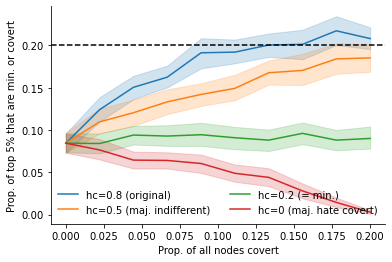

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.lineplot(data=df_results_covert_filt[np.floor(10*df_results_covert_filt.hc)/10 == 0.8], x='prop_covert', y='prop_all_minorities_top_k', label='hc=0.8 (original)')
sns.lineplot(data=df_results_covert_filt[np.floor(10*df_results_covert_filt.hc)/10 == 0.5], x='prop_covert', y='prop_all_minorities_top_k', label='hc=0.5 (maj. indifferent)')
sns.lineplot(data=df_results_covert_filt[np.floor(10*df_results_covert_filt.hc)/10 == 0.2], x='prop_covert', y='prop_all_minorities_top_k', label='hc=0.2 (= min.)')
sns.lineplot(data=df_results_covert_filt[np.floor(10*df_results_covert_filt.hc)/10 == 0], x='prop_covert', y='prop_all_minorities_top_k', label='hc=0 (maj. hate covert)')

ax.set_xlabel("Prop. of all nodes covert")
ax.set_ylabel("Prop. of top 5% that are min. or covert")
ax.axhline(0.2, linestyle='--', color='black')
ax.legend(frameon=False, ncol=2, loc='lower center')

sns.despine()

But what if beta is 10%? Seems that the results are very similar.

In [40]:
df_results_covert_filt =  df_results_covert[df_results_covert['beta']==0.1]

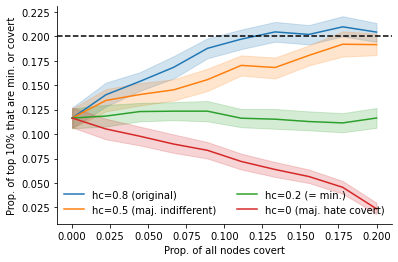

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.lineplot(data=df_results_covert_filt[np.floor(10*df_results_covert_filt.hc)/10 == 0.8], x='prop_covert', y='prop_all_minorities_top_k', label='hc=0.8 (original)')
sns.lineplot(data=df_results_covert_filt[np.floor(10*df_results_covert_filt.hc)/10 == 0.5], x='prop_covert', y='prop_all_minorities_top_k', label='hc=0.5 (maj. indifferent)')
sns.lineplot(data=df_results_covert_filt[np.floor(10*df_results_covert_filt.hc)/10 == 0.2], x='prop_covert', y='prop_all_minorities_top_k', label='hc=0.2 (= min.)')
sns.lineplot(data=df_results_covert_filt[np.floor(10*df_results_covert_filt.hc)/10 == 0], x='prop_covert', y='prop_all_minorities_top_k', label='hc=0 (maj. hate covert)')

ax.set_xlabel("Prop. of all nodes covert")
ax.set_ylabel("Prop. of top 10% that are min. or covert")
ax.axhline(0.2, linestyle='--', color='black')
ax.legend(frameon=False, ncol=2, loc='lower center')

sns.despine()

If beta is 20?

In [44]:
df_results_covert_filt =  df_results_covert[df_results_covert['beta']==0.2]

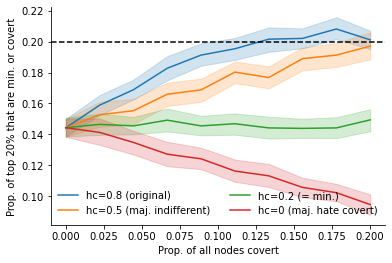

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.lineplot(data=df_results_covert_filt[np.floor(10*df_results_covert_filt.hc)/10 == 0.8], x='prop_covert', y='prop_all_minorities_top_k', label='hc=0.8 (original)')
sns.lineplot(data=df_results_covert_filt[np.floor(10*df_results_covert_filt.hc)/10 == 0.5], x='prop_covert', y='prop_all_minorities_top_k', label='hc=0.5 (maj. indifferent)')
sns.lineplot(data=df_results_covert_filt[np.floor(10*df_results_covert_filt.hc)/10 == 0.2], x='prop_covert', y='prop_all_minorities_top_k', label='hc=0.2 (= min.)')
sns.lineplot(data=df_results_covert_filt[np.floor(10*df_results_covert_filt.hc)/10 == 0], x='prop_covert', y='prop_all_minorities_top_k', label='hc=0 (maj. hate covert)')

ax.set_xlabel("Prop. of all nodes covert")
ax.set_ylabel("Prop. of top 20% that are min. or covert")
ax.axhline(0.2, linestyle='--', color='black')
ax.legend(frameon=False, ncol=2, loc='lower center')

sns.despine()